Hello Rossi!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Import

In [59]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd


# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import module for splitting and cross-validation using gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# import metric to measure quality of model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

# import time series split
from sklearn.model_selection import TimeSeriesSplit


# import statistics models
from statsmodels.tsa.seasonal import seasonal_decompose

# import machine learning models
from sklearn.linear_model import LinearRegression # import linear regression algorithm
from sklearn.ensemble import RandomForestRegressor # import random forest algorithm
from catboost import CatBoostRegressor, Pool # import catboost regressor
from lightgbm import LGBMRegressor # import lightgbm regressor
from xgboost import XGBRegressor # import xgboost regressor
from sklearn.neighbors import KNeighborsRegressor 

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [60]:
# read the data
df = pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0])

## Preparation

In [61]:
# function to determine if columns in file have null values
def get_percent_of_na(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe)
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [62]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(df)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

----------------------------------------------------------------------------------------------------
Describe:



,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


----------------------------------------------------------------------------------------------------


<bound method NDFrame.describe of                      num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
...                         ...
2018-08-31 23:10:00          32
2018-08-31 23:20:00          24
2018-08-31 23:30:00          27
2018-08-31 23:40:00          39
2018-08-31 23:50:00          53

[26496 rows x 1 columns]>


Columns with nulls:


,Missing Values,Percent of Nulls
num_orders,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(26496, 1)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 26415 duplicated rows.




In [63]:
df['num_orders'] = df['num_orders'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int32
dtypes: int32(1)
memory usage: 310.5 KB


In [64]:
# display index
df.index

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:10:00',
               '2018-03-01 00:20:00', '2018-03-01 00:30:00',
               '2018-03-01 00:40:00', '2018-03-01 00:50:00',
               '2018-03-01 01:00:00', '2018-03-01 01:10:00',
               '2018-03-01 01:20:00', '2018-03-01 01:30:00',
               ...
               '2018-08-31 22:20:00', '2018-08-31 22:30:00',
               '2018-08-31 22:40:00', '2018-08-31 22:50:00',
               '2018-08-31 23:00:00', '2018-08-31 23:10:00',
               '2018-08-31 23:20:00', '2018-08-31 23:30:00',
               '2018-08-31 23:40:00', '2018-08-31 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)

In [65]:
# show head of sorted data
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


In [66]:
# check if the dates and times are in chronological order
print(df.index.is_monotonic)
print()
print(df.info())

True

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int32
dtypes: int32(1)
memory usage: 310.5 KB
None


In [67]:
# minimum value of index
print('Minimum timestamp', df.index.min())
print()
# maximum value of index
print('Maximum timestamp', df.index.max())

Minimum timestamp 2018-03-01 00:00:00

Maximum timestamp 2018-08-31 23:50:00


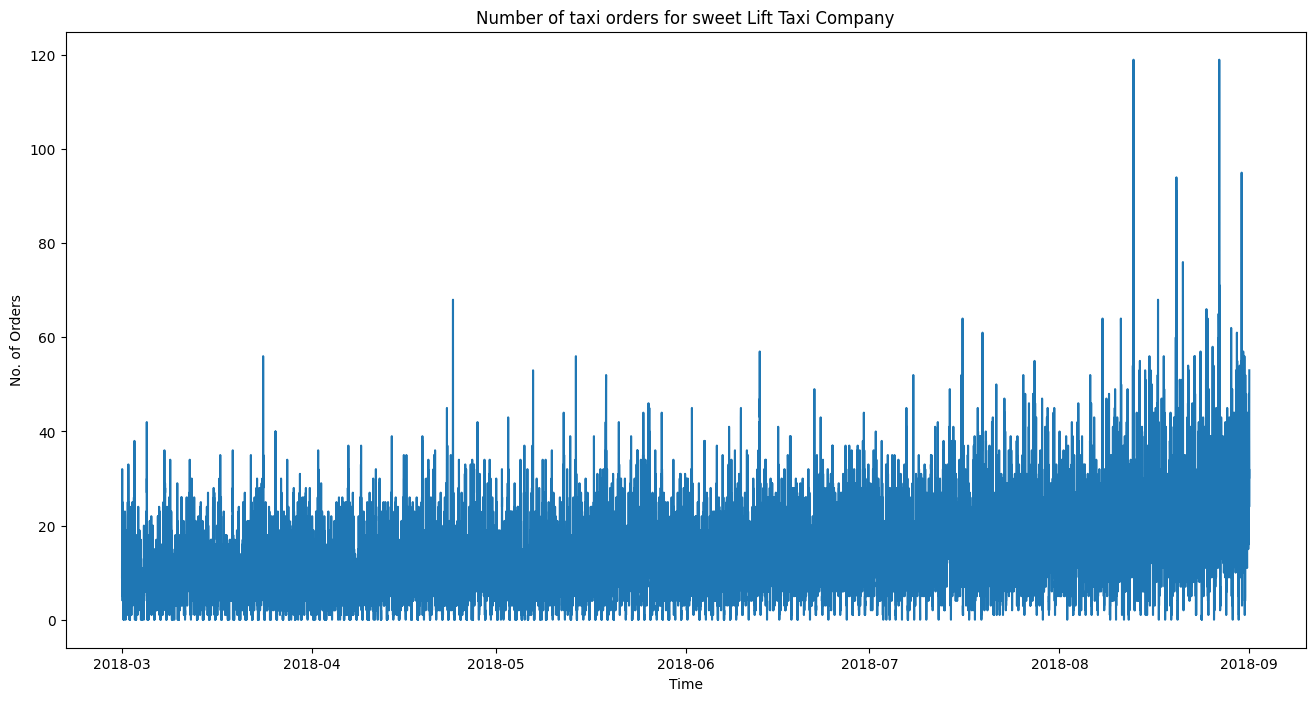

In [68]:
# visualize time series
ts = df['num_orders']
plt.figure(figsize=(16,8))
plt.title('Number of taxi orders for sweet Lift Taxi Company')
plt.xlabel('Time')
plt.ylabel('No. of Orders')
plt.plot(ts);

The time series plot illustrates the number of taxi orders for Sweet Lift Taxi Company over a span of six months, from March 2018 to September 2018. The data demonstrates a notable increase in the number of orders over this period. Initially, the number of orders is relatively low and stable, with occasional spikes reaching around 40 to 50 orders. As time progresses, the frequency and magnitude of these spikes increase significantly. By August 2018, there is a clear upward trend, with several peaks surpassing 100 orders. This trend suggests a growing demand for the taxi service, likely due to various factors such as increased market penetration, improved service quality, or seasonal variations. The visualization effectively highlights the company's growth in customer demand, providing valuable insights for further analysis and strategic planning.

### Conclusion

The dataset provided for Sweet Lift Taxi Company, covering the period from March 2018 to September 2018, consists of 26,496 entries with no missing values and only one column, 'num_orders'. This column records the number of taxi orders, which ranges from 0 to 119, with an average of approximately 14 orders and a standard deviation of about 9.2. The data also reveals that there are 26,415 duplicated rows, suggesting that many time intervals have identical order counts. The dataset's datetime index is in chronological order, spanning from March 1, 2018, to August 31, 2018. The time series plot shows a clear increase in taxi orders over time, with more frequent and higher spikes in the number of orders as months progress. This indicates growing demand for the taxi service, likely driven by factors such as improved service quality, market penetration, or seasonal changes. Overall, the dataset provides a robust basis for analyzing customer demand trends and planning strategic initiatives to further capitalize on this growth.

<div class="alert alert-success">
<b>Reviewer's comment</b>
    
Good job!

</div>

## Analysis

In [69]:
# resample data by 1 hour
ts = ts.resample('1H').sum()
ts

datetime
2018-03-01 00:00:00    124
2018-03-01 01:00:00     85
2018-03-01 02:00:00     71
2018-03-01 03:00:00     66
2018-03-01 04:00:00     43
                      ... 
2018-08-31 19:00:00    136
2018-08-31 20:00:00    154
2018-08-31 21:00:00    159
2018-08-31 22:00:00    223
2018-08-31 23:00:00    205
Freq: H, Name: num_orders, Length: 4416, dtype: int32

<AxesSubplot:title={'center':'2 weeks plot from 1st-March to 14th-March'}, xlabel='datetime'>

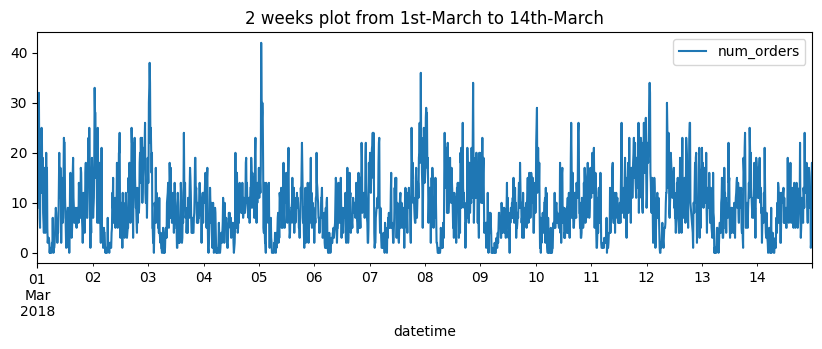

In [70]:
dataWeek = df['2018-03-01':'2018-03-14']
dataWeek.plot(figsize=(10,3), title='2 weeks plot from 1st-March to 14th-March')

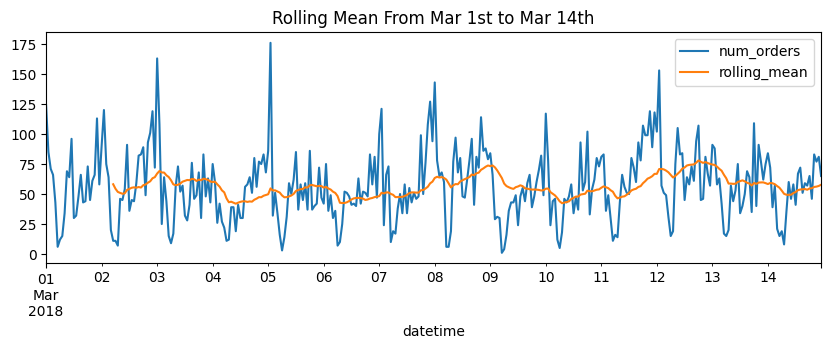

In [71]:
dataWeek = dataWeek.resample('1H').sum()
dataWeek['rolling_mean'] = dataWeek.rolling(30).mean()
dataWeek.plot(figsize=(10,3), title='Rolling Mean From Mar 1st to Mar 14th');

<AxesSubplot:title={'center':'Rolling STD from Mar 1st to Mar 14th'}, xlabel='datetime'>

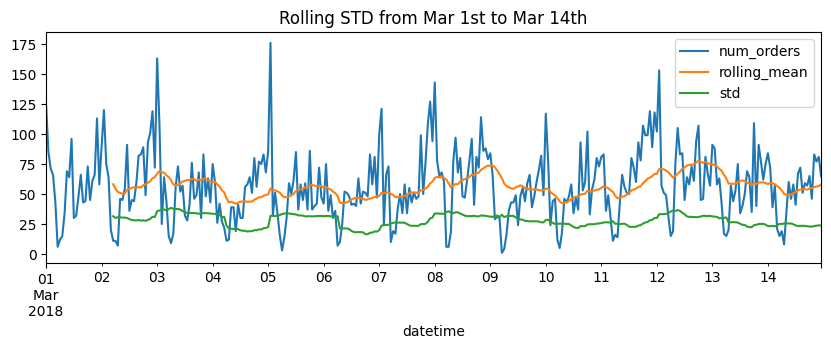

In [72]:
dataWeek['std'] = dataWeek['num_orders'].rolling(30).std()
dataWeek.plot(figsize=(10,3), title='Rolling STD from Mar 1st to Mar 14th')

### Trend

Text(0.5, 1.0, 'Trend')

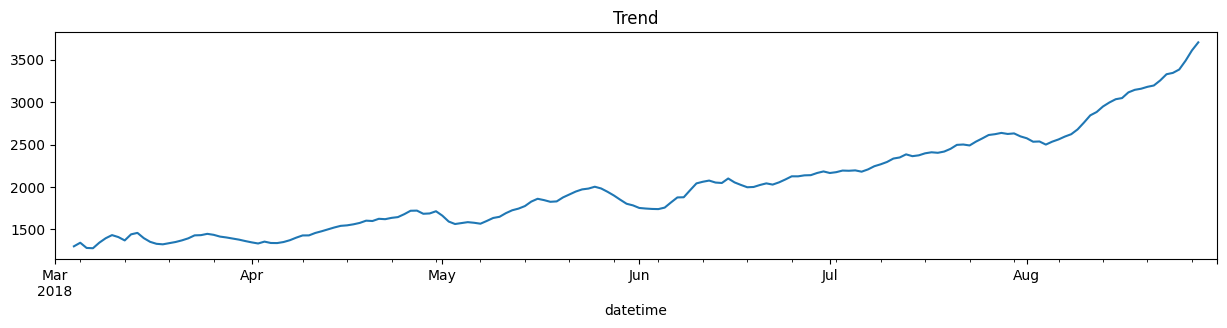

In [73]:
ts_ = ts.resample('1D').sum()

decomposed = seasonal_decompose(ts_)

plt.figure(figsize=(6,8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), figsize=(15,10))
plt.title('Trend')

The trend analysis of the taxi orders for Sweet Lift Taxi Company, as depicted in the plot, shows a clear upward trajectory over the period from March 2018 to September 2018. By resampling the time series data on a daily basis and applying seasonal decomposition, the extracted trend component reveals a steady and significant increase in the total number of daily taxi orders. Initially, the trend shows some fluctuations, particularly noticeable around April and June, indicating periods of varying demand. However, from July onwards, the trend line consistently rises, reaching its peak towards the end of August. This persistent upward movement suggests that the company is experiencing growing popularity and increased usage of its services. The positive trend is indicative of successful business strategies, market expansion, or possibly an overall increase in demand for taxi services during this timeframe. This analysis provides a solid foundation for understanding the long-term growth patterns and can inform future strategic decisions for the company.

### Seasonal

Text(0.5, 1.0, 'Seasonal')

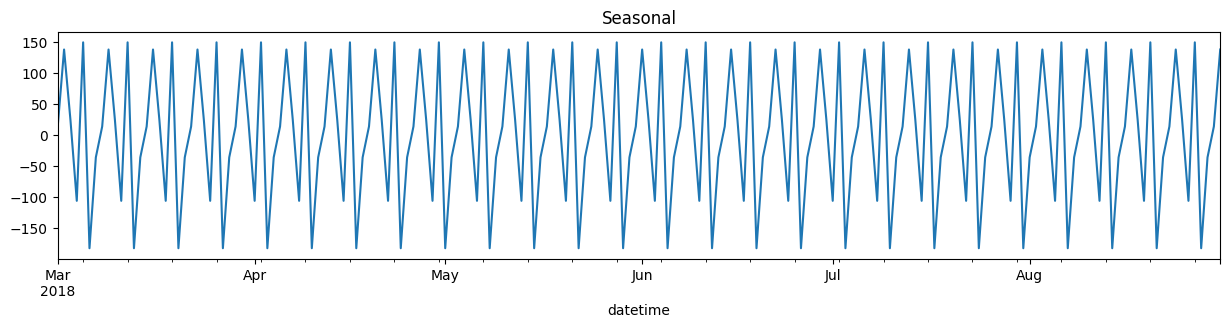

In [74]:
# Seasonal
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca(), figsize=(15,10))
plt.title('Seasonal')

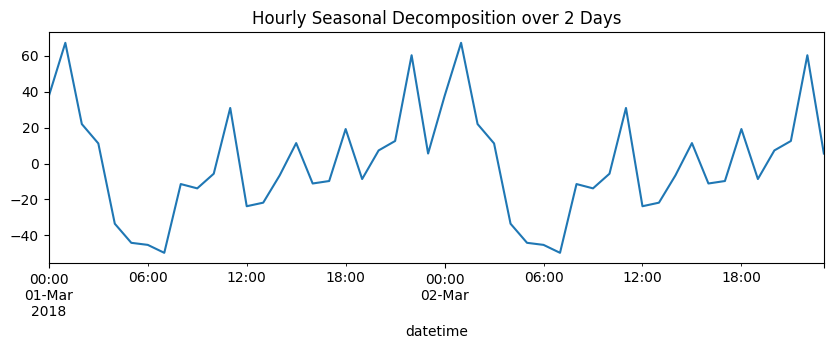

In [75]:
datadataWeek = df['2018-03-01':'2018-03-14']
tmp = dataWeek['2018-03-01':'2018-03-02']

decomposed_hour = seasonal_decompose(tmp['num_orders'].dropna())
decomposed_hour.seasonal.plot(figsize=(10,3), title='Hourly Seasonal Decomposition over 2 Days');

The seasonal analysis of taxi orders for Sweet Lift Taxi Company, depicted through the seasonal decomposition, uncovers recurring patterns within the dataset. The seasonal plot reveals distinct cycles of order volumes that repeat at regular intervals, showcasing predictable fluctuations within specific time frames. This analysis was further refined by examining a subset of the data, specifically from March 1, 2018, to March 14, 2018, and then zooming in on March 1 and March 2 for an hourly seasonal decomposition. The hourly decomposition plot highlights the repetitive nature of order volumes within the two-day window, indicating peaks and troughs that likely correspond to daily routines and customer behaviors. These insights into the seasonal variations provide valuable information for the company to optimize operations, allocate resources more effectively, and tailor marketing strategies to align with high-demand periods. Understanding these seasonal patterns can help the company enhance service availability during peak times and improve overall customer satisfaction.

### Residual

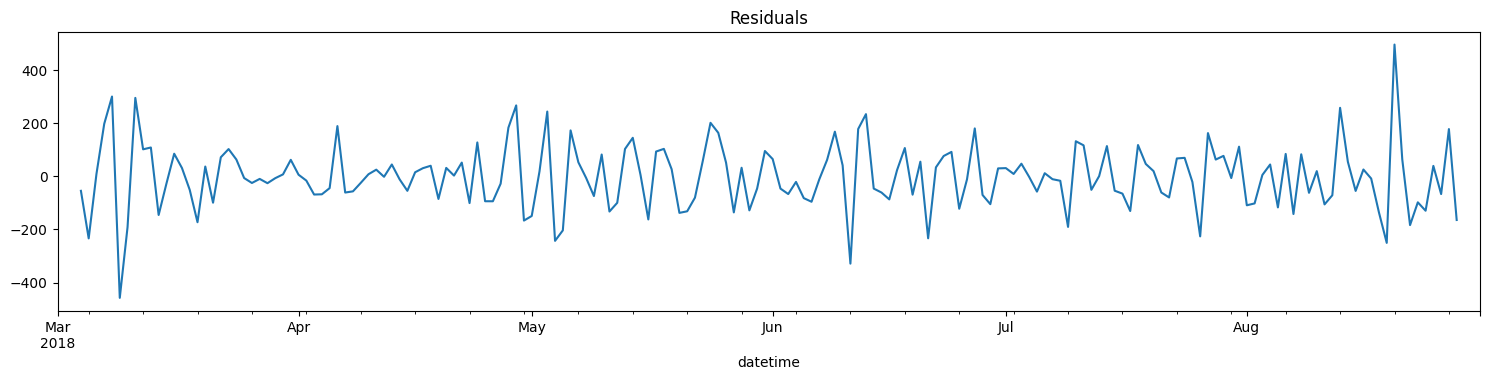

In [76]:
#Residual
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca(), figsize=(15, 10))
plt.title('Residuals')
plt.tight_layout()

<div class="alert alert-success">
<b>Reviewer's comment</b>
    
Brilliant EDA:)

</div>

## Training

### Feature Engineering

In [77]:
# function to make new features
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
# new Features
ts = pd.DataFrame(ts)
make_features(ts, 6, 7)
ts.head()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN


In [78]:
# drop NaNs 
ts = ts.dropna()
print('the time series has', ts.shape[0], 'rows and', ts.shape[1], 'features')
print()
ts.head()

the time series has 4409 rows and 12 features



,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 07:00:00,15,3,1,3,7,12.0,6.0,43.0,66.0,71.0,85.0,58.142857
2018-03-01 08:00:00,34,3,1,3,8,15.0,12.0,6.0,43.0,66.0,71.0,42.571429
2018-03-01 09:00:00,69,3,1,3,9,34.0,15.0,12.0,6.0,43.0,66.0,35.285714
2018-03-01 10:00:00,64,3,1,3,10,69.0,34.0,15.0,12.0,6.0,43.0,35.000000
2018-03-01 11:00:00,96,3,1,3,11,64.0,69.0,34.0,15.0,12.0,6.0,34.714286


In [79]:
# split the data into train and testing sets
train, test = train_test_split(ts, shuffle=False, test_size=0.1)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())
print()

print('The train set has', train.shape[0], 'rows and', train.shape[1], 'features')
print('The test set has', test.shape[0], 'rows and', test.shape[1], 'features')

2018-03-01 07:00:00 2018-08-13 14:00:00
2018-08-13 15:00:00 2018-08-31 23:00:00

The train set has 3968 rows and 12 features
The test set has 441 rows and 12 features


In [80]:
# declare variables for target and features
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [81]:
# time series split
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [82]:
%%time
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
predictions_train = model.predict(features_train)
print("MAE for the training set:", mean_absolute_error(predictions_train, target_train))
print("MAE for the test set: ", mean_absolute_error(predictions_test, target_test))
print('Model RMSE for the training set:', mean_squared_error(predictions_train, target_train,squared=False))
print('Model RMSE for the test set:', mean_squared_error(predictions_test, target_test,squared=False))

MAE for the training set: 23.41738357932807
MAE for the test set:  40.109134647348796
Model RMSE for the training set: 30.418258852998378
Model RMSE for the test set: 52.73988481092026
CPU times: user 4.26 ms, sys: 24 ms, total: 28.3 ms
Wall time: 11.2 ms


In [83]:
### Creating pipelines.

pipe_rfr = Pipeline([('scaler1', StandardScaler()),
                    ('RandomForestRegressor', RandomForestRegressor(n_estimators=100))])

pipe_linear = Pipeline([('scaler2', StandardScaler()),
                       ('LinearRegression(Dummy)', LinearRegression())])

pipe_cat_boost_r = Pipeline([('scaler3', StandardScaler()),
                       ('CatBoostRegressor', CatBoostRegressor(verbose=500))])

pipe_lgbm_r =  Pipeline([('scaler4', StandardScaler()),
                       ('LGBMRegressor', LGBMRegressor())])

pipe_xgb_r = Pipeline([('scaler5', StandardScaler()),
                       ('XGBRegressor', XGBRegressor())])
pipe_neighbors = Pipeline([('scaler6',StandardScaler()),('KNeighborsRegressor',KNeighborsRegressor())])

In [84]:
#Creating list of pipelines.
pipelines = [pipe_rfr, pipe_linear, pipe_cat_boost_r, pipe_lgbm_r, pipe_xgb_r,pipe_neighbors]
#Creating a dictionary of pipelines.
pipe_dict = {pipe_rfr:'RandomForestRegressor', pipe_linear:'LinearRegression',\
             pipe_cat_boost_r: 'CatBoostRegressor', pipe_lgbm_r: 'LGBMRegressor', pipe_xgb_r:'XGBRegressor',pipe_neighbors:'KNeighborsRegressor'}

In [85]:
%%time
for pipe in pipelines:
    print(pipe_dict[pipe])
    print(cross_val_score(pipe, features_train, target_train, scoring='neg_root_mean_squared_error', cv=tscv))
    print()

RandomForestRegressor
[-23.39664967 -23.46383499 -23.54319051 -24.97471658 -31.45777311]

LinearRegression
[-27.40704795 -28.98671583 -30.35214718 -31.91257396 -39.27776214]

CatBoostRegressor
Learning rate set to 0.038369
0:	learn: 29.0042523	total: 1.94ms	remaining: 1.94s
500:	learn: 8.5941305	total: 982ms	remaining: 978ms
999:	learn: 4.6796891	total: 1.9s	remaining: 0us
Learning rate set to 0.042799
0:	learn: 29.8091410	total: 2.3ms	remaining: 2.3s
500:	learn: 10.9417646	total: 1.07s	remaining: 1.07s
999:	learn: 6.9671363	total: 2.15s	remaining: 0us
Learning rate set to 0.045627
0:	learn: 31.3020540	total: 2.61ms	remaining: 2.6s
500:	learn: 12.6772237	total: 1.2s	remaining: 1.2s
999:	learn: 8.8787957	total: 2.41s	remaining: 0us
Learning rate set to 0.047747
0:	learn: 32.6166261	total: 2.87ms	remaining: 2.86s
500:	learn: 13.9063436	total: 1.32s	remaining: 1.31s
999:	learn: 10.3580295	total: 2.67s	remaining: 0us
Learning rate set to 0.04946
0:	learn: 33.9384215	total: 3.15ms	remaining

#### summary

The feature engineering process involved creating several new time-based features, such as month, day, day of the week, and hour, to enrich the dataset and capture temporal patterns in the taxi orders. Lag features and rolling mean features were also introduced to incorporate historical order data, enhancing the model's ability to predict future orders. After handling missing values and splitting the data into training and testing sets, a Linear Regression model was initially trained, showing a reasonable performance with MAE and RMSE metrics. Various machine learning models were then evaluated using cross-validation, with pipelines for models such as RandomForestRegressor, LinearRegression, CatBoostRegressor, LGBMRegressor, XGBRegressor, and KNeighborsRegressor. The CatBoostRegressor and RandomForestRegressor consistently performed well, with CatBoostRegressor exhibiting a strong learning capability even with varied learning rates. Ultimately, this thorough approach of feature engineering, model training, and evaluation provided a comprehensive framework for accurately predicting taxi orders, leveraging temporal patterns and historical data effectively.

<div class="alert alert-success">
<b>Reviewer's comment</b>
    
Everything is correct. Well done! But actually it's not necessary to use scaler with any tree-based model. It has no affect on such model. Thus, it just waste some computational resources.

</div>

### Hyperparameter Tuning

#### Random Forest

In [86]:
%%time
# Creating a tree based model with best hyperparameters.
rfr_param = {'n_estimators': (10, 25, 50, 100),
              'max_depth': (None, 2, 4, 8, 10, 12),
              } 

# Creating a grid model.
RF_grid = GridSearchCV(RandomForestRegressor(random_state=0, criterion='mse'), param_grid=rfr_param, 
                       cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
RF_grid_model = RF_grid.fit(features_train, target_train)
print(RF_grid_model.best_estimator_)
print()
print(RF_grid_model.best_score_)

RandomForestRegressor(random_state=0)

-25.363679873929755
CPU times: user 51.8 s, sys: 53.4 ms, total: 51.9 s
Wall time: 52 s


In [87]:
print('The best hyperparameters are: {}'.format(RF_grid_model.best_params_))

The best hyperparameters are: {'max_depth': None, 'n_estimators': 100}


In [88]:
%%time

# Creating a gradient boosting descent model with best hyperparameters.
warnings.simplefilter(action='ignore', category=FutureWarning)

xgb_param = {'learning_rate': (0.001, 0.01, 0.1, 0.3),
              'n_estimators': (10, 25, 50, 100),
              'base_score': (0.25, 0.5, 0.75)
              } 

# Creating a grid model.
XGB_grid = GridSearchCV(XGBRegressor(), param_grid=xgb_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1) 
XGB_grid_model = XGB_grid.fit(features_train, target_train)
print(XGB_grid_model.best_estimator_)
print()
print(XGB_grid_model.best_score_)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

-26.153996256285915
CPU times: user 2min 18s, sys: 1.25 s, total: 2min 19s
Wall time: 2min 20s


In [89]:
print('The best hyperparameters are: {}'.format(XGB_grid_model.best_params_))

The best hyperparameters are: {'base_score': 0.75, 'learning_rate': 0.1, 'n_estimators': 100}


### LGBMRegressor

In [90]:
%%time

# Creating a gradient boosting descent model tuning best hyperparameters.
lgbm_param = {'learning_rate': (0.001, 0.01, 0.05, 0.1),
              'n_estimators': (50, 100,200,500),
             'num_leaves': [5, 10, 20, 31]
             } 

# Creating a grid model.
LGBM_grid = GridSearchCV(LGBMRegressor(), param_grid=lgbm_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=1) 
LGBM_grid_model = LGBM_grid.fit(features_train, target_train)
print(LGBM_grid_model.best_estimator_)
print()
print(LGBM_grid_model.best_score_)

LGBMRegressor(learning_rate=0.01, n_estimators=500)

-25.177512749687505
CPU times: user 2min 8s, sys: 2.5 s, total: 2min 11s
Wall time: 2min 12s


In [91]:
print('The best hyperparameters are: {}'.format(LGBM_grid_model.best_params_))

The best hyperparameters are: {'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 31}


### CatBoostRegressor

In [92]:
%%time

# Creating a gradient boosting descent model tuning best hyperparameters.
cat_param = {'learning_rate': [0.001, 0.01, 0.5],
        'depth': [4, 6, 10]
             
       }

# Creating a grid model.
cat_grid = GridSearchCV(CatBoostRegressor(), param_grid=cat_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=1) 
cat_grid_model = cat_grid.fit(features_train, target_train)
print(cat_grid_model.best_estimator_)
print()
print(cat_grid_model.best_score_)

0:	learn: 29.5136997	total: 919us	remaining: 918ms
1:	learn: 29.5014637	total: 2.06ms	remaining: 1.03s
2:	learn: 29.4874462	total: 2.88ms	remaining: 956ms
3:	learn: 29.4753584	total: 3.71ms	remaining: 923ms
4:	learn: 29.4636813	total: 4.51ms	remaining: 898ms
5:	learn: 29.4495744	total: 5.3ms	remaining: 878ms
6:	learn: 29.4344856	total: 6.14ms	remaining: 871ms
7:	learn: 29.4205371	total: 6.95ms	remaining: 862ms
8:	learn: 29.4074542	total: 7.77ms	remaining: 856ms
9:	learn: 29.3933881	total: 8.56ms	remaining: 848ms
10:	learn: 29.3860660	total: 9.37ms	remaining: 842ms
11:	learn: 29.3728937	total: 10.2ms	remaining: 838ms
12:	learn: 29.3635818	total: 11.1ms	remaining: 841ms
13:	learn: 29.3498536	total: 11.9ms	remaining: 836ms
14:	learn: 29.3428416	total: 12.6ms	remaining: 830ms
15:	learn: 29.3295428	total: 13.5ms	remaining: 828ms
16:	learn: 29.3169095	total: 14.3ms	remaining: 825ms
17:	learn: 29.3045945	total: 15.1ms	remaining: 822ms
18:	learn: 29.2905229	total: 15.8ms	remaining: 818ms
19:	l

236:	learn: 26.8820456	total: 193ms	remaining: 621ms
237:	learn: 26.8726444	total: 194ms	remaining: 621ms
238:	learn: 26.8623485	total: 195ms	remaining: 620ms
239:	learn: 26.8522100	total: 195ms	remaining: 619ms
240:	learn: 26.8444487	total: 196ms	remaining: 618ms
241:	learn: 26.8323595	total: 197ms	remaining: 617ms
242:	learn: 26.8222313	total: 198ms	remaining: 616ms
243:	learn: 26.8113938	total: 199ms	remaining: 616ms
244:	learn: 26.7997965	total: 199ms	remaining: 615ms
245:	learn: 26.7900596	total: 200ms	remaining: 614ms
246:	learn: 26.7792692	total: 201ms	remaining: 613ms
247:	learn: 26.7720256	total: 202ms	remaining: 612ms
248:	learn: 26.7608797	total: 203ms	remaining: 611ms
249:	learn: 26.7506561	total: 203ms	remaining: 610ms
250:	learn: 26.7390590	total: 204ms	remaining: 609ms
251:	learn: 26.7284426	total: 205ms	remaining: 609ms
252:	learn: 26.7183654	total: 206ms	remaining: 608ms
253:	learn: 26.7081722	total: 207ms	remaining: 607ms
254:	learn: 26.6966139	total: 207ms	remaining:

466:	learn: 24.8814088	total: 385ms	remaining: 439ms
467:	learn: 24.8743172	total: 386ms	remaining: 438ms
468:	learn: 24.8647835	total: 387ms	remaining: 438ms
469:	learn: 24.8571034	total: 387ms	remaining: 437ms
470:	learn: 24.8520022	total: 388ms	remaining: 436ms
471:	learn: 24.8449696	total: 389ms	remaining: 435ms
472:	learn: 24.8374194	total: 390ms	remaining: 434ms
473:	learn: 24.8305913	total: 391ms	remaining: 433ms
474:	learn: 24.8231514	total: 391ms	remaining: 433ms
475:	learn: 24.8142239	total: 392ms	remaining: 432ms
476:	learn: 24.8063825	total: 393ms	remaining: 431ms
477:	learn: 24.8011229	total: 394ms	remaining: 430ms
478:	learn: 24.7968372	total: 395ms	remaining: 429ms
479:	learn: 24.7880405	total: 395ms	remaining: 428ms
480:	learn: 24.7808429	total: 396ms	remaining: 428ms
481:	learn: 24.7725869	total: 401ms	remaining: 431ms
482:	learn: 24.7638054	total: 402ms	remaining: 430ms
483:	learn: 24.7571066	total: 403ms	remaining: 429ms
484:	learn: 24.7488652	total: 403ms	remaining:

692:	learn: 23.3920319	total: 577ms	remaining: 256ms
693:	learn: 23.3855106	total: 578ms	remaining: 255ms
694:	learn: 23.3778086	total: 579ms	remaining: 254ms
695:	learn: 23.3739651	total: 580ms	remaining: 253ms
696:	learn: 23.3704063	total: 581ms	remaining: 252ms
697:	learn: 23.3637556	total: 582ms	remaining: 252ms
698:	learn: 23.3576377	total: 582ms	remaining: 251ms
699:	learn: 23.3517712	total: 583ms	remaining: 250ms
700:	learn: 23.3440007	total: 584ms	remaining: 249ms
701:	learn: 23.3383549	total: 585ms	remaining: 248ms
702:	learn: 23.3327470	total: 586ms	remaining: 247ms
703:	learn: 23.3280572	total: 586ms	remaining: 247ms
704:	learn: 23.3202577	total: 587ms	remaining: 246ms
705:	learn: 23.3139746	total: 588ms	remaining: 245ms
706:	learn: 23.3065855	total: 589ms	remaining: 244ms
707:	learn: 23.2990851	total: 590ms	remaining: 243ms
708:	learn: 23.2949800	total: 591ms	remaining: 242ms
709:	learn: 23.2912398	total: 591ms	remaining: 242ms
710:	learn: 23.2849282	total: 592ms	remaining:

917:	learn: 22.2061841	total: 765ms	remaining: 68.3ms
918:	learn: 22.2021251	total: 766ms	remaining: 67.5ms
919:	learn: 22.1968994	total: 767ms	remaining: 66.7ms
920:	learn: 22.1934628	total: 768ms	remaining: 65.9ms
921:	learn: 22.1872503	total: 769ms	remaining: 65ms
922:	learn: 22.1847192	total: 769ms	remaining: 64.2ms
923:	learn: 22.1795610	total: 770ms	remaining: 63.4ms
924:	learn: 22.1739371	total: 771ms	remaining: 62.5ms
925:	learn: 22.1695529	total: 772ms	remaining: 61.7ms
926:	learn: 22.1641377	total: 777ms	remaining: 61.2ms
927:	learn: 22.1599980	total: 777ms	remaining: 60.3ms
928:	learn: 22.1565733	total: 778ms	remaining: 59.5ms
929:	learn: 22.1519973	total: 779ms	remaining: 58.6ms
930:	learn: 22.1488780	total: 780ms	remaining: 57.8ms
931:	learn: 22.1431062	total: 781ms	remaining: 57ms
932:	learn: 22.1389787	total: 781ms	remaining: 56.1ms
933:	learn: 22.1328140	total: 782ms	remaining: 55.3ms
934:	learn: 22.1294517	total: 783ms	remaining: 54.4ms
935:	learn: 22.1267787	total: 78

193:	learn: 28.3583521	total: 195ms	remaining: 810ms
194:	learn: 28.3513472	total: 196ms	remaining: 810ms
195:	learn: 28.3446181	total: 197ms	remaining: 809ms
196:	learn: 28.3348423	total: 198ms	remaining: 808ms
197:	learn: 28.3278709	total: 199ms	remaining: 807ms
198:	learn: 28.3174387	total: 200ms	remaining: 806ms
199:	learn: 28.3091775	total: 201ms	remaining: 805ms
200:	learn: 28.3025542	total: 202ms	remaining: 804ms
201:	learn: 28.2929601	total: 203ms	remaining: 803ms
202:	learn: 28.2823897	total: 204ms	remaining: 802ms
203:	learn: 28.2731166	total: 205ms	remaining: 800ms
204:	learn: 28.2642585	total: 206ms	remaining: 799ms
205:	learn: 28.2550026	total: 207ms	remaining: 798ms
206:	learn: 28.2468473	total: 208ms	remaining: 797ms
207:	learn: 28.2366712	total: 209ms	remaining: 796ms
208:	learn: 28.2259146	total: 210ms	remaining: 795ms
209:	learn: 28.2179488	total: 211ms	remaining: 794ms
210:	learn: 28.2086398	total: 212ms	remaining: 793ms
211:	learn: 28.1997739	total: 213ms	remaining:

365:	learn: 26.9563887	total: 388ms	remaining: 672ms
366:	learn: 26.9470896	total: 389ms	remaining: 671ms
367:	learn: 26.9403965	total: 390ms	remaining: 670ms
368:	learn: 26.9331511	total: 391ms	remaining: 669ms
369:	learn: 26.9270857	total: 392ms	remaining: 668ms
370:	learn: 26.9189095	total: 393ms	remaining: 667ms
371:	learn: 26.9106767	total: 395ms	remaining: 667ms
372:	learn: 26.9050695	total: 397ms	remaining: 667ms
373:	learn: 26.8960895	total: 398ms	remaining: 666ms
374:	learn: 26.8883771	total: 400ms	remaining: 666ms
375:	learn: 26.8826907	total: 401ms	remaining: 666ms
376:	learn: 26.8743629	total: 403ms	remaining: 666ms
377:	learn: 26.8674443	total: 405ms	remaining: 666ms
378:	learn: 26.8590467	total: 406ms	remaining: 666ms
379:	learn: 26.8502858	total: 408ms	remaining: 666ms
380:	learn: 26.8428634	total: 409ms	remaining: 665ms
381:	learn: 26.8360433	total: 410ms	remaining: 664ms
382:	learn: 26.8289213	total: 411ms	remaining: 662ms
383:	learn: 26.8237866	total: 412ms	remaining:

543:	learn: 25.7712153	total: 581ms	remaining: 487ms
544:	learn: 25.7653280	total: 582ms	remaining: 486ms
545:	learn: 25.7598499	total: 583ms	remaining: 485ms
546:	learn: 25.7532423	total: 584ms	remaining: 484ms
547:	learn: 25.7481402	total: 585ms	remaining: 483ms
548:	learn: 25.7403499	total: 586ms	remaining: 482ms
549:	learn: 25.7366634	total: 588ms	remaining: 481ms
550:	learn: 25.7320196	total: 589ms	remaining: 480ms
551:	learn: 25.7253660	total: 590ms	remaining: 479ms
552:	learn: 25.7180028	total: 591ms	remaining: 478ms
553:	learn: 25.7120047	total: 592ms	remaining: 476ms
554:	learn: 25.7047928	total: 593ms	remaining: 475ms
555:	learn: 25.7003884	total: 594ms	remaining: 474ms
556:	learn: 25.6935858	total: 595ms	remaining: 473ms
557:	learn: 25.6891173	total: 596ms	remaining: 472ms
558:	learn: 25.6826939	total: 597ms	remaining: 471ms
559:	learn: 25.6765949	total: 598ms	remaining: 470ms
560:	learn: 25.6704180	total: 599ms	remaining: 469ms
561:	learn: 25.6645080	total: 600ms	remaining:

722:	learn: 24.8090601	total: 774ms	remaining: 296ms
723:	learn: 24.8036988	total: 775ms	remaining: 295ms
724:	learn: 24.8006854	total: 776ms	remaining: 294ms
725:	learn: 24.7964838	total: 777ms	remaining: 293ms
726:	learn: 24.7909091	total: 778ms	remaining: 292ms
727:	learn: 24.7857534	total: 779ms	remaining: 291ms
728:	learn: 24.7800273	total: 780ms	remaining: 290ms
729:	learn: 24.7738276	total: 782ms	remaining: 289ms
730:	learn: 24.7682837	total: 783ms	remaining: 288ms
731:	learn: 24.7636376	total: 784ms	remaining: 287ms
732:	learn: 24.7577075	total: 785ms	remaining: 286ms
733:	learn: 24.7538917	total: 786ms	remaining: 285ms
734:	learn: 24.7490676	total: 787ms	remaining: 284ms
735:	learn: 24.7441960	total: 788ms	remaining: 283ms
736:	learn: 24.7403080	total: 789ms	remaining: 282ms
737:	learn: 24.7357041	total: 790ms	remaining: 280ms
738:	learn: 24.7319633	total: 791ms	remaining: 279ms
739:	learn: 24.7274818	total: 792ms	remaining: 278ms
740:	learn: 24.7223424	total: 793ms	remaining:

902:	learn: 24.0135774	total: 967ms	remaining: 104ms
903:	learn: 24.0092853	total: 968ms	remaining: 103ms
904:	learn: 24.0053175	total: 969ms	remaining: 102ms
905:	learn: 24.0015334	total: 970ms	remaining: 101ms
906:	learn: 23.9974580	total: 971ms	remaining: 99.6ms
907:	learn: 23.9928919	total: 972ms	remaining: 98.5ms
908:	learn: 23.9881790	total: 973ms	remaining: 97.4ms
909:	learn: 23.9840162	total: 974ms	remaining: 96.4ms
910:	learn: 23.9815537	total: 975ms	remaining: 95.3ms
911:	learn: 23.9770179	total: 976ms	remaining: 94.2ms
912:	learn: 23.9729903	total: 977ms	remaining: 93.1ms
913:	learn: 23.9680230	total: 978ms	remaining: 92ms
914:	learn: 23.9642751	total: 979ms	remaining: 91ms
915:	learn: 23.9609990	total: 980ms	remaining: 89.9ms
916:	learn: 23.9567647	total: 981ms	remaining: 88.8ms
917:	learn: 23.9527385	total: 982ms	remaining: 87.7ms
918:	learn: 23.9474711	total: 983ms	remaining: 86.6ms
919:	learn: 23.9440322	total: 984ms	remaining: 85.6ms
920:	learn: 23.9401583	total: 985ms	

164:	learn: 30.1145883	total: 195ms	remaining: 989ms
165:	learn: 30.1060020	total: 197ms	remaining: 990ms
166:	learn: 30.0994543	total: 198ms	remaining: 989ms
167:	learn: 30.0892066	total: 200ms	remaining: 988ms
168:	learn: 30.0800843	total: 201ms	remaining: 987ms
169:	learn: 30.0723392	total: 202ms	remaining: 985ms
170:	learn: 30.0615522	total: 203ms	remaining: 984ms
171:	learn: 30.0510484	total: 205ms	remaining: 985ms
172:	learn: 30.0426530	total: 206ms	remaining: 986ms
173:	learn: 30.0338338	total: 207ms	remaining: 984ms
174:	learn: 30.0235679	total: 208ms	remaining: 983ms
175:	learn: 30.0162468	total: 210ms	remaining: 984ms
176:	learn: 30.0059948	total: 212ms	remaining: 985ms
177:	learn: 29.9965068	total: 213ms	remaining: 983ms
178:	learn: 29.9881525	total: 214ms	remaining: 982ms
179:	learn: 29.9798788	total: 215ms	remaining: 980ms
180:	learn: 29.9699780	total: 216ms	remaining: 979ms
181:	learn: 29.9605110	total: 217ms	remaining: 977ms
182:	learn: 29.9493362	total: 219ms	remaining:

324:	learn: 28.7439559	total: 390ms	remaining: 811ms
325:	learn: 28.7375202	total: 392ms	remaining: 810ms
326:	learn: 28.7293702	total: 393ms	remaining: 809ms
327:	learn: 28.7221596	total: 394ms	remaining: 808ms
328:	learn: 28.7142633	total: 395ms	remaining: 807ms
329:	learn: 28.7077127	total: 397ms	remaining: 805ms
330:	learn: 28.6986777	total: 398ms	remaining: 804ms
331:	learn: 28.6915223	total: 399ms	remaining: 804ms
332:	learn: 28.6843644	total: 401ms	remaining: 803ms
333:	learn: 28.6757881	total: 402ms	remaining: 802ms
334:	learn: 28.6664317	total: 403ms	remaining: 801ms
335:	learn: 28.6577184	total: 405ms	remaining: 800ms
336:	learn: 28.6503586	total: 406ms	remaining: 800ms
337:	learn: 28.6418198	total: 408ms	remaining: 798ms
338:	learn: 28.6351897	total: 409ms	remaining: 797ms
339:	learn: 28.6273783	total: 410ms	remaining: 796ms
340:	learn: 28.6189968	total: 411ms	remaining: 794ms
341:	learn: 28.6110702	total: 412ms	remaining: 793ms
342:	learn: 28.6023276	total: 413ms	remaining:

482:	learn: 27.5867611	total: 592ms	remaining: 634ms
483:	learn: 27.5814842	total: 594ms	remaining: 633ms
484:	learn: 27.5744599	total: 595ms	remaining: 632ms
485:	learn: 27.5701863	total: 596ms	remaining: 631ms
486:	learn: 27.5624620	total: 598ms	remaining: 630ms
487:	learn: 27.5569117	total: 600ms	remaining: 629ms
488:	learn: 27.5521188	total: 601ms	remaining: 628ms
489:	learn: 27.5446448	total: 602ms	remaining: 627ms
490:	learn: 27.5384144	total: 603ms	remaining: 625ms
491:	learn: 27.5312421	total: 604ms	remaining: 624ms
492:	learn: 27.5258860	total: 605ms	remaining: 623ms
493:	learn: 27.5206780	total: 606ms	remaining: 621ms
494:	learn: 27.5130171	total: 608ms	remaining: 620ms
495:	learn: 27.5057418	total: 609ms	remaining: 619ms
496:	learn: 27.4996391	total: 610ms	remaining: 617ms
497:	learn: 27.4925202	total: 611ms	remaining: 616ms
498:	learn: 27.4860530	total: 612ms	remaining: 615ms
499:	learn: 27.4783817	total: 613ms	remaining: 613ms
500:	learn: 27.4717098	total: 614ms	remaining:

642:	learn: 26.6254702	total: 786ms	remaining: 437ms
643:	learn: 26.6196768	total: 788ms	remaining: 436ms
644:	learn: 26.6142299	total: 789ms	remaining: 434ms
645:	learn: 26.6084220	total: 790ms	remaining: 433ms
646:	learn: 26.6035803	total: 791ms	remaining: 432ms
647:	learn: 26.5981632	total: 793ms	remaining: 431ms
648:	learn: 26.5936220	total: 795ms	remaining: 430ms
649:	learn: 26.5874288	total: 796ms	remaining: 428ms
650:	learn: 26.5828716	total: 797ms	remaining: 427ms
651:	learn: 26.5770513	total: 798ms	remaining: 426ms
652:	learn: 26.5725739	total: 799ms	remaining: 425ms
653:	learn: 26.5671700	total: 800ms	remaining: 423ms
654:	learn: 26.5619892	total: 801ms	remaining: 422ms
655:	learn: 26.5569457	total: 803ms	remaining: 421ms
656:	learn: 26.5523263	total: 804ms	remaining: 420ms
657:	learn: 26.5457804	total: 805ms	remaining: 418ms
658:	learn: 26.5394782	total: 806ms	remaining: 417ms
659:	learn: 26.5346212	total: 807ms	remaining: 416ms
660:	learn: 26.5311978	total: 808ms	remaining:

797:	learn: 25.8499384	total: 973ms	remaining: 246ms
798:	learn: 25.8460549	total: 974ms	remaining: 245ms
799:	learn: 25.8424560	total: 975ms	remaining: 244ms
800:	learn: 25.8383476	total: 977ms	remaining: 243ms
801:	learn: 25.8349192	total: 978ms	remaining: 241ms
802:	learn: 25.8296077	total: 979ms	remaining: 240ms
803:	learn: 25.8240242	total: 980ms	remaining: 239ms
804:	learn: 25.8187037	total: 982ms	remaining: 238ms
805:	learn: 25.8132572	total: 983ms	remaining: 237ms
806:	learn: 25.8080323	total: 984ms	remaining: 235ms
807:	learn: 25.8040017	total: 985ms	remaining: 234ms
808:	learn: 25.7993563	total: 987ms	remaining: 233ms
809:	learn: 25.7939984	total: 989ms	remaining: 232ms
810:	learn: 25.7895316	total: 990ms	remaining: 231ms
811:	learn: 25.7859395	total: 991ms	remaining: 229ms
812:	learn: 25.7830639	total: 992ms	remaining: 228ms
813:	learn: 25.7769736	total: 993ms	remaining: 227ms
814:	learn: 25.7728005	total: 994ms	remaining: 226ms
815:	learn: 25.7692791	total: 996ms	remaining:

956:	learn: 25.1813703	total: 1.17s	remaining: 52.4ms
957:	learn: 25.1756899	total: 1.17s	remaining: 51.2ms
958:	learn: 25.1728188	total: 1.17s	remaining: 50ms
959:	learn: 25.1696045	total: 1.17s	remaining: 48.8ms
960:	learn: 25.1667138	total: 1.17s	remaining: 47.5ms
961:	learn: 25.1618642	total: 1.17s	remaining: 46.3ms
962:	learn: 25.1582938	total: 1.17s	remaining: 45.1ms
963:	learn: 25.1552758	total: 1.18s	remaining: 43.9ms
964:	learn: 25.1525118	total: 1.18s	remaining: 42.7ms
965:	learn: 25.1495595	total: 1.18s	remaining: 41.5ms
966:	learn: 25.1457751	total: 1.18s	remaining: 40.2ms
967:	learn: 25.1418986	total: 1.18s	remaining: 39ms
968:	learn: 25.1389643	total: 1.18s	remaining: 37.8ms
969:	learn: 25.1340855	total: 1.18s	remaining: 36.6ms
970:	learn: 25.1304329	total: 1.18s	remaining: 35.4ms
971:	learn: 25.1249817	total: 1.19s	remaining: 34.2ms
972:	learn: 25.1206516	total: 1.19s	remaining: 32.9ms
973:	learn: 25.1176389	total: 1.19s	remaining: 31.7ms
974:	learn: 25.1128090	total: 1.

154:	learn: 31.5693220	total: 207ms	remaining: 1.13s
155:	learn: 31.5581839	total: 209ms	remaining: 1.13s
156:	learn: 31.5461503	total: 210ms	remaining: 1.13s
157:	learn: 31.5355350	total: 212ms	remaining: 1.13s
158:	learn: 31.5241249	total: 214ms	remaining: 1.13s
159:	learn: 31.5122788	total: 215ms	remaining: 1.13s
160:	learn: 31.5006095	total: 217ms	remaining: 1.13s
161:	learn: 31.4892745	total: 219ms	remaining: 1.13s
162:	learn: 31.4784787	total: 220ms	remaining: 1.13s
163:	learn: 31.4676238	total: 222ms	remaining: 1.13s
164:	learn: 31.4587098	total: 223ms	remaining: 1.13s
165:	learn: 31.4493761	total: 225ms	remaining: 1.13s
166:	learn: 31.4392529	total: 226ms	remaining: 1.13s
167:	learn: 31.4303382	total: 228ms	remaining: 1.13s
168:	learn: 31.4188339	total: 229ms	remaining: 1.13s
169:	learn: 31.4086432	total: 231ms	remaining: 1.13s
170:	learn: 31.3969079	total: 232ms	remaining: 1.13s
171:	learn: 31.3859814	total: 234ms	remaining: 1.12s
172:	learn: 31.3761710	total: 235ms	remaining:

435:	learn: 29.0793797	total: 598ms	remaining: 774ms
436:	learn: 29.0704500	total: 600ms	remaining: 773ms
437:	learn: 29.0624507	total: 601ms	remaining: 771ms
438:	learn: 29.0561529	total: 603ms	remaining: 770ms
439:	learn: 29.0478945	total: 604ms	remaining: 769ms
440:	learn: 29.0417712	total: 606ms	remaining: 768ms
441:	learn: 29.0332944	total: 607ms	remaining: 766ms
442:	learn: 29.0270818	total: 608ms	remaining: 765ms
443:	learn: 29.0203408	total: 610ms	remaining: 764ms
444:	learn: 29.0123108	total: 611ms	remaining: 763ms
445:	learn: 29.0056053	total: 613ms	remaining: 761ms
446:	learn: 28.9973983	total: 614ms	remaining: 760ms
447:	learn: 28.9894755	total: 616ms	remaining: 758ms
448:	learn: 28.9844584	total: 617ms	remaining: 757ms
449:	learn: 28.9770440	total: 618ms	remaining: 755ms
450:	learn: 28.9692006	total: 619ms	remaining: 754ms
451:	learn: 28.9635617	total: 621ms	remaining: 753ms
452:	learn: 28.9551594	total: 622ms	remaining: 751ms
453:	learn: 28.9492248	total: 623ms	remaining:

720:	learn: 27.3048327	total: 989ms	remaining: 383ms
721:	learn: 27.2988113	total: 991ms	remaining: 381ms
722:	learn: 27.2921781	total: 992ms	remaining: 380ms
723:	learn: 27.2865955	total: 993ms	remaining: 379ms
724:	learn: 27.2814495	total: 994ms	remaining: 377ms
725:	learn: 27.2779145	total: 996ms	remaining: 376ms
726:	learn: 27.2712396	total: 998ms	remaining: 375ms
727:	learn: 27.2649055	total: 999ms	remaining: 373ms
728:	learn: 27.2589922	total: 1s	remaining: 372ms
729:	learn: 27.2526737	total: 1s	remaining: 371ms
730:	learn: 27.2478907	total: 1s	remaining: 369ms
731:	learn: 27.2442033	total: 1s	remaining: 368ms
732:	learn: 27.2395215	total: 1.01s	remaining: 366ms
733:	learn: 27.2346079	total: 1.01s	remaining: 365ms
734:	learn: 27.2296751	total: 1.01s	remaining: 364ms
735:	learn: 27.2253818	total: 1.01s	remaining: 362ms
736:	learn: 27.2198172	total: 1.01s	remaining: 361ms
737:	learn: 27.2154475	total: 1.01s	remaining: 359ms
738:	learn: 27.2095373	total: 1.01s	remaining: 358ms
739:	

0:	learn: 34.7598505	total: 1.66ms	remaining: 1.66s
1:	learn: 34.7454661	total: 3.41ms	remaining: 1.7s
2:	learn: 34.7310111	total: 4.85ms	remaining: 1.61s
3:	learn: 34.7162883	total: 6.35ms	remaining: 1.58s
4:	learn: 34.7010202	total: 7.84ms	remaining: 1.56s
5:	learn: 34.6865134	total: 9.29ms	remaining: 1.54s
6:	learn: 34.6740622	total: 10.8ms	remaining: 1.53s
7:	learn: 34.6588466	total: 12.3ms	remaining: 1.52s
8:	learn: 34.6464825	total: 13.8ms	remaining: 1.52s
9:	learn: 34.6331887	total: 15.2ms	remaining: 1.51s
10:	learn: 34.6218413	total: 16.6ms	remaining: 1.49s
11:	learn: 34.6094139	total: 18.1ms	remaining: 1.49s
12:	learn: 34.5953460	total: 19.6ms	remaining: 1.48s
13:	learn: 34.5806296	total: 21ms	remaining: 1.48s
14:	learn: 34.5669213	total: 22.5ms	remaining: 1.48s
15:	learn: 34.5527647	total: 23.9ms	remaining: 1.47s
16:	learn: 34.5405319	total: 25.4ms	remaining: 1.47s
17:	learn: 34.5262462	total: 26.8ms	remaining: 1.46s
18:	learn: 34.5122350	total: 28.2ms	remaining: 1.46s
19:	le

263:	learn: 31.6429146	total: 393ms	remaining: 1.1s
264:	learn: 31.6339427	total: 395ms	remaining: 1.09s
265:	learn: 31.6230358	total: 396ms	remaining: 1.09s
266:	learn: 31.6128960	total: 398ms	remaining: 1.09s
267:	learn: 31.6023216	total: 399ms	remaining: 1.09s
268:	learn: 31.5927535	total: 401ms	remaining: 1.09s
269:	learn: 31.5818276	total: 402ms	remaining: 1.09s
270:	learn: 31.5741239	total: 404ms	remaining: 1.08s
271:	learn: 31.5658535	total: 405ms	remaining: 1.08s
272:	learn: 31.5585972	total: 406ms	remaining: 1.08s
273:	learn: 31.5473116	total: 408ms	remaining: 1.08s
274:	learn: 31.5373919	total: 409ms	remaining: 1.08s
275:	learn: 31.5273001	total: 411ms	remaining: 1.08s
276:	learn: 31.5162223	total: 412ms	remaining: 1.08s
277:	learn: 31.5067672	total: 414ms	remaining: 1.07s
278:	learn: 31.4972000	total: 415ms	remaining: 1.07s
279:	learn: 31.4885669	total: 417ms	remaining: 1.07s
280:	learn: 31.4796578	total: 418ms	remaining: 1.07s
281:	learn: 31.4690498	total: 419ms	remaining: 

524:	learn: 29.4411650	total: 784ms	remaining: 710ms
525:	learn: 29.4338844	total: 786ms	remaining: 708ms
526:	learn: 29.4272383	total: 787ms	remaining: 707ms
527:	learn: 29.4196523	total: 789ms	remaining: 705ms
528:	learn: 29.4125789	total: 790ms	remaining: 704ms
529:	learn: 29.4060914	total: 792ms	remaining: 702ms
530:	learn: 29.3998378	total: 793ms	remaining: 700ms
531:	learn: 29.3923297	total: 795ms	remaining: 699ms
532:	learn: 29.3847332	total: 796ms	remaining: 697ms
533:	learn: 29.3763929	total: 797ms	remaining: 696ms
534:	learn: 29.3685174	total: 799ms	remaining: 694ms
535:	learn: 29.3623692	total: 800ms	remaining: 693ms
536:	learn: 29.3545677	total: 802ms	remaining: 691ms
537:	learn: 29.3482611	total: 803ms	remaining: 690ms
538:	learn: 29.3412584	total: 805ms	remaining: 688ms
539:	learn: 29.3335468	total: 806ms	remaining: 687ms
540:	learn: 29.3271260	total: 807ms	remaining: 685ms
541:	learn: 29.3189027	total: 809ms	remaining: 684ms
542:	learn: 29.3148789	total: 810ms	remaining:

787:	learn: 27.8176067	total: 1.18s	remaining: 316ms
788:	learn: 27.8125443	total: 1.18s	remaining: 315ms
789:	learn: 27.8082340	total: 1.18s	remaining: 313ms
790:	learn: 27.8013562	total: 1.18s	remaining: 312ms
791:	learn: 27.7959153	total: 1.18s	remaining: 310ms
792:	learn: 27.7920541	total: 1.18s	remaining: 309ms
793:	learn: 27.7861469	total: 1.18s	remaining: 307ms
794:	learn: 27.7802620	total: 1.19s	remaining: 306ms
795:	learn: 27.7753547	total: 1.19s	remaining: 304ms
796:	learn: 27.7686203	total: 1.19s	remaining: 303ms
797:	learn: 27.7621754	total: 1.19s	remaining: 301ms
798:	learn: 27.7582947	total: 1.19s	remaining: 300ms
799:	learn: 27.7540356	total: 1.19s	remaining: 298ms
800:	learn: 27.7497617	total: 1.19s	remaining: 297ms
801:	learn: 27.7460158	total: 1.2s	remaining: 295ms
802:	learn: 27.7403138	total: 1.2s	remaining: 294ms
803:	learn: 27.7335458	total: 1.2s	remaining: 292ms
804:	learn: 27.7300151	total: 1.2s	remaining: 291ms
805:	learn: 27.7254602	total: 1.2s	remaining: 289m

0:	learn: 29.3921851	total: 972us	remaining: 972ms
1:	learn: 29.2713086	total: 2.19ms	remaining: 1.09s
2:	learn: 29.1342178	total: 3.13ms	remaining: 1.04s
3:	learn: 29.0175585	total: 3.94ms	remaining: 981ms
4:	learn: 28.9062603	total: 4.81ms	remaining: 957ms
5:	learn: 28.7719801	total: 5.6ms	remaining: 929ms
6:	learn: 28.6296912	total: 6.43ms	remaining: 912ms
7:	learn: 28.5001123	total: 7.25ms	remaining: 898ms
8:	learn: 28.3801093	total: 8.06ms	remaining: 888ms
9:	learn: 28.2486879	total: 8.88ms	remaining: 879ms
10:	learn: 28.1128468	total: 9.69ms	remaining: 871ms
11:	learn: 27.9989182	total: 10.5ms	remaining: 865ms
12:	learn: 27.9170190	total: 11.3ms	remaining: 859ms
13:	learn: 27.7959786	total: 12.1ms	remaining: 855ms
14:	learn: 27.7133718	total: 12.9ms	remaining: 850ms
15:	learn: 27.6252337	total: 13.7ms	remaining: 845ms
16:	learn: 27.5043799	total: 14.6ms	remaining: 841ms
17:	learn: 27.4007934	total: 15.3ms	remaining: 837ms
18:	learn: 27.2834457	total: 16.2ms	remaining: 835ms
19:	l

236:	learn: 18.6588708	total: 192ms	remaining: 618ms
237:	learn: 18.6495675	total: 193ms	remaining: 618ms
238:	learn: 18.6322835	total: 194ms	remaining: 617ms
239:	learn: 18.6249838	total: 195ms	remaining: 616ms
240:	learn: 18.6173514	total: 195ms	remaining: 615ms
241:	learn: 18.6099064	total: 196ms	remaining: 614ms
242:	learn: 18.6007539	total: 197ms	remaining: 614ms
243:	learn: 18.5904789	total: 198ms	remaining: 613ms
244:	learn: 18.5796615	total: 199ms	remaining: 612ms
245:	learn: 18.5675729	total: 199ms	remaining: 611ms
246:	learn: 18.5587398	total: 200ms	remaining: 610ms
247:	learn: 18.5519766	total: 201ms	remaining: 609ms
248:	learn: 18.5456730	total: 202ms	remaining: 608ms
249:	learn: 18.5387508	total: 203ms	remaining: 608ms
250:	learn: 18.5280824	total: 203ms	remaining: 607ms
251:	learn: 18.5162255	total: 204ms	remaining: 606ms
252:	learn: 18.5031161	total: 205ms	remaining: 605ms
253:	learn: 18.4842673	total: 206ms	remaining: 604ms
254:	learn: 18.4766811	total: 207ms	remaining:

469:	learn: 16.8771692	total: 383ms	remaining: 432ms
470:	learn: 16.8710567	total: 384ms	remaining: 432ms
471:	learn: 16.8657179	total: 385ms	remaining: 431ms
472:	learn: 16.8635458	total: 386ms	remaining: 430ms
473:	learn: 16.8569171	total: 387ms	remaining: 429ms
474:	learn: 16.8469383	total: 388ms	remaining: 428ms
475:	learn: 16.8431368	total: 388ms	remaining: 428ms
476:	learn: 16.8402536	total: 389ms	remaining: 427ms
477:	learn: 16.8359507	total: 390ms	remaining: 426ms
478:	learn: 16.8315810	total: 391ms	remaining: 425ms
479:	learn: 16.8261573	total: 392ms	remaining: 424ms
480:	learn: 16.8224639	total: 392ms	remaining: 423ms
481:	learn: 16.8175339	total: 393ms	remaining: 423ms
482:	learn: 16.8134862	total: 394ms	remaining: 422ms
483:	learn: 16.8063703	total: 395ms	remaining: 421ms
484:	learn: 16.8007556	total: 396ms	remaining: 420ms
485:	learn: 16.7964970	total: 396ms	remaining: 419ms
486:	learn: 16.7923560	total: 397ms	remaining: 418ms
487:	learn: 16.7886420	total: 398ms	remaining:

701:	learn: 15.7821885	total: 575ms	remaining: 244ms
702:	learn: 15.7773737	total: 576ms	remaining: 244ms
703:	learn: 15.7734573	total: 577ms	remaining: 243ms
704:	learn: 15.7693427	total: 578ms	remaining: 242ms
705:	learn: 15.7636265	total: 579ms	remaining: 241ms
706:	learn: 15.7601324	total: 580ms	remaining: 240ms
707:	learn: 15.7579145	total: 581ms	remaining: 239ms
708:	learn: 15.7540737	total: 581ms	remaining: 239ms
709:	learn: 15.7520498	total: 582ms	remaining: 238ms
710:	learn: 15.7434839	total: 583ms	remaining: 237ms
711:	learn: 15.7392071	total: 584ms	remaining: 236ms
712:	learn: 15.7322966	total: 585ms	remaining: 235ms
713:	learn: 15.7257720	total: 585ms	remaining: 235ms
714:	learn: 15.7205045	total: 586ms	remaining: 234ms
715:	learn: 15.7156872	total: 587ms	remaining: 233ms
716:	learn: 15.7115266	total: 588ms	remaining: 232ms
717:	learn: 15.7077101	total: 589ms	remaining: 231ms
718:	learn: 15.7051789	total: 589ms	remaining: 230ms
719:	learn: 15.6995121	total: 590ms	remaining:

934:	learn: 14.9121444	total: 767ms	remaining: 53.3ms
935:	learn: 14.9061265	total: 768ms	remaining: 52.5ms
936:	learn: 14.9041681	total: 768ms	remaining: 51.7ms
937:	learn: 14.9021404	total: 769ms	remaining: 50.8ms
938:	learn: 14.8968596	total: 770ms	remaining: 50ms
939:	learn: 14.8950118	total: 771ms	remaining: 49.2ms
940:	learn: 14.8874624	total: 772ms	remaining: 48.4ms
941:	learn: 14.8805708	total: 772ms	remaining: 47.6ms
942:	learn: 14.8773482	total: 773ms	remaining: 46.7ms
943:	learn: 14.8742453	total: 774ms	remaining: 45.9ms
944:	learn: 14.8713676	total: 775ms	remaining: 45.1ms
945:	learn: 14.8701213	total: 776ms	remaining: 44.3ms
946:	learn: 14.8658988	total: 776ms	remaining: 43.5ms
947:	learn: 14.8639953	total: 777ms	remaining: 42.6ms
948:	learn: 14.8637443	total: 778ms	remaining: 41.8ms
949:	learn: 14.8569273	total: 779ms	remaining: 41ms
950:	learn: 14.8563583	total: 780ms	remaining: 40.2ms
951:	learn: 14.8544567	total: 780ms	remaining: 39.3ms
952:	learn: 14.8530657	total: 78

193:	learn: 21.2981693	total: 199ms	remaining: 825ms
194:	learn: 21.2887029	total: 200ms	remaining: 825ms
195:	learn: 21.2715023	total: 201ms	remaining: 824ms
196:	learn: 21.2502825	total: 202ms	remaining: 822ms
197:	learn: 21.2325504	total: 203ms	remaining: 821ms
198:	learn: 21.2127035	total: 204ms	remaining: 820ms
199:	learn: 21.1991294	total: 205ms	remaining: 819ms
200:	learn: 21.1888738	total: 206ms	remaining: 817ms
201:	learn: 21.1678433	total: 207ms	remaining: 816ms
202:	learn: 21.1562697	total: 208ms	remaining: 815ms
203:	learn: 21.1468757	total: 209ms	remaining: 814ms
204:	learn: 21.1262062	total: 210ms	remaining: 812ms
205:	learn: 21.1161766	total: 210ms	remaining: 811ms
206:	learn: 21.0986815	total: 211ms	remaining: 810ms
207:	learn: 21.0892148	total: 212ms	remaining: 809ms
208:	learn: 21.0739376	total: 213ms	remaining: 807ms
209:	learn: 21.0644739	total: 214ms	remaining: 806ms
210:	learn: 21.0535065	total: 215ms	remaining: 805ms
211:	learn: 21.0383928	total: 216ms	remaining:

387:	learn: 19.4010035	total: 392ms	remaining: 619ms
388:	learn: 19.3913800	total: 393ms	remaining: 618ms
389:	learn: 19.3796488	total: 394ms	remaining: 617ms
390:	learn: 19.3759298	total: 395ms	remaining: 616ms
391:	learn: 19.3713965	total: 396ms	remaining: 615ms
392:	learn: 19.3633409	total: 397ms	remaining: 614ms
393:	learn: 19.3604012	total: 398ms	remaining: 613ms
394:	learn: 19.3569681	total: 399ms	remaining: 612ms
395:	learn: 19.3498713	total: 400ms	remaining: 611ms
396:	learn: 19.3471548	total: 401ms	remaining: 610ms
397:	learn: 19.3438119	total: 402ms	remaining: 609ms
398:	learn: 19.3363465	total: 403ms	remaining: 607ms
399:	learn: 19.3311273	total: 404ms	remaining: 606ms
400:	learn: 19.3270110	total: 405ms	remaining: 605ms
401:	learn: 19.3186374	total: 406ms	remaining: 604ms
402:	learn: 19.3153318	total: 407ms	remaining: 603ms
403:	learn: 19.3101348	total: 408ms	remaining: 602ms
404:	learn: 19.3074994	total: 409ms	remaining: 601ms
405:	learn: 19.3034308	total: 410ms	remaining:

579:	learn: 18.4254147	total: 585ms	remaining: 424ms
580:	learn: 18.4211891	total: 586ms	remaining: 423ms
581:	learn: 18.4145157	total: 587ms	remaining: 422ms
582:	learn: 18.4075528	total: 588ms	remaining: 421ms
583:	learn: 18.4052016	total: 589ms	remaining: 420ms
584:	learn: 18.4016588	total: 590ms	remaining: 419ms
585:	learn: 18.3967751	total: 591ms	remaining: 418ms
586:	learn: 18.3949575	total: 592ms	remaining: 417ms
587:	learn: 18.3907464	total: 593ms	remaining: 415ms
588:	learn: 18.3875119	total: 594ms	remaining: 414ms
589:	learn: 18.3832085	total: 595ms	remaining: 413ms
590:	learn: 18.3782556	total: 596ms	remaining: 412ms
591:	learn: 18.3754095	total: 597ms	remaining: 411ms
592:	learn: 18.3716624	total: 598ms	remaining: 410ms
593:	learn: 18.3693813	total: 599ms	remaining: 409ms
594:	learn: 18.3666269	total: 600ms	remaining: 408ms
595:	learn: 18.3617704	total: 601ms	remaining: 407ms
596:	learn: 18.3563065	total: 602ms	remaining: 406ms
597:	learn: 18.3534542	total: 603ms	remaining:

776:	learn: 17.6723537	total: 778ms	remaining: 223ms
777:	learn: 17.6686352	total: 780ms	remaining: 222ms
778:	learn: 17.6613020	total: 781ms	remaining: 221ms
779:	learn: 17.6572087	total: 782ms	remaining: 220ms
780:	learn: 17.6537965	total: 783ms	remaining: 219ms
781:	learn: 17.6510724	total: 784ms	remaining: 218ms
782:	learn: 17.6448359	total: 784ms	remaining: 217ms
783:	learn: 17.6428106	total: 785ms	remaining: 216ms
784:	learn: 17.6382423	total: 786ms	remaining: 215ms
785:	learn: 17.6353466	total: 787ms	remaining: 214ms
786:	learn: 17.6326884	total: 788ms	remaining: 213ms
787:	learn: 17.6293386	total: 789ms	remaining: 212ms
788:	learn: 17.6276121	total: 790ms	remaining: 211ms
789:	learn: 17.6250884	total: 791ms	remaining: 210ms
790:	learn: 17.6203328	total: 792ms	remaining: 209ms
791:	learn: 17.6187449	total: 797ms	remaining: 209ms
792:	learn: 17.6154846	total: 798ms	remaining: 208ms
793:	learn: 17.6135952	total: 799ms	remaining: 207ms
794:	learn: 17.6099191	total: 800ms	remaining:

970:	learn: 17.1014510	total: 971ms	remaining: 29ms
971:	learn: 17.0969220	total: 973ms	remaining: 28ms
972:	learn: 17.0959417	total: 974ms	remaining: 27ms
973:	learn: 17.0936940	total: 975ms	remaining: 26ms
974:	learn: 17.0919762	total: 976ms	remaining: 25ms
975:	learn: 17.0871369	total: 977ms	remaining: 24ms
976:	learn: 17.0851437	total: 978ms	remaining: 23ms
977:	learn: 17.0810404	total: 979ms	remaining: 22ms
978:	learn: 17.0790416	total: 980ms	remaining: 21ms
979:	learn: 17.0770307	total: 981ms	remaining: 20ms
980:	learn: 17.0743096	total: 981ms	remaining: 19ms
981:	learn: 17.0698686	total: 982ms	remaining: 18ms
982:	learn: 17.0660546	total: 983ms	remaining: 17ms
983:	learn: 17.0634085	total: 984ms	remaining: 16ms
984:	learn: 17.0628358	total: 989ms	remaining: 15.1ms
985:	learn: 17.0624556	total: 990ms	remaining: 14.1ms
986:	learn: 17.0618801	total: 991ms	remaining: 13.1ms
987:	learn: 17.0572579	total: 992ms	remaining: 12.1ms
988:	learn: 17.0547107	total: 993ms	remaining: 11ms
989:

196:	learn: 22.5441413	total: 228ms	remaining: 931ms
197:	learn: 22.5301937	total: 230ms	remaining: 931ms
198:	learn: 22.5183067	total: 231ms	remaining: 929ms
199:	learn: 22.5022509	total: 232ms	remaining: 928ms
200:	learn: 22.4812735	total: 233ms	remaining: 927ms
201:	learn: 22.4732862	total: 234ms	remaining: 926ms
202:	learn: 22.4533914	total: 235ms	remaining: 924ms
203:	learn: 22.4359816	total: 237ms	remaining: 923ms
204:	learn: 22.4213526	total: 238ms	remaining: 922ms
205:	learn: 22.4010795	total: 243ms	remaining: 936ms
206:	learn: 22.3861738	total: 244ms	remaining: 935ms
207:	learn: 22.3740411	total: 245ms	remaining: 933ms
208:	learn: 22.3592408	total: 246ms	remaining: 932ms
209:	learn: 22.3455006	total: 247ms	remaining: 931ms
210:	learn: 22.3338370	total: 249ms	remaining: 929ms
211:	learn: 22.3173454	total: 250ms	remaining: 928ms
212:	learn: 22.3047986	total: 251ms	remaining: 926ms
213:	learn: 22.2911025	total: 252ms	remaining: 925ms
214:	learn: 22.2802567	total: 253ms	remaining:

363:	learn: 20.9191432	total: 423ms	remaining: 739ms
364:	learn: 20.9115711	total: 424ms	remaining: 739ms
365:	learn: 20.9033423	total: 426ms	remaining: 737ms
366:	learn: 20.8986006	total: 427ms	remaining: 736ms
367:	learn: 20.8936542	total: 428ms	remaining: 735ms
368:	learn: 20.8851152	total: 429ms	remaining: 734ms
369:	learn: 20.8725481	total: 430ms	remaining: 733ms
370:	learn: 20.8688706	total: 435ms	remaining: 738ms
371:	learn: 20.8656285	total: 436ms	remaining: 737ms
372:	learn: 20.8617161	total: 438ms	remaining: 736ms
373:	learn: 20.8539648	total: 439ms	remaining: 734ms
374:	learn: 20.8463552	total: 440ms	remaining: 733ms
375:	learn: 20.8424018	total: 441ms	remaining: 732ms
376:	learn: 20.8398399	total: 442ms	remaining: 730ms
377:	learn: 20.8313753	total: 443ms	remaining: 729ms
378:	learn: 20.8227114	total: 444ms	remaining: 728ms
379:	learn: 20.8149534	total: 445ms	remaining: 727ms
380:	learn: 20.8084766	total: 446ms	remaining: 725ms
381:	learn: 20.8003707	total: 448ms	remaining:

532:	learn: 20.0046278	total: 618ms	remaining: 541ms
533:	learn: 19.9961824	total: 619ms	remaining: 540ms
534:	learn: 19.9901357	total: 620ms	remaining: 539ms
535:	learn: 19.9866015	total: 621ms	remaining: 538ms
536:	learn: 19.9831028	total: 622ms	remaining: 537ms
537:	learn: 19.9782771	total: 623ms	remaining: 535ms
538:	learn: 19.9738910	total: 629ms	remaining: 538ms
539:	learn: 19.9723889	total: 630ms	remaining: 536ms
540:	learn: 19.9706039	total: 631ms	remaining: 535ms
541:	learn: 19.9681988	total: 632ms	remaining: 534ms
542:	learn: 19.9670801	total: 633ms	remaining: 533ms
543:	learn: 19.9580588	total: 634ms	remaining: 532ms
544:	learn: 19.9558666	total: 635ms	remaining: 530ms
545:	learn: 19.9531097	total: 636ms	remaining: 529ms
546:	learn: 19.9454681	total: 637ms	remaining: 528ms
547:	learn: 19.9425897	total: 638ms	remaining: 527ms
548:	learn: 19.9396503	total: 639ms	remaining: 525ms
549:	learn: 19.9332017	total: 641ms	remaining: 524ms
550:	learn: 19.9278219	total: 642ms	remaining:

699:	learn: 19.3667112	total: 811ms	remaining: 348ms
700:	learn: 19.3623117	total: 813ms	remaining: 347ms
701:	learn: 19.3564858	total: 814ms	remaining: 345ms
702:	learn: 19.3511468	total: 815ms	remaining: 344ms
703:	learn: 19.3464440	total: 816ms	remaining: 343ms
704:	learn: 19.3384740	total: 817ms	remaining: 342ms
705:	learn: 19.3326688	total: 818ms	remaining: 341ms
706:	learn: 19.3292567	total: 819ms	remaining: 340ms
707:	learn: 19.3242709	total: 821ms	remaining: 338ms
708:	learn: 19.3225557	total: 822ms	remaining: 337ms
709:	learn: 19.3204901	total: 823ms	remaining: 336ms
710:	learn: 19.3148458	total: 824ms	remaining: 335ms
711:	learn: 19.3126242	total: 825ms	remaining: 334ms
712:	learn: 19.3073680	total: 826ms	remaining: 333ms
713:	learn: 19.3016568	total: 827ms	remaining: 331ms
714:	learn: 19.2987506	total: 828ms	remaining: 330ms
715:	learn: 19.2946524	total: 830ms	remaining: 329ms
716:	learn: 19.2931155	total: 831ms	remaining: 328ms
717:	learn: 19.2902307	total: 832ms	remaining:

865:	learn: 18.7746950	total: 1s	remaining: 155ms
866:	learn: 18.7713126	total: 1s	remaining: 154ms
867:	learn: 18.7684115	total: 1.01s	remaining: 153ms
868:	learn: 18.7663879	total: 1.01s	remaining: 153ms
869:	learn: 18.7625681	total: 1.01s	remaining: 151ms
870:	learn: 18.7612215	total: 1.01s	remaining: 150ms
871:	learn: 18.7559933	total: 1.01s	remaining: 149ms
872:	learn: 18.7542665	total: 1.02s	remaining: 148ms
873:	learn: 18.7512130	total: 1.02s	remaining: 147ms
874:	learn: 18.7474435	total: 1.02s	remaining: 146ms
875:	learn: 18.7432539	total: 1.02s	remaining: 144ms
876:	learn: 18.7401941	total: 1.02s	remaining: 143ms
877:	learn: 18.7364060	total: 1.02s	remaining: 142ms
878:	learn: 18.7336202	total: 1.02s	remaining: 141ms
879:	learn: 18.7289561	total: 1.02s	remaining: 140ms
880:	learn: 18.7255116	total: 1.02s	remaining: 139ms
881:	learn: 18.7233443	total: 1.03s	remaining: 137ms
882:	learn: 18.7215272	total: 1.03s	remaining: 136ms
883:	learn: 18.7194065	total: 1.03s	remaining: 135ms

150:	learn: 24.4569968	total: 196ms	remaining: 1.1s
151:	learn: 24.4387712	total: 197ms	remaining: 1.1s
152:	learn: 24.4085415	total: 199ms	remaining: 1.1s
153:	learn: 24.3785753	total: 200ms	remaining: 1.1s
154:	learn: 24.3628854	total: 201ms	remaining: 1.1s
155:	learn: 24.3404591	total: 203ms	remaining: 1.1s
156:	learn: 24.3113732	total: 204ms	remaining: 1.09s
157:	learn: 24.2770210	total: 205ms	remaining: 1.09s
158:	learn: 24.2468780	total: 207ms	remaining: 1.09s
159:	learn: 24.2172760	total: 208ms	remaining: 1.09s
160:	learn: 24.1961651	total: 209ms	remaining: 1.09s
161:	learn: 24.1692455	total: 210ms	remaining: 1.09s
162:	learn: 24.1571388	total: 212ms	remaining: 1.09s
163:	learn: 24.1349501	total: 213ms	remaining: 1.08s
164:	learn: 24.1186534	total: 218ms	remaining: 1.1s
165:	learn: 24.0964523	total: 219ms	remaining: 1.1s
166:	learn: 24.0778535	total: 221ms	remaining: 1.1s
167:	learn: 24.0631104	total: 222ms	remaining: 1.1s
168:	learn: 24.0411546	total: 223ms	remaining: 1.1s
169:

447:	learn: 21.3866296	total: 586ms	remaining: 723ms
448:	learn: 21.3852988	total: 588ms	remaining: 722ms
449:	learn: 21.3772838	total: 590ms	remaining: 721ms
450:	learn: 21.3707027	total: 591ms	remaining: 719ms
451:	learn: 21.3673877	total: 592ms	remaining: 718ms
452:	learn: 21.3651760	total: 593ms	remaining: 717ms
453:	learn: 21.3599405	total: 595ms	remaining: 715ms
454:	learn: 21.3580088	total: 596ms	remaining: 714ms
455:	learn: 21.3501710	total: 597ms	remaining: 713ms
456:	learn: 21.3451923	total: 603ms	remaining: 716ms
457:	learn: 21.3420561	total: 604ms	remaining: 715ms
458:	learn: 21.3326447	total: 605ms	remaining: 714ms
459:	learn: 21.3267875	total: 607ms	remaining: 712ms
460:	learn: 21.3246010	total: 608ms	remaining: 711ms
461:	learn: 21.3217697	total: 609ms	remaining: 709ms
462:	learn: 21.3185073	total: 611ms	remaining: 708ms
463:	learn: 21.3119529	total: 612ms	remaining: 707ms
464:	learn: 21.3097862	total: 613ms	remaining: 705ms
465:	learn: 21.2967611	total: 614ms	remaining:

734:	learn: 20.1582659	total: 974ms	remaining: 351ms
735:	learn: 20.1541247	total: 975ms	remaining: 350ms
736:	learn: 20.1502640	total: 976ms	remaining: 348ms
737:	learn: 20.1466605	total: 978ms	remaining: 347ms
738:	learn: 20.1443719	total: 979ms	remaining: 346ms
739:	learn: 20.1437015	total: 980ms	remaining: 344ms
740:	learn: 20.1427064	total: 981ms	remaining: 343ms
741:	learn: 20.1395751	total: 987ms	remaining: 343ms
742:	learn: 20.1268036	total: 988ms	remaining: 342ms
743:	learn: 20.1241689	total: 989ms	remaining: 340ms
744:	learn: 20.1210295	total: 991ms	remaining: 339ms
745:	learn: 20.1169446	total: 992ms	remaining: 338ms
746:	learn: 20.1154689	total: 993ms	remaining: 336ms
747:	learn: 20.1108154	total: 995ms	remaining: 335ms
748:	learn: 20.1092259	total: 996ms	remaining: 334ms
749:	learn: 20.1056440	total: 997ms	remaining: 332ms
750:	learn: 20.1046044	total: 998ms	remaining: 331ms
751:	learn: 20.1019827	total: 1000ms	remaining: 330ms
752:	learn: 20.0999836	total: 1s	remaining: 3

0:	learn: 34.6289441	total: 1.92ms	remaining: 1.92s
1:	learn: 34.4870578	total: 3.75ms	remaining: 1.87s
2:	learn: 34.3456794	total: 5.59ms	remaining: 1.86s
3:	learn: 34.2033320	total: 7.39ms	remaining: 1.84s
4:	learn: 34.0889911	total: 9.29ms	remaining: 1.85s
5:	learn: 33.9519410	total: 11ms	remaining: 1.82s
6:	learn: 33.8392111	total: 13ms	remaining: 1.84s
7:	learn: 33.6981094	total: 15.3ms	remaining: 1.9s
8:	learn: 33.5847537	total: 16.8ms	remaining: 1.85s
9:	learn: 33.4644351	total: 18.4ms	remaining: 1.82s
10:	learn: 33.3623927	total: 19.8ms	remaining: 1.78s
11:	learn: 33.2526786	total: 21.5ms	remaining: 1.77s
12:	learn: 33.1279516	total: 23.2ms	remaining: 1.76s
13:	learn: 33.0276660	total: 24.9ms	remaining: 1.75s
14:	learn: 32.9094774	total: 26.6ms	remaining: 1.74s
15:	learn: 32.7805775	total: 28.3ms	remaining: 1.74s
16:	learn: 32.6780736	total: 29.9ms	remaining: 1.73s
17:	learn: 32.5589237	total: 31.6ms	remaining: 1.72s
18:	learn: 32.4426048	total: 33.1ms	remaining: 1.71s
19:	lear

263:	learn: 23.2453886	total: 393ms	remaining: 1.09s
264:	learn: 23.2376228	total: 395ms	remaining: 1.09s
265:	learn: 23.2305936	total: 396ms	remaining: 1.09s
266:	learn: 23.2207711	total: 397ms	remaining: 1.09s
267:	learn: 23.2123989	total: 399ms	remaining: 1.09s
268:	learn: 23.1948080	total: 400ms	remaining: 1.09s
269:	learn: 23.1871019	total: 402ms	remaining: 1.08s
270:	learn: 23.1809298	total: 403ms	remaining: 1.08s
271:	learn: 23.1719085	total: 408ms	remaining: 1.09s
272:	learn: 23.1667254	total: 410ms	remaining: 1.09s
273:	learn: 23.1591451	total: 411ms	remaining: 1.09s
274:	learn: 23.1521852	total: 413ms	remaining: 1.09s
275:	learn: 23.1454369	total: 414ms	remaining: 1.09s
276:	learn: 23.1293223	total: 416ms	remaining: 1.09s
277:	learn: 23.1204111	total: 418ms	remaining: 1.08s
278:	learn: 23.1075378	total: 419ms	remaining: 1.08s
279:	learn: 23.0998847	total: 420ms	remaining: 1.08s
280:	learn: 23.0926003	total: 422ms	remaining: 1.08s
281:	learn: 23.0848736	total: 423ms	remaining:

530:	learn: 21.6662770	total: 783ms	remaining: 691ms
531:	learn: 21.6624442	total: 785ms	remaining: 690ms
532:	learn: 21.6580007	total: 786ms	remaining: 689ms
533:	learn: 21.6545035	total: 787ms	remaining: 687ms
534:	learn: 21.6521557	total: 789ms	remaining: 686ms
535:	learn: 21.6498221	total: 794ms	remaining: 688ms
536:	learn: 21.6397380	total: 796ms	remaining: 686ms
537:	learn: 21.6375498	total: 797ms	remaining: 685ms
538:	learn: 21.6334596	total: 799ms	remaining: 683ms
539:	learn: 21.6317853	total: 800ms	remaining: 682ms
540:	learn: 21.6251464	total: 802ms	remaining: 680ms
541:	learn: 21.6226602	total: 803ms	remaining: 679ms
542:	learn: 21.6198016	total: 805ms	remaining: 677ms
543:	learn: 21.6150256	total: 806ms	remaining: 676ms
544:	learn: 21.6122507	total: 808ms	remaining: 675ms
545:	learn: 21.6103909	total: 810ms	remaining: 673ms
546:	learn: 21.5967781	total: 811ms	remaining: 672ms
547:	learn: 21.5940576	total: 813ms	remaining: 671ms
548:	learn: 21.5912632	total: 815ms	remaining:

798:	learn: 20.6766807	total: 1.17s	remaining: 295ms
799:	learn: 20.6753174	total: 1.18s	remaining: 295ms
800:	learn: 20.6680196	total: 1.18s	remaining: 294ms
801:	learn: 20.6651122	total: 1.18s	remaining: 292ms
802:	learn: 20.6639392	total: 1.19s	remaining: 291ms
803:	learn: 20.6613334	total: 1.19s	remaining: 289ms
804:	learn: 20.6591637	total: 1.19s	remaining: 288ms
805:	learn: 20.6569516	total: 1.19s	remaining: 286ms
806:	learn: 20.6548492	total: 1.19s	remaining: 285ms
807:	learn: 20.6532503	total: 1.19s	remaining: 283ms
808:	learn: 20.6522637	total: 1.19s	remaining: 282ms
809:	learn: 20.6444776	total: 1.2s	remaining: 280ms
810:	learn: 20.6401601	total: 1.2s	remaining: 279ms
811:	learn: 20.6337829	total: 1.2s	remaining: 277ms
812:	learn: 20.6317450	total: 1.2s	remaining: 276ms
813:	learn: 20.6304214	total: 1.2s	remaining: 274ms
814:	learn: 20.6293162	total: 1.2s	remaining: 273ms
815:	learn: 20.6271870	total: 1.2s	remaining: 271ms
816:	learn: 20.6213386	total: 1.2s	remaining: 270ms
8

0:	learn: 23.7558079	total: 904us	remaining: 903ms
1:	learn: 20.4300201	total: 1.94ms	remaining: 966ms
2:	learn: 19.1752296	total: 2.76ms	remaining: 918ms
3:	learn: 18.9333282	total: 3.69ms	remaining: 918ms
4:	learn: 18.4605360	total: 4.49ms	remaining: 894ms
5:	learn: 17.9563786	total: 5.32ms	remaining: 881ms
6:	learn: 17.6451522	total: 6.12ms	remaining: 868ms
7:	learn: 17.3352206	total: 6.93ms	remaining: 859ms
8:	learn: 17.0842828	total: 7.72ms	remaining: 851ms
9:	learn: 16.8682799	total: 8.52ms	remaining: 843ms
10:	learn: 16.7115597	total: 9.3ms	remaining: 837ms
11:	learn: 16.4881715	total: 10.1ms	remaining: 833ms
12:	learn: 16.2163024	total: 10.9ms	remaining: 828ms
13:	learn: 15.9918788	total: 11.7ms	remaining: 824ms
14:	learn: 15.8581137	total: 12.5ms	remaining: 824ms
15:	learn: 15.5833486	total: 13.3ms	remaining: 819ms
16:	learn: 15.4279238	total: 14.1ms	remaining: 816ms
17:	learn: 15.2241777	total: 14.9ms	remaining: 813ms
18:	learn: 15.0006704	total: 15.7ms	remaining: 811ms
19:	l

236:	learn: 2.6934131	total: 192ms	remaining: 618ms
237:	learn: 2.6686752	total: 193ms	remaining: 618ms
238:	learn: 2.6613800	total: 194ms	remaining: 617ms
239:	learn: 2.6438503	total: 195ms	remaining: 616ms
240:	learn: 2.6173428	total: 195ms	remaining: 616ms
241:	learn: 2.6098968	total: 196ms	remaining: 615ms
242:	learn: 2.6040648	total: 197ms	remaining: 614ms
243:	learn: 2.5830803	total: 198ms	remaining: 613ms
244:	learn: 2.5644745	total: 199ms	remaining: 612ms
245:	learn: 2.5529591	total: 199ms	remaining: 611ms
246:	learn: 2.5325248	total: 200ms	remaining: 611ms
247:	learn: 2.5087267	total: 201ms	remaining: 610ms
248:	learn: 2.5077029	total: 202ms	remaining: 609ms
249:	learn: 2.5067188	total: 203ms	remaining: 608ms
250:	learn: 2.4994961	total: 203ms	remaining: 607ms
251:	learn: 2.4830998	total: 204ms	remaining: 606ms
252:	learn: 2.4610191	total: 205ms	remaining: 605ms
253:	learn: 2.4555861	total: 206ms	remaining: 605ms
254:	learn: 2.4473144	total: 207ms	remaining: 604ms
255:	learn: 

464:	learn: 0.6789206	total: 381ms	remaining: 439ms
465:	learn: 0.6750607	total: 383ms	remaining: 438ms
466:	learn: 0.6723199	total: 384ms	remaining: 438ms
467:	learn: 0.6678968	total: 385ms	remaining: 437ms
468:	learn: 0.6652200	total: 385ms	remaining: 436ms
469:	learn: 0.6583918	total: 386ms	remaining: 436ms
470:	learn: 0.6571005	total: 387ms	remaining: 435ms
471:	learn: 0.6553674	total: 388ms	remaining: 434ms
472:	learn: 0.6551325	total: 389ms	remaining: 433ms
473:	learn: 0.6500717	total: 390ms	remaining: 433ms
474:	learn: 0.6472574	total: 391ms	remaining: 432ms
475:	learn: 0.6471503	total: 392ms	remaining: 431ms
476:	learn: 0.6447081	total: 392ms	remaining: 430ms
477:	learn: 0.6394943	total: 393ms	remaining: 429ms
478:	learn: 0.6366502	total: 394ms	remaining: 429ms
479:	learn: 0.6339920	total: 395ms	remaining: 428ms
480:	learn: 0.6312551	total: 396ms	remaining: 427ms
481:	learn: 0.6304717	total: 397ms	remaining: 426ms
482:	learn: 0.6251972	total: 397ms	remaining: 425ms
483:	learn: 

695:	learn: 0.1869452	total: 573ms	remaining: 250ms
696:	learn: 0.1849534	total: 574ms	remaining: 250ms
697:	learn: 0.1838716	total: 575ms	remaining: 249ms
698:	learn: 0.1828492	total: 576ms	remaining: 248ms
699:	learn: 0.1819659	total: 577ms	remaining: 247ms
700:	learn: 0.1812901	total: 577ms	remaining: 246ms
701:	learn: 0.1795244	total: 578ms	remaining: 245ms
702:	learn: 0.1789515	total: 579ms	remaining: 245ms
703:	learn: 0.1776397	total: 580ms	remaining: 244ms
704:	learn: 0.1765500	total: 581ms	remaining: 243ms
705:	learn: 0.1754171	total: 582ms	remaining: 242ms
706:	learn: 0.1743082	total: 582ms	remaining: 241ms
707:	learn: 0.1740421	total: 583ms	remaining: 240ms
708:	learn: 0.1735133	total: 584ms	remaining: 240ms
709:	learn: 0.1727104	total: 585ms	remaining: 239ms
710:	learn: 0.1723588	total: 585ms	remaining: 238ms
711:	learn: 0.1718075	total: 586ms	remaining: 237ms
712:	learn: 0.1712828	total: 587ms	remaining: 236ms
713:	learn: 0.1705566	total: 588ms	remaining: 235ms
714:	learn: 

924:	learn: 0.0577281	total: 764ms	remaining: 61.9ms
925:	learn: 0.0573811	total: 765ms	remaining: 61.1ms
926:	learn: 0.0569843	total: 766ms	remaining: 60.3ms
927:	learn: 0.0568247	total: 767ms	remaining: 59.5ms
928:	learn: 0.0567793	total: 767ms	remaining: 58.7ms
929:	learn: 0.0566969	total: 768ms	remaining: 57.8ms
930:	learn: 0.0564521	total: 769ms	remaining: 57ms
931:	learn: 0.0558408	total: 770ms	remaining: 56.2ms
932:	learn: 0.0554974	total: 771ms	remaining: 55.3ms
933:	learn: 0.0553135	total: 771ms	remaining: 54.5ms
934:	learn: 0.0548071	total: 772ms	remaining: 53.7ms
935:	learn: 0.0545078	total: 773ms	remaining: 52.9ms
936:	learn: 0.0540507	total: 774ms	remaining: 52ms
937:	learn: 0.0535807	total: 775ms	remaining: 51.2ms
938:	learn: 0.0532631	total: 775ms	remaining: 50.4ms
939:	learn: 0.0531624	total: 776ms	remaining: 49.5ms
940:	learn: 0.0529215	total: 777ms	remaining: 48.7ms
941:	learn: 0.0527211	total: 778ms	remaining: 47.9ms
942:	learn: 0.0526603	total: 779ms	remaining: 47.1

209:	learn: 6.6321499	total: 206ms	remaining: 775ms
210:	learn: 6.6199675	total: 207ms	remaining: 775ms
211:	learn: 6.5863686	total: 208ms	remaining: 774ms
212:	learn: 6.5377823	total: 209ms	remaining: 773ms
213:	learn: 6.5360442	total: 210ms	remaining: 772ms
214:	learn: 6.5226864	total: 211ms	remaining: 771ms
215:	learn: 6.4885775	total: 212ms	remaining: 770ms
216:	learn: 6.4869860	total: 213ms	remaining: 769ms
217:	learn: 6.4647343	total: 214ms	remaining: 768ms
218:	learn: 6.4213921	total: 215ms	remaining: 767ms
219:	learn: 6.4010738	total: 216ms	remaining: 766ms
220:	learn: 6.3964117	total: 217ms	remaining: 765ms
221:	learn: 6.3813048	total: 218ms	remaining: 764ms
222:	learn: 6.3462665	total: 219ms	remaining: 763ms
223:	learn: 6.3379626	total: 220ms	remaining: 762ms
224:	learn: 6.3175152	total: 221ms	remaining: 760ms
225:	learn: 6.2888206	total: 222ms	remaining: 759ms
226:	learn: 6.2616722	total: 223ms	remaining: 758ms
227:	learn: 6.2539285	total: 224ms	remaining: 757ms
228:	learn: 

406:	learn: 3.5093085	total: 398ms	remaining: 580ms
407:	learn: 3.5023607	total: 400ms	remaining: 580ms
408:	learn: 3.4791349	total: 401ms	remaining: 579ms
409:	learn: 3.4631995	total: 402ms	remaining: 578ms
410:	learn: 3.4420819	total: 403ms	remaining: 577ms
411:	learn: 3.4381995	total: 404ms	remaining: 576ms
412:	learn: 3.4279170	total: 405ms	remaining: 575ms
413:	learn: 3.4263782	total: 406ms	remaining: 574ms
414:	learn: 3.4157826	total: 407ms	remaining: 573ms
415:	learn: 3.4152849	total: 408ms	remaining: 572ms
416:	learn: 3.4076921	total: 409ms	remaining: 571ms
417:	learn: 3.3960277	total: 410ms	remaining: 570ms
418:	learn: 3.3900507	total: 411ms	remaining: 569ms
419:	learn: 3.3813897	total: 412ms	remaining: 568ms
420:	learn: 3.3724979	total: 413ms	remaining: 567ms
421:	learn: 3.3641928	total: 414ms	remaining: 566ms
422:	learn: 3.3561978	total: 415ms	remaining: 565ms
423:	learn: 3.3494058	total: 416ms	remaining: 564ms
424:	learn: 3.3411884	total: 416ms	remaining: 563ms
425:	learn: 

598:	learn: 1.9850335	total: 591ms	remaining: 396ms
599:	learn: 1.9813674	total: 592ms	remaining: 395ms
600:	learn: 1.9757726	total: 593ms	remaining: 394ms
601:	learn: 1.9687381	total: 594ms	remaining: 393ms
602:	learn: 1.9608227	total: 595ms	remaining: 392ms
603:	learn: 1.9522942	total: 596ms	remaining: 391ms
604:	learn: 1.9491459	total: 597ms	remaining: 390ms
605:	learn: 1.9370625	total: 598ms	remaining: 389ms
606:	learn: 1.9367750	total: 599ms	remaining: 388ms
607:	learn: 1.9283012	total: 600ms	remaining: 387ms
608:	learn: 1.9204776	total: 601ms	remaining: 386ms
609:	learn: 1.9169965	total: 602ms	remaining: 385ms
610:	learn: 1.9090008	total: 603ms	remaining: 384ms
611:	learn: 1.9046827	total: 604ms	remaining: 383ms
612:	learn: 1.8999365	total: 605ms	remaining: 382ms
613:	learn: 1.8985857	total: 606ms	remaining: 381ms
614:	learn: 1.8907827	total: 607ms	remaining: 380ms
615:	learn: 1.8858663	total: 608ms	remaining: 379ms
616:	learn: 1.8824515	total: 609ms	remaining: 378ms
617:	learn: 

789:	learn: 1.1591409	total: 784ms	remaining: 208ms
790:	learn: 1.1559238	total: 785ms	remaining: 207ms
791:	learn: 1.1535358	total: 786ms	remaining: 206ms
792:	learn: 1.1497872	total: 787ms	remaining: 205ms
793:	learn: 1.1440228	total: 788ms	remaining: 204ms
794:	learn: 1.1434707	total: 789ms	remaining: 203ms
795:	learn: 1.1418274	total: 790ms	remaining: 203ms
796:	learn: 1.1408323	total: 791ms	remaining: 202ms
797:	learn: 1.1387022	total: 792ms	remaining: 201ms
798:	learn: 1.1364162	total: 793ms	remaining: 200ms
799:	learn: 1.1363140	total: 794ms	remaining: 199ms
800:	learn: 1.1343687	total: 795ms	remaining: 198ms
801:	learn: 1.1324464	total: 796ms	remaining: 197ms
802:	learn: 1.1260874	total: 797ms	remaining: 196ms
803:	learn: 1.1230804	total: 799ms	remaining: 195ms
804:	learn: 1.1198345	total: 800ms	remaining: 194ms
805:	learn: 1.1178483	total: 801ms	remaining: 193ms
806:	learn: 1.1127026	total: 802ms	remaining: 192ms
807:	learn: 1.1071905	total: 803ms	remaining: 191ms
808:	learn: 

976:	learn: 0.6932929	total: 972ms	remaining: 22.9ms
977:	learn: 0.6921578	total: 973ms	remaining: 21.9ms
978:	learn: 0.6920918	total: 974ms	remaining: 20.9ms
979:	learn: 0.6893766	total: 975ms	remaining: 19.9ms
980:	learn: 0.6893208	total: 976ms	remaining: 18.9ms
981:	learn: 0.6874656	total: 977ms	remaining: 17.9ms
982:	learn: 0.6843795	total: 978ms	remaining: 16.9ms
983:	learn: 0.6834309	total: 979ms	remaining: 15.9ms
984:	learn: 0.6830413	total: 980ms	remaining: 14.9ms
985:	learn: 0.6814875	total: 981ms	remaining: 13.9ms
986:	learn: 0.6806576	total: 982ms	remaining: 12.9ms
987:	learn: 0.6798223	total: 983ms	remaining: 11.9ms
988:	learn: 0.6779460	total: 984ms	remaining: 10.9ms
989:	learn: 0.6754362	total: 985ms	remaining: 9.95ms
990:	learn: 0.6743726	total: 986ms	remaining: 8.95ms
991:	learn: 0.6737566	total: 987ms	remaining: 7.96ms
992:	learn: 0.6727590	total: 988ms	remaining: 6.96ms
993:	learn: 0.6706920	total: 989ms	remaining: 5.97ms
994:	learn: 0.6693328	total: 990ms	remaining: 

211:	learn: 8.9095452	total: 242ms	remaining: 898ms
212:	learn: 8.8958577	total: 243ms	remaining: 898ms
213:	learn: 8.8622400	total: 244ms	remaining: 897ms
214:	learn: 8.8526637	total: 245ms	remaining: 896ms
215:	learn: 8.8233703	total: 246ms	remaining: 895ms
216:	learn: 8.8114919	total: 248ms	remaining: 893ms
217:	learn: 8.7948044	total: 249ms	remaining: 892ms
218:	learn: 8.7579231	total: 250ms	remaining: 891ms
219:	learn: 8.7385684	total: 251ms	remaining: 890ms
220:	learn: 8.7210661	total: 252ms	remaining: 889ms
221:	learn: 8.6953105	total: 253ms	remaining: 887ms
222:	learn: 8.6730798	total: 254ms	remaining: 886ms
223:	learn: 8.6531448	total: 255ms	remaining: 885ms
224:	learn: 8.6115672	total: 257ms	remaining: 884ms
225:	learn: 8.5898870	total: 258ms	remaining: 883ms
226:	learn: 8.5720360	total: 259ms	remaining: 881ms
227:	learn: 8.5630412	total: 260ms	remaining: 880ms
228:	learn: 8.5323063	total: 261ms	remaining: 879ms
229:	learn: 8.5098791	total: 262ms	remaining: 878ms
230:	learn: 

378:	learn: 5.9581026	total: 436ms	remaining: 714ms
379:	learn: 5.9425903	total: 438ms	remaining: 715ms
380:	learn: 5.9187572	total: 439ms	remaining: 714ms
381:	learn: 5.9079273	total: 440ms	remaining: 713ms
382:	learn: 5.9062885	total: 441ms	remaining: 711ms
383:	learn: 5.8953867	total: 443ms	remaining: 710ms
384:	learn: 5.8887669	total: 444ms	remaining: 709ms
385:	learn: 5.8795465	total: 445ms	remaining: 708ms
386:	learn: 5.8612736	total: 446ms	remaining: 706ms
387:	learn: 5.8457385	total: 447ms	remaining: 705ms
388:	learn: 5.8380299	total: 448ms	remaining: 704ms
389:	learn: 5.8134556	total: 449ms	remaining: 703ms
390:	learn: 5.7927613	total: 450ms	remaining: 702ms
391:	learn: 5.7837714	total: 452ms	remaining: 700ms
392:	learn: 5.7644507	total: 453ms	remaining: 699ms
393:	learn: 5.7338687	total: 454ms	remaining: 698ms
394:	learn: 5.7199020	total: 455ms	remaining: 697ms
395:	learn: 5.7158990	total: 456ms	remaining: 696ms
396:	learn: 5.7079363	total: 457ms	remaining: 695ms
397:	learn: 

541:	learn: 4.2713100	total: 631ms	remaining: 533ms
542:	learn: 4.2620852	total: 632ms	remaining: 532ms
543:	learn: 4.2584925	total: 633ms	remaining: 531ms
544:	learn: 4.2560336	total: 635ms	remaining: 530ms
545:	learn: 4.2542262	total: 636ms	remaining: 529ms
546:	learn: 4.2475435	total: 637ms	remaining: 527ms
547:	learn: 4.2328870	total: 638ms	remaining: 526ms
548:	learn: 4.2252468	total: 639ms	remaining: 525ms
549:	learn: 4.2246109	total: 640ms	remaining: 524ms
550:	learn: 4.2171396	total: 641ms	remaining: 523ms
551:	learn: 4.2159479	total: 642ms	remaining: 521ms
552:	learn: 4.2083147	total: 643ms	remaining: 520ms
553:	learn: 4.2026747	total: 644ms	remaining: 519ms
554:	learn: 4.1884607	total: 646ms	remaining: 518ms
555:	learn: 4.1800744	total: 647ms	remaining: 516ms
556:	learn: 4.1629332	total: 648ms	remaining: 515ms
557:	learn: 4.1580870	total: 649ms	remaining: 514ms
558:	learn: 4.1446780	total: 650ms	remaining: 513ms
559:	learn: 4.1309710	total: 651ms	remaining: 512ms
560:	learn: 

709:	learn: 3.0971194	total: 825ms	remaining: 337ms
710:	learn: 3.0929480	total: 827ms	remaining: 336ms
711:	learn: 3.0858399	total: 828ms	remaining: 335ms
712:	learn: 3.0802173	total: 829ms	remaining: 334ms
713:	learn: 3.0749240	total: 830ms	remaining: 332ms
714:	learn: 3.0735476	total: 831ms	remaining: 331ms
715:	learn: 3.0643943	total: 832ms	remaining: 330ms
716:	learn: 3.0600534	total: 833ms	remaining: 329ms
717:	learn: 3.0534157	total: 835ms	remaining: 328ms
718:	learn: 3.0480629	total: 836ms	remaining: 327ms
719:	learn: 3.0399662	total: 837ms	remaining: 325ms
720:	learn: 3.0298288	total: 838ms	remaining: 324ms
721:	learn: 3.0199960	total: 839ms	remaining: 323ms
722:	learn: 3.0129130	total: 840ms	remaining: 322ms
723:	learn: 3.0067296	total: 841ms	remaining: 321ms
724:	learn: 3.0024936	total: 843ms	remaining: 320ms
725:	learn: 2.9970606	total: 844ms	remaining: 318ms
726:	learn: 2.9954130	total: 845ms	remaining: 317ms
727:	learn: 2.9906368	total: 846ms	remaining: 316ms
728:	learn: 

875:	learn: 2.2906950	total: 1.02s	remaining: 144ms
876:	learn: 2.2852261	total: 1.02s	remaining: 143ms
877:	learn: 2.2812494	total: 1.02s	remaining: 142ms
878:	learn: 2.2809965	total: 1.02s	remaining: 141ms
879:	learn: 2.2789305	total: 1.02s	remaining: 140ms
880:	learn: 2.2758793	total: 1.02s	remaining: 138ms
881:	learn: 2.2757432	total: 1.02s	remaining: 137ms
882:	learn: 2.2756483	total: 1.03s	remaining: 136ms
883:	learn: 2.2739586	total: 1.03s	remaining: 135ms
884:	learn: 2.2719985	total: 1.03s	remaining: 134ms
885:	learn: 2.2689246	total: 1.03s	remaining: 133ms
886:	learn: 2.2640281	total: 1.03s	remaining: 131ms
887:	learn: 2.2585470	total: 1.03s	remaining: 130ms
888:	learn: 2.2550180	total: 1.03s	remaining: 129ms
889:	learn: 2.2471755	total: 1.03s	remaining: 128ms
890:	learn: 2.2421806	total: 1.03s	remaining: 127ms
891:	learn: 2.2338458	total: 1.04s	remaining: 126ms
892:	learn: 2.2279896	total: 1.04s	remaining: 124ms
893:	learn: 2.2193726	total: 1.04s	remaining: 123ms
894:	learn: 

152:	learn: 12.2857228	total: 197ms	remaining: 1.09s
153:	learn: 12.2729866	total: 199ms	remaining: 1.09s
154:	learn: 12.2580702	total: 200ms	remaining: 1.09s
155:	learn: 12.2296379	total: 202ms	remaining: 1.09s
156:	learn: 12.1984593	total: 203ms	remaining: 1.09s
157:	learn: 12.1621231	total: 205ms	remaining: 1.09s
158:	learn: 12.1091245	total: 206ms	remaining: 1.09s
159:	learn: 12.0792094	total: 208ms	remaining: 1.09s
160:	learn: 12.0600607	total: 209ms	remaining: 1.09s
161:	learn: 12.0407200	total: 211ms	remaining: 1.09s
162:	learn: 12.0241092	total: 212ms	remaining: 1.09s
163:	learn: 11.9987485	total: 214ms	remaining: 1.09s
164:	learn: 11.9673867	total: 215ms	remaining: 1.09s
165:	learn: 11.9365533	total: 216ms	remaining: 1.09s
166:	learn: 11.8986022	total: 218ms	remaining: 1.08s
167:	learn: 11.8643363	total: 219ms	remaining: 1.08s
168:	learn: 11.8629296	total: 220ms	remaining: 1.08s
169:	learn: 11.8185502	total: 221ms	remaining: 1.08s
170:	learn: 11.7935209	total: 223ms	remaining:

451:	learn: 7.2462370	total: 586ms	remaining: 710ms
452:	learn: 7.2246488	total: 587ms	remaining: 709ms
453:	learn: 7.2106783	total: 589ms	remaining: 708ms
454:	learn: 7.1989353	total: 590ms	remaining: 706ms
455:	learn: 7.1864321	total: 591ms	remaining: 705ms
456:	learn: 7.1774150	total: 592ms	remaining: 704ms
457:	learn: 7.1703813	total: 594ms	remaining: 702ms
458:	learn: 7.1655960	total: 595ms	remaining: 701ms
459:	learn: 7.1533115	total: 596ms	remaining: 700ms
460:	learn: 7.1530444	total: 597ms	remaining: 698ms
461:	learn: 7.1388494	total: 599ms	remaining: 697ms
462:	learn: 7.1329724	total: 600ms	remaining: 696ms
463:	learn: 7.1246140	total: 601ms	remaining: 694ms
464:	learn: 7.1206040	total: 602ms	remaining: 693ms
465:	learn: 7.1089208	total: 604ms	remaining: 692ms
466:	learn: 7.0958986	total: 605ms	remaining: 690ms
467:	learn: 7.0954689	total: 606ms	remaining: 689ms
468:	learn: 7.0792938	total: 607ms	remaining: 688ms
469:	learn: 7.0711681	total: 609ms	remaining: 686ms
470:	learn: 

749:	learn: 4.5349530	total: 976ms	remaining: 325ms
750:	learn: 4.5346696	total: 977ms	remaining: 324ms
751:	learn: 4.5294601	total: 979ms	remaining: 323ms
752:	learn: 4.5257824	total: 980ms	remaining: 321ms
753:	learn: 4.5221429	total: 981ms	remaining: 320ms
754:	learn: 4.5190746	total: 982ms	remaining: 319ms
755:	learn: 4.5144310	total: 984ms	remaining: 317ms
756:	learn: 4.5070606	total: 985ms	remaining: 316ms
757:	learn: 4.5046074	total: 986ms	remaining: 315ms
758:	learn: 4.4947493	total: 987ms	remaining: 314ms
759:	learn: 4.4877626	total: 989ms	remaining: 312ms
760:	learn: 4.4848289	total: 990ms	remaining: 311ms
761:	learn: 4.4727952	total: 991ms	remaining: 310ms
762:	learn: 4.4713658	total: 993ms	remaining: 308ms
763:	learn: 4.4671370	total: 994ms	remaining: 307ms
764:	learn: 4.4592252	total: 995ms	remaining: 306ms
765:	learn: 4.4504608	total: 996ms	remaining: 304ms
766:	learn: 4.4407198	total: 998ms	remaining: 303ms
767:	learn: 4.4341730	total: 999ms	remaining: 302ms
768:	learn: 

0:	learn: 28.7553761	total: 1.57ms	remaining: 1.57s
1:	learn: 26.4071714	total: 3.31ms	remaining: 1.65s
2:	learn: 24.7567716	total: 4.76ms	remaining: 1.58s
3:	learn: 23.9781068	total: 6.19ms	remaining: 1.54s
4:	learn: 23.4924002	total: 7.63ms	remaining: 1.52s
5:	learn: 23.2119076	total: 9.03ms	remaining: 1.5s
6:	learn: 22.8904603	total: 10.5ms	remaining: 1.49s
7:	learn: 22.6175140	total: 11.9ms	remaining: 1.47s
8:	learn: 22.5042386	total: 13.3ms	remaining: 1.46s
9:	learn: 22.0227313	total: 14.7ms	remaining: 1.45s
10:	learn: 21.8538797	total: 16.1ms	remaining: 1.45s
11:	learn: 21.5271911	total: 17.5ms	remaining: 1.44s
12:	learn: 21.4652940	total: 18.9ms	remaining: 1.44s
13:	learn: 21.4187989	total: 20.3ms	remaining: 1.43s
14:	learn: 21.2171023	total: 21.7ms	remaining: 1.42s
15:	learn: 20.9917952	total: 23.1ms	remaining: 1.42s
16:	learn: 20.8525756	total: 24.5ms	remaining: 1.42s
17:	learn: 20.7819712	total: 25.9ms	remaining: 1.41s
18:	learn: 20.5758171	total: 27.3ms	remaining: 1.41s
19:	

276:	learn: 11.2836888	total: 391ms	remaining: 1.02s
277:	learn: 11.2653153	total: 393ms	remaining: 1.02s
278:	learn: 11.2614848	total: 394ms	remaining: 1.02s
279:	learn: 11.2444348	total: 396ms	remaining: 1.02s
280:	learn: 11.2430692	total: 397ms	remaining: 1.01s
281:	learn: 11.2109999	total: 398ms	remaining: 1.01s
282:	learn: 11.1941267	total: 400ms	remaining: 1.01s
283:	learn: 11.1675026	total: 401ms	remaining: 1.01s
284:	learn: 11.1591918	total: 403ms	remaining: 1.01s
285:	learn: 11.1504535	total: 404ms	remaining: 1.01s
286:	learn: 11.1237254	total: 406ms	remaining: 1.01s
287:	learn: 11.1079584	total: 407ms	remaining: 1.01s
288:	learn: 11.0854994	total: 409ms	remaining: 1.01s
289:	learn: 11.0619131	total: 410ms	remaining: 1s
290:	learn: 11.0442033	total: 412ms	remaining: 1s
291:	learn: 11.0363391	total: 413ms	remaining: 1s
292:	learn: 11.0157782	total: 415ms	remaining: 1s
293:	learn: 10.9948616	total: 417ms	remaining: 1s
294:	learn: 10.9753510	total: 418ms	remaining: 999ms
295:	lea

550:	learn: 7.9362561	total: 782ms	remaining: 637ms
551:	learn: 7.9226152	total: 784ms	remaining: 636ms
552:	learn: 7.9122590	total: 785ms	remaining: 635ms
553:	learn: 7.8961033	total: 787ms	remaining: 633ms
554:	learn: 7.8856554	total: 788ms	remaining: 632ms
555:	learn: 7.8745355	total: 790ms	remaining: 631ms
556:	learn: 7.8675543	total: 791ms	remaining: 629ms
557:	learn: 7.8671660	total: 793ms	remaining: 628ms
558:	learn: 7.8621766	total: 794ms	remaining: 626ms
559:	learn: 7.8519516	total: 795ms	remaining: 625ms
560:	learn: 7.8399478	total: 797ms	remaining: 623ms
561:	learn: 7.8397350	total: 798ms	remaining: 622ms
562:	learn: 7.8301057	total: 799ms	remaining: 620ms
563:	learn: 7.8284590	total: 801ms	remaining: 619ms
564:	learn: 7.8164598	total: 802ms	remaining: 618ms
565:	learn: 7.8102482	total: 804ms	remaining: 616ms
566:	learn: 7.8084119	total: 805ms	remaining: 615ms
567:	learn: 7.7998824	total: 806ms	remaining: 613ms
568:	learn: 7.7917234	total: 808ms	remaining: 612ms
569:	learn: 

821:	learn: 5.8723792	total: 1.17s	remaining: 254ms
822:	learn: 5.8598045	total: 1.17s	remaining: 252ms
823:	learn: 5.8563548	total: 1.18s	remaining: 251ms
824:	learn: 5.8459267	total: 1.18s	remaining: 250ms
825:	learn: 5.8427697	total: 1.18s	remaining: 248ms
826:	learn: 5.8374077	total: 1.18s	remaining: 247ms
827:	learn: 5.8331730	total: 1.18s	remaining: 245ms
828:	learn: 5.8273726	total: 1.18s	remaining: 244ms
829:	learn: 5.8206150	total: 1.18s	remaining: 242ms
830:	learn: 5.8088637	total: 1.19s	remaining: 241ms
831:	learn: 5.8084622	total: 1.19s	remaining: 240ms
832:	learn: 5.8040921	total: 1.19s	remaining: 238ms
833:	learn: 5.7977456	total: 1.19s	remaining: 237ms
834:	learn: 5.7948850	total: 1.19s	remaining: 235ms
835:	learn: 5.7907638	total: 1.19s	remaining: 234ms
836:	learn: 5.7872727	total: 1.19s	remaining: 232ms
837:	learn: 5.7693532	total: 1.2s	remaining: 231ms
838:	learn: 5.7601014	total: 1.2s	remaining: 230ms
839:	learn: 5.7477643	total: 1.2s	remaining: 228ms
840:	learn: 5.7

6:	learn: 29.4321700	total: 13.9ms	remaining: 1.97s
7:	learn: 29.4178540	total: 15.9ms	remaining: 1.98s
8:	learn: 29.4049088	total: 17.7ms	remaining: 1.95s
9:	learn: 29.3912183	total: 19.5ms	remaining: 1.93s
10:	learn: 29.3774295	total: 21.3ms	remaining: 1.92s
11:	learn: 29.3635358	total: 23.2ms	remaining: 1.91s
12:	learn: 29.3495874	total: 24.9ms	remaining: 1.89s
13:	learn: 29.3357863	total: 26.8ms	remaining: 1.89s
14:	learn: 29.3221840	total: 28.7ms	remaining: 1.88s
15:	learn: 29.3079415	total: 30.6ms	remaining: 1.88s
16:	learn: 29.2951932	total: 32.4ms	remaining: 1.87s
17:	learn: 29.2803406	total: 34.2ms	remaining: 1.87s
18:	learn: 29.2691559	total: 36ms	remaining: 1.86s
19:	learn: 29.2554047	total: 37.9ms	remaining: 1.86s
20:	learn: 29.2427321	total: 39.7ms	remaining: 1.85s
21:	learn: 29.2276940	total: 41.5ms	remaining: 1.84s
22:	learn: 29.2142372	total: 43.4ms	remaining: 1.84s
23:	learn: 29.2007146	total: 45.3ms	remaining: 1.84s
24:	learn: 29.1883943	total: 47.2ms	remaining: 1.84s

215:	learn: 26.8718784	total: 407ms	remaining: 1.48s
216:	learn: 26.8607052	total: 409ms	remaining: 1.48s
217:	learn: 26.8490720	total: 411ms	remaining: 1.47s
218:	learn: 26.8383938	total: 413ms	remaining: 1.47s
219:	learn: 26.8271182	total: 415ms	remaining: 1.47s
220:	learn: 26.8151426	total: 417ms	remaining: 1.47s
221:	learn: 26.8020422	total: 419ms	remaining: 1.47s
222:	learn: 26.7913455	total: 421ms	remaining: 1.47s
223:	learn: 26.7798915	total: 423ms	remaining: 1.46s
224:	learn: 26.7688345	total: 424ms	remaining: 1.46s
225:	learn: 26.7582803	total: 426ms	remaining: 1.46s
226:	learn: 26.7487195	total: 428ms	remaining: 1.46s
227:	learn: 26.7389110	total: 430ms	remaining: 1.46s
228:	learn: 26.7272886	total: 432ms	remaining: 1.45s
229:	learn: 26.7212225	total: 434ms	remaining: 1.45s
230:	learn: 26.7099726	total: 435ms	remaining: 1.45s
231:	learn: 26.6991623	total: 437ms	remaining: 1.45s
232:	learn: 26.6871392	total: 439ms	remaining: 1.45s
233:	learn: 26.6787055	total: 441ms	remaining:

426:	learn: 24.8270694	total: 801ms	remaining: 1.07s
427:	learn: 24.8183376	total: 803ms	remaining: 1.07s
428:	learn: 24.8084777	total: 805ms	remaining: 1.07s
429:	learn: 24.7989566	total: 807ms	remaining: 1.07s
430:	learn: 24.7897261	total: 809ms	remaining: 1.07s
431:	learn: 24.7828088	total: 810ms	remaining: 1.06s
432:	learn: 24.7754611	total: 812ms	remaining: 1.06s
433:	learn: 24.7678596	total: 814ms	remaining: 1.06s
434:	learn: 24.7581460	total: 816ms	remaining: 1.06s
435:	learn: 24.7495256	total: 817ms	remaining: 1.06s
436:	learn: 24.7399701	total: 819ms	remaining: 1.05s
437:	learn: 24.7311612	total: 821ms	remaining: 1.05s
438:	learn: 24.7209227	total: 823ms	remaining: 1.05s
439:	learn: 24.7121248	total: 825ms	remaining: 1.05s
440:	learn: 24.7037467	total: 826ms	remaining: 1.05s
441:	learn: 24.6942589	total: 828ms	remaining: 1.04s
442:	learn: 24.6854758	total: 830ms	remaining: 1.04s
443:	learn: 24.6781419	total: 832ms	remaining: 1.04s
444:	learn: 24.6688799	total: 834ms	remaining:

630:	learn: 23.2395966	total: 1.19s	remaining: 698ms
631:	learn: 23.2323957	total: 1.2s	remaining: 696ms
632:	learn: 23.2257135	total: 1.2s	remaining: 694ms
633:	learn: 23.2191652	total: 1.2s	remaining: 692ms
634:	learn: 23.2110320	total: 1.2s	remaining: 691ms
635:	learn: 23.2057170	total: 1.2s	remaining: 689ms
636:	learn: 23.2004877	total: 1.2s	remaining: 687ms
637:	learn: 23.1943985	total: 1.21s	remaining: 685ms
638:	learn: 23.1873378	total: 1.21s	remaining: 683ms
639:	learn: 23.1796240	total: 1.21s	remaining: 681ms
640:	learn: 23.1717923	total: 1.21s	remaining: 679ms
641:	learn: 23.1643479	total: 1.21s	remaining: 677ms
642:	learn: 23.1563059	total: 1.22s	remaining: 675ms
643:	learn: 23.1486870	total: 1.22s	remaining: 673ms
644:	learn: 23.1412339	total: 1.22s	remaining: 671ms
645:	learn: 23.1341351	total: 1.22s	remaining: 669ms
646:	learn: 23.1269031	total: 1.22s	remaining: 667ms
647:	learn: 23.1196565	total: 1.23s	remaining: 666ms
648:	learn: 23.1129093	total: 1.23s	remaining: 664ms

826:	learn: 22.0264620	total: 1.58s	remaining: 331ms
827:	learn: 22.0211285	total: 1.59s	remaining: 330ms
828:	learn: 22.0152499	total: 1.59s	remaining: 328ms
829:	learn: 22.0096000	total: 1.59s	remaining: 326ms
830:	learn: 22.0061629	total: 1.59s	remaining: 324ms
831:	learn: 22.0028540	total: 1.59s	remaining: 322ms
832:	learn: 21.9963363	total: 1.59s	remaining: 320ms
833:	learn: 21.9897341	total: 1.6s	remaining: 318ms
834:	learn: 21.9836811	total: 1.6s	remaining: 316ms
835:	learn: 21.9775586	total: 1.6s	remaining: 314ms
836:	learn: 21.9715318	total: 1.6s	remaining: 312ms
837:	learn: 21.9661733	total: 1.6s	remaining: 310ms
838:	learn: 21.9606864	total: 1.61s	remaining: 308ms
839:	learn: 21.9545049	total: 1.61s	remaining: 306ms
840:	learn: 21.9485321	total: 1.61s	remaining: 304ms
841:	learn: 21.9423216	total: 1.61s	remaining: 303ms
842:	learn: 21.9379964	total: 1.61s	remaining: 301ms
843:	learn: 21.9324932	total: 1.61s	remaining: 299ms
844:	learn: 21.9267520	total: 1.62s	remaining: 297m

0:	learn: 30.3057847	total: 2.32ms	remaining: 2.32s
1:	learn: 30.2930348	total: 4.79ms	remaining: 2.39s
2:	learn: 30.2820325	total: 6.93ms	remaining: 2.3s
3:	learn: 30.2690028	total: 9.19ms	remaining: 2.29s
4:	learn: 30.2546080	total: 11.4ms	remaining: 2.27s
5:	learn: 30.2442597	total: 13.7ms	remaining: 2.27s
6:	learn: 30.2310075	total: 15.9ms	remaining: 2.25s
7:	learn: 30.2170058	total: 18.1ms	remaining: 2.24s
8:	learn: 30.2046586	total: 20.5ms	remaining: 2.26s
9:	learn: 30.1938530	total: 22.8ms	remaining: 2.25s
10:	learn: 30.1817781	total: 24.9ms	remaining: 2.24s
11:	learn: 30.1685336	total: 27ms	remaining: 2.22s
12:	learn: 30.1567521	total: 29.2ms	remaining: 2.21s
13:	learn: 30.1433524	total: 31.3ms	remaining: 2.21s
14:	learn: 30.1303670	total: 33.4ms	remaining: 2.19s
15:	learn: 30.1173754	total: 35.6ms	remaining: 2.19s
16:	learn: 30.1055487	total: 37.8ms	remaining: 2.18s
17:	learn: 30.0949278	total: 39.8ms	remaining: 2.17s
18:	learn: 30.0813312	total: 42ms	remaining: 2.17s
19:	lear

181:	learn: 28.2853901	total: 397ms	remaining: 1.78s
182:	learn: 28.2766650	total: 399ms	remaining: 1.78s
183:	learn: 28.2667781	total: 401ms	remaining: 1.78s
184:	learn: 28.2563133	total: 404ms	remaining: 1.78s
185:	learn: 28.2461823	total: 406ms	remaining: 1.77s
186:	learn: 28.2352098	total: 408ms	remaining: 1.77s
187:	learn: 28.2240923	total: 411ms	remaining: 1.77s
188:	learn: 28.2137272	total: 413ms	remaining: 1.77s
189:	learn: 28.2021639	total: 415ms	remaining: 1.77s
190:	learn: 28.1928917	total: 417ms	remaining: 1.77s
191:	learn: 28.1825553	total: 420ms	remaining: 1.76s
192:	learn: 28.1743412	total: 422ms	remaining: 1.76s
193:	learn: 28.1631938	total: 424ms	remaining: 1.76s
194:	learn: 28.1546899	total: 426ms	remaining: 1.76s
195:	learn: 28.1440625	total: 428ms	remaining: 1.76s
196:	learn: 28.1328599	total: 430ms	remaining: 1.75s
197:	learn: 28.1230879	total: 433ms	remaining: 1.75s
198:	learn: 28.1136362	total: 435ms	remaining: 1.75s
199:	learn: 28.1033898	total: 437ms	remaining:

356:	learn: 26.6749132	total: 791ms	remaining: 1.42s
357:	learn: 26.6663101	total: 793ms	remaining: 1.42s
358:	learn: 26.6576329	total: 795ms	remaining: 1.42s
359:	learn: 26.6497129	total: 798ms	remaining: 1.42s
360:	learn: 26.6418189	total: 800ms	remaining: 1.42s
361:	learn: 26.6336780	total: 802ms	remaining: 1.41s
362:	learn: 26.6257682	total: 804ms	remaining: 1.41s
363:	learn: 26.6176606	total: 806ms	remaining: 1.41s
364:	learn: 26.6099326	total: 809ms	remaining: 1.41s
365:	learn: 26.6007158	total: 811ms	remaining: 1.4s
366:	learn: 26.5933184	total: 813ms	remaining: 1.4s
367:	learn: 26.5842705	total: 815ms	remaining: 1.4s
368:	learn: 26.5755587	total: 817ms	remaining: 1.4s
369:	learn: 26.5695682	total: 819ms	remaining: 1.4s
370:	learn: 26.5635739	total: 821ms	remaining: 1.39s
371:	learn: 26.5544972	total: 824ms	remaining: 1.39s
372:	learn: 26.5448128	total: 826ms	remaining: 1.39s
373:	learn: 26.5370676	total: 828ms	remaining: 1.39s
374:	learn: 26.5285478	total: 830ms	remaining: 1.38

534:	learn: 25.3292181	total: 1.18s	remaining: 1.03s
535:	learn: 25.3217676	total: 1.19s	remaining: 1.03s
536:	learn: 25.3151495	total: 1.19s	remaining: 1.02s
537:	learn: 25.3069988	total: 1.19s	remaining: 1.02s
538:	learn: 25.2995369	total: 1.19s	remaining: 1.02s
539:	learn: 25.2915906	total: 1.2s	remaining: 1.02s
540:	learn: 25.2836678	total: 1.2s	remaining: 1.02s
541:	learn: 25.2758329	total: 1.2s	remaining: 1.01s
542:	learn: 25.2689104	total: 1.2s	remaining: 1.01s
543:	learn: 25.2626542	total: 1.2s	remaining: 1.01s
544:	learn: 25.2557361	total: 1.21s	remaining: 1.01s
545:	learn: 25.2500802	total: 1.21s	remaining: 1s
546:	learn: 25.2428258	total: 1.21s	remaining: 1s
547:	learn: 25.2349410	total: 1.21s	remaining: 1000ms
548:	learn: 25.2280906	total: 1.21s	remaining: 998ms
549:	learn: 25.2200593	total: 1.22s	remaining: 995ms
550:	learn: 25.2116622	total: 1.22s	remaining: 993ms
551:	learn: 25.2071722	total: 1.22s	remaining: 991ms
552:	learn: 25.2004722	total: 1.22s	remaining: 988ms
553

714:	learn: 24.1836833	total: 1.58s	remaining: 630ms
715:	learn: 24.1778969	total: 1.58s	remaining: 628ms
716:	learn: 24.1733016	total: 1.58s	remaining: 626ms
717:	learn: 24.1674941	total: 1.59s	remaining: 624ms
718:	learn: 24.1612325	total: 1.59s	remaining: 622ms
719:	learn: 24.1560932	total: 1.59s	remaining: 619ms
720:	learn: 24.1499611	total: 1.59s	remaining: 617ms
721:	learn: 24.1438314	total: 1.6s	remaining: 615ms
722:	learn: 24.1380883	total: 1.6s	remaining: 612ms
723:	learn: 24.1328753	total: 1.6s	remaining: 610ms
724:	learn: 24.1283953	total: 1.6s	remaining: 608ms
725:	learn: 24.1237442	total: 1.6s	remaining: 606ms
726:	learn: 24.1183593	total: 1.61s	remaining: 604ms
727:	learn: 24.1125505	total: 1.61s	remaining: 601ms
728:	learn: 24.1061934	total: 1.61s	remaining: 599ms
729:	learn: 24.0990455	total: 1.61s	remaining: 597ms
730:	learn: 24.0937943	total: 1.61s	remaining: 595ms
731:	learn: 24.0889268	total: 1.62s	remaining: 592ms
732:	learn: 24.0845782	total: 1.62s	remaining: 590m

892:	learn: 23.2656220	total: 1.97s	remaining: 236ms
893:	learn: 23.2598875	total: 1.98s	remaining: 234ms
894:	learn: 23.2556316	total: 1.98s	remaining: 232ms
895:	learn: 23.2506924	total: 1.98s	remaining: 230ms
896:	learn: 23.2456598	total: 1.98s	remaining: 228ms
897:	learn: 23.2419061	total: 1.98s	remaining: 225ms
898:	learn: 23.2361975	total: 1.99s	remaining: 223ms
899:	learn: 23.2332378	total: 1.99s	remaining: 221ms
900:	learn: 23.2291026	total: 1.99s	remaining: 219ms
901:	learn: 23.2242334	total: 1.99s	remaining: 216ms
902:	learn: 23.2200471	total: 1.99s	remaining: 214ms
903:	learn: 23.2171828	total: 2s	remaining: 212ms
904:	learn: 23.2117449	total: 2s	remaining: 210ms
905:	learn: 23.2068070	total: 2s	remaining: 208ms
906:	learn: 23.2017695	total: 2s	remaining: 205ms
907:	learn: 23.1978004	total: 2s	remaining: 203ms
908:	learn: 23.1935018	total: 2.01s	remaining: 201ms
909:	learn: 23.1884479	total: 2.01s	remaining: 199ms
910:	learn: 23.1843293	total: 2.01s	remaining: 196ms
911:	lea

92:	learn: 30.7196567	total: 230ms	remaining: 2.24s
93:	learn: 30.7097329	total: 232ms	remaining: 2.24s
94:	learn: 30.6978880	total: 235ms	remaining: 2.24s
95:	learn: 30.6861332	total: 237ms	remaining: 2.23s
96:	learn: 30.6755639	total: 240ms	remaining: 2.23s
97:	learn: 30.6649626	total: 242ms	remaining: 2.23s
98:	learn: 30.6527295	total: 245ms	remaining: 2.23s
99:	learn: 30.6421093	total: 247ms	remaining: 2.22s
100:	learn: 30.6307592	total: 249ms	remaining: 2.22s
101:	learn: 30.6192775	total: 252ms	remaining: 2.21s
102:	learn: 30.6096127	total: 254ms	remaining: 2.21s
103:	learn: 30.5977373	total: 256ms	remaining: 2.21s
104:	learn: 30.5872386	total: 259ms	remaining: 2.21s
105:	learn: 30.5743757	total: 261ms	remaining: 2.2s
106:	learn: 30.5653219	total: 263ms	remaining: 2.2s
107:	learn: 30.5521306	total: 266ms	remaining: 2.2s
108:	learn: 30.5382624	total: 268ms	remaining: 2.19s
109:	learn: 30.5271771	total: 271ms	remaining: 2.19s
110:	learn: 30.5145766	total: 273ms	remaining: 2.19s
111:

253:	learn: 28.9953148	total: 627ms	remaining: 1.84s
254:	learn: 28.9856444	total: 629ms	remaining: 1.84s
255:	learn: 28.9754283	total: 632ms	remaining: 1.84s
256:	learn: 28.9644586	total: 634ms	remaining: 1.83s
257:	learn: 28.9547945	total: 637ms	remaining: 1.83s
258:	learn: 28.9433703	total: 639ms	remaining: 1.83s
259:	learn: 28.9346248	total: 642ms	remaining: 1.83s
260:	learn: 28.9245819	total: 644ms	remaining: 1.82s
261:	learn: 28.9169602	total: 646ms	remaining: 1.82s
262:	learn: 28.9065629	total: 649ms	remaining: 1.82s
263:	learn: 28.8966614	total: 651ms	remaining: 1.81s
264:	learn: 28.8882247	total: 654ms	remaining: 1.81s
265:	learn: 28.8778061	total: 656ms	remaining: 1.81s
266:	learn: 28.8692769	total: 658ms	remaining: 1.81s
267:	learn: 28.8589665	total: 661ms	remaining: 1.8s
268:	learn: 28.8510697	total: 663ms	remaining: 1.8s
269:	learn: 28.8402371	total: 666ms	remaining: 1.8s
270:	learn: 28.8297493	total: 668ms	remaining: 1.8s
271:	learn: 28.8220546	total: 671ms	remaining: 1.7

414:	learn: 27.5774471	total: 1.02s	remaining: 1.44s
415:	learn: 27.5701334	total: 1.02s	remaining: 1.44s
416:	learn: 27.5628922	total: 1.03s	remaining: 1.44s
417:	learn: 27.5562204	total: 1.03s	remaining: 1.44s
418:	learn: 27.5494083	total: 1.03s	remaining: 1.43s
419:	learn: 27.5397286	total: 1.03s	remaining: 1.43s
420:	learn: 27.5309897	total: 1.04s	remaining: 1.43s
421:	learn: 27.5242191	total: 1.04s	remaining: 1.42s
422:	learn: 27.5162083	total: 1.04s	remaining: 1.42s
423:	learn: 27.5076848	total: 1.04s	remaining: 1.42s
424:	learn: 27.5011924	total: 1.05s	remaining: 1.42s
425:	learn: 27.4930945	total: 1.05s	remaining: 1.41s
426:	learn: 27.4850174	total: 1.05s	remaining: 1.41s
427:	learn: 27.4761541	total: 1.05s	remaining: 1.41s
428:	learn: 27.4667992	total: 1.06s	remaining: 1.41s
429:	learn: 27.4615200	total: 1.06s	remaining: 1.4s
430:	learn: 27.4528363	total: 1.06s	remaining: 1.4s
431:	learn: 27.4469217	total: 1.06s	remaining: 1.4s
432:	learn: 27.4390960	total: 1.07s	remaining: 1.

570:	learn: 26.4436378	total: 1.42s	remaining: 1.06s
571:	learn: 26.4361725	total: 1.42s	remaining: 1.06s
572:	learn: 26.4289581	total: 1.42s	remaining: 1.06s
573:	learn: 26.4223189	total: 1.42s	remaining: 1.06s
574:	learn: 26.4149054	total: 1.43s	remaining: 1.05s
575:	learn: 26.4086773	total: 1.43s	remaining: 1.05s
576:	learn: 26.4038879	total: 1.43s	remaining: 1.05s
577:	learn: 26.3971161	total: 1.43s	remaining: 1.05s
578:	learn: 26.3902171	total: 1.44s	remaining: 1.04s
579:	learn: 26.3843105	total: 1.44s	remaining: 1.04s
580:	learn: 26.3768345	total: 1.44s	remaining: 1.04s
581:	learn: 26.3697448	total: 1.44s	remaining: 1.04s
582:	learn: 26.3628233	total: 1.45s	remaining: 1.03s
583:	learn: 26.3563186	total: 1.45s	remaining: 1.03s
584:	learn: 26.3498196	total: 1.46s	remaining: 1.03s
585:	learn: 26.3425981	total: 1.46s	remaining: 1.03s
586:	learn: 26.3349974	total: 1.46s	remaining: 1.03s
587:	learn: 26.3296380	total: 1.46s	remaining: 1.02s
588:	learn: 26.3226506	total: 1.47s	remaining:

728:	learn: 25.4553428	total: 1.81s	remaining: 673ms
729:	learn: 25.4507863	total: 1.81s	remaining: 671ms
730:	learn: 25.4460934	total: 1.82s	remaining: 668ms
731:	learn: 25.4395571	total: 1.82s	remaining: 666ms
732:	learn: 25.4354372	total: 1.82s	remaining: 663ms
733:	learn: 25.4300674	total: 1.82s	remaining: 661ms
734:	learn: 25.4250069	total: 1.82s	remaining: 658ms
735:	learn: 25.4184895	total: 1.83s	remaining: 656ms
736:	learn: 25.4116548	total: 1.83s	remaining: 653ms
737:	learn: 25.4066966	total: 1.83s	remaining: 651ms
738:	learn: 25.4002751	total: 1.83s	remaining: 648ms
739:	learn: 25.3948748	total: 1.84s	remaining: 646ms
740:	learn: 25.3880996	total: 1.84s	remaining: 643ms
741:	learn: 25.3818956	total: 1.84s	remaining: 641ms
742:	learn: 25.3756381	total: 1.84s	remaining: 638ms
743:	learn: 25.3696228	total: 1.85s	remaining: 636ms
744:	learn: 25.3657389	total: 1.85s	remaining: 633ms
745:	learn: 25.3613074	total: 1.85s	remaining: 631ms
746:	learn: 25.3561962	total: 1.85s	remaining:

888:	learn: 24.6277586	total: 2.21s	remaining: 276ms
889:	learn: 24.6222405	total: 2.21s	remaining: 273ms
890:	learn: 24.6180903	total: 2.21s	remaining: 271ms
891:	learn: 24.6124065	total: 2.21s	remaining: 268ms
892:	learn: 24.6082236	total: 2.22s	remaining: 266ms
893:	learn: 24.6035080	total: 2.22s	remaining: 263ms
894:	learn: 24.5993509	total: 2.22s	remaining: 261ms
895:	learn: 24.5946597	total: 2.22s	remaining: 258ms
896:	learn: 24.5907371	total: 2.23s	remaining: 256ms
897:	learn: 24.5876000	total: 2.23s	remaining: 253ms
898:	learn: 24.5846082	total: 2.23s	remaining: 251ms
899:	learn: 24.5805369	total: 2.24s	remaining: 249ms
900:	learn: 24.5772374	total: 2.24s	remaining: 246ms
901:	learn: 24.5730201	total: 2.24s	remaining: 244ms
902:	learn: 24.5678845	total: 2.25s	remaining: 241ms
903:	learn: 24.5623463	total: 2.25s	remaining: 239ms
904:	learn: 24.5583150	total: 2.25s	remaining: 236ms
905:	learn: 24.5541404	total: 2.25s	remaining: 234ms
906:	learn: 24.5508434	total: 2.25s	remaining:

73:	learn: 32.3307263	total: 201ms	remaining: 2.52s
74:	learn: 32.3172729	total: 204ms	remaining: 2.52s
75:	learn: 32.3031201	total: 207ms	remaining: 2.51s
76:	learn: 32.2900103	total: 209ms	remaining: 2.51s
77:	learn: 32.2779413	total: 216ms	remaining: 2.55s
78:	learn: 32.2684073	total: 218ms	remaining: 2.55s
79:	learn: 32.2539654	total: 221ms	remaining: 2.54s
80:	learn: 32.2415496	total: 224ms	remaining: 2.54s
81:	learn: 32.2280549	total: 226ms	remaining: 2.54s
82:	learn: 32.2134688	total: 229ms	remaining: 2.53s
83:	learn: 32.2000699	total: 232ms	remaining: 2.53s
84:	learn: 32.1862671	total: 235ms	remaining: 2.52s
85:	learn: 32.1726632	total: 237ms	remaining: 2.52s
86:	learn: 32.1596627	total: 240ms	remaining: 2.52s
87:	learn: 32.1458284	total: 243ms	remaining: 2.51s
88:	learn: 32.1328545	total: 245ms	remaining: 2.51s
89:	learn: 32.1234525	total: 248ms	remaining: 2.5s
90:	learn: 32.1118175	total: 250ms	remaining: 2.5s
91:	learn: 32.1004092	total: 253ms	remaining: 2.5s
92:	learn: 32.0

287:	learn: 29.8611816	total: 802ms	remaining: 1.98s
288:	learn: 29.8519183	total: 805ms	remaining: 1.98s
289:	learn: 29.8411128	total: 807ms	remaining: 1.98s
290:	learn: 29.8308799	total: 810ms	remaining: 1.97s
291:	learn: 29.8199127	total: 813ms	remaining: 1.97s
292:	learn: 29.8110113	total: 815ms	remaining: 1.97s
293:	learn: 29.8003365	total: 818ms	remaining: 1.96s
294:	learn: 29.7904918	total: 821ms	remaining: 1.96s
295:	learn: 29.7789999	total: 823ms	remaining: 1.96s
296:	learn: 29.7700589	total: 826ms	remaining: 1.96s
297:	learn: 29.7604431	total: 829ms	remaining: 1.95s
298:	learn: 29.7499067	total: 832ms	remaining: 1.95s
299:	learn: 29.7381901	total: 834ms	remaining: 1.95s
300:	learn: 29.7285254	total: 837ms	remaining: 1.94s
301:	learn: 29.7171038	total: 840ms	remaining: 1.94s
302:	learn: 29.7078756	total: 843ms	remaining: 1.94s
303:	learn: 29.6973048	total: 845ms	remaining: 1.94s
304:	learn: 29.6877299	total: 848ms	remaining: 1.93s
305:	learn: 29.6775552	total: 851ms	remaining:

500:	learn: 27.9762192	total: 1.4s	remaining: 1.39s
501:	learn: 27.9686517	total: 1.4s	remaining: 1.39s
502:	learn: 27.9619897	total: 1.4s	remaining: 1.39s
503:	learn: 27.9536569	total: 1.41s	remaining: 1.38s
504:	learn: 27.9457174	total: 1.41s	remaining: 1.38s
505:	learn: 27.9381256	total: 1.41s	remaining: 1.38s
506:	learn: 27.9299285	total: 1.41s	remaining: 1.37s
507:	learn: 27.9214717	total: 1.42s	remaining: 1.37s
508:	learn: 27.9153909	total: 1.42s	remaining: 1.37s
509:	learn: 27.9079257	total: 1.42s	remaining: 1.36s
510:	learn: 27.9014779	total: 1.42s	remaining: 1.36s
511:	learn: 27.8938281	total: 1.43s	remaining: 1.36s
512:	learn: 27.8876757	total: 1.43s	remaining: 1.36s
513:	learn: 27.8800342	total: 1.43s	remaining: 1.35s
514:	learn: 27.8713522	total: 1.44s	remaining: 1.35s
515:	learn: 27.8637863	total: 1.44s	remaining: 1.35s
516:	learn: 27.8573606	total: 1.44s	remaining: 1.34s
517:	learn: 27.8515092	total: 1.44s	remaining: 1.34s
518:	learn: 27.8439878	total: 1.45s	remaining: 1.

708:	learn: 26.5588162	total: 1.99s	remaining: 816ms
709:	learn: 26.5529893	total: 1.99s	remaining: 813ms
710:	learn: 26.5471965	total: 1.99s	remaining: 811ms
711:	learn: 26.5427717	total: 2s	remaining: 808ms
712:	learn: 26.5366535	total: 2s	remaining: 805ms
713:	learn: 26.5314521	total: 2s	remaining: 802ms
714:	learn: 26.5247457	total: 2s	remaining: 799ms
715:	learn: 26.5173851	total: 2.01s	remaining: 796ms
716:	learn: 26.5121709	total: 2.01s	remaining: 794ms
717:	learn: 26.5062036	total: 2.01s	remaining: 791ms
718:	learn: 26.4992068	total: 2.02s	remaining: 788ms
719:	learn: 26.4947292	total: 2.02s	remaining: 785ms
720:	learn: 26.4880855	total: 2.02s	remaining: 782ms
721:	learn: 26.4820804	total: 2.02s	remaining: 780ms
722:	learn: 26.4755960	total: 2.03s	remaining: 777ms
723:	learn: 26.4710335	total: 2.03s	remaining: 774ms
724:	learn: 26.4664890	total: 2.03s	remaining: 771ms
725:	learn: 26.4617467	total: 2.04s	remaining: 768ms
726:	learn: 26.4558415	total: 2.04s	remaining: 765ms
727:	

923:	learn: 25.4367629	total: 2.58s	remaining: 212ms
924:	learn: 25.4314267	total: 2.59s	remaining: 210ms
925:	learn: 25.4278127	total: 2.59s	remaining: 207ms
926:	learn: 25.4233077	total: 2.59s	remaining: 204ms
927:	learn: 25.4181455	total: 2.59s	remaining: 201ms
928:	learn: 25.4132454	total: 2.6s	remaining: 199ms
929:	learn: 25.4078446	total: 2.6s	remaining: 196ms
930:	learn: 25.4028541	total: 2.6s	remaining: 193ms
931:	learn: 25.3982362	total: 2.6s	remaining: 190ms
932:	learn: 25.3938573	total: 2.61s	remaining: 187ms
933:	learn: 25.3902569	total: 2.61s	remaining: 185ms
934:	learn: 25.3853788	total: 2.61s	remaining: 182ms
935:	learn: 25.3811896	total: 2.62s	remaining: 179ms
936:	learn: 25.3763454	total: 2.62s	remaining: 176ms
937:	learn: 25.3717069	total: 2.62s	remaining: 173ms
938:	learn: 25.3658821	total: 2.62s	remaining: 171ms
939:	learn: 25.3616217	total: 2.63s	remaining: 168ms
940:	learn: 25.3566958	total: 2.63s	remaining: 165ms
941:	learn: 25.3532504	total: 2.63s	remaining: 162

82:	learn: 33.5211002	total: 254ms	remaining: 2.81s
83:	learn: 33.5062572	total: 258ms	remaining: 2.81s
84:	learn: 33.4923388	total: 261ms	remaining: 2.81s
85:	learn: 33.4772946	total: 264ms	remaining: 2.8s
86:	learn: 33.4622837	total: 267ms	remaining: 2.8s
87:	learn: 33.4465611	total: 270ms	remaining: 2.79s
88:	learn: 33.4330803	total: 272ms	remaining: 2.79s
89:	learn: 33.4198972	total: 275ms	remaining: 2.78s
90:	learn: 33.4054218	total: 278ms	remaining: 2.78s
91:	learn: 33.3914065	total: 281ms	remaining: 2.78s
92:	learn: 33.3773045	total: 284ms	remaining: 2.77s
93:	learn: 33.3645758	total: 287ms	remaining: 2.77s
94:	learn: 33.3508660	total: 290ms	remaining: 2.76s
95:	learn: 33.3369828	total: 293ms	remaining: 2.76s
96:	learn: 33.3217848	total: 296ms	remaining: 2.75s
97:	learn: 33.3100938	total: 299ms	remaining: 2.75s
98:	learn: 33.2948308	total: 302ms	remaining: 2.75s
99:	learn: 33.2806844	total: 305ms	remaining: 2.74s
100:	learn: 33.2657055	total: 307ms	remaining: 2.74s
101:	learn: 3

280:	learn: 31.0048119	total: 851ms	remaining: 2.18s
281:	learn: 30.9936666	total: 854ms	remaining: 2.17s
282:	learn: 30.9818348	total: 857ms	remaining: 2.17s
283:	learn: 30.9696273	total: 860ms	remaining: 2.17s
284:	learn: 30.9581046	total: 863ms	remaining: 2.17s
285:	learn: 30.9483983	total: 866ms	remaining: 2.16s
286:	learn: 30.9370208	total: 869ms	remaining: 2.16s
287:	learn: 30.9262074	total: 872ms	remaining: 2.15s
288:	learn: 30.9149596	total: 875ms	remaining: 2.15s
289:	learn: 30.9025045	total: 878ms	remaining: 2.15s
290:	learn: 30.8917850	total: 881ms	remaining: 2.15s
291:	learn: 30.8799290	total: 884ms	remaining: 2.14s
292:	learn: 30.8694777	total: 887ms	remaining: 2.14s
293:	learn: 30.8574754	total: 890ms	remaining: 2.14s
294:	learn: 30.8461715	total: 893ms	remaining: 2.13s
295:	learn: 30.8359033	total: 896ms	remaining: 2.13s
296:	learn: 30.8263364	total: 899ms	remaining: 2.13s
297:	learn: 30.8169290	total: 902ms	remaining: 2.12s
298:	learn: 30.8055606	total: 905ms	remaining:

471:	learn: 29.1182081	total: 1.45s	remaining: 1.62s
472:	learn: 29.1090681	total: 1.45s	remaining: 1.61s
473:	learn: 29.1013344	total: 1.45s	remaining: 1.61s
474:	learn: 29.0927770	total: 1.45s	remaining: 1.61s
475:	learn: 29.0839817	total: 1.46s	remaining: 1.6s
476:	learn: 29.0743971	total: 1.46s	remaining: 1.6s
477:	learn: 29.0659644	total: 1.46s	remaining: 1.6s
478:	learn: 29.0574114	total: 1.47s	remaining: 1.59s
479:	learn: 29.0500762	total: 1.47s	remaining: 1.59s
480:	learn: 29.0421192	total: 1.47s	remaining: 1.59s
481:	learn: 29.0323845	total: 1.48s	remaining: 1.58s
482:	learn: 29.0233028	total: 1.48s	remaining: 1.58s
483:	learn: 29.0161941	total: 1.48s	remaining: 1.58s
484:	learn: 29.0079323	total: 1.48s	remaining: 1.57s
485:	learn: 28.9987467	total: 1.49s	remaining: 1.57s
486:	learn: 28.9900605	total: 1.49s	remaining: 1.57s
487:	learn: 28.9817162	total: 1.49s	remaining: 1.57s
488:	learn: 28.9746238	total: 1.5s	remaining: 1.56s
489:	learn: 28.9663866	total: 1.5s	remaining: 1.56

663:	learn: 27.6529012	total: 2.04s	remaining: 1.03s
664:	learn: 27.6470676	total: 2.04s	remaining: 1.03s
665:	learn: 27.6396272	total: 2.05s	remaining: 1.03s
666:	learn: 27.6308771	total: 2.05s	remaining: 1.02s
667:	learn: 27.6259242	total: 2.05s	remaining: 1.02s
668:	learn: 27.6184604	total: 2.06s	remaining: 1.02s
669:	learn: 27.6133483	total: 2.06s	remaining: 1.01s
670:	learn: 27.6079390	total: 2.06s	remaining: 1.01s
671:	learn: 27.6004851	total: 2.06s	remaining: 1.01s
672:	learn: 27.5935873	total: 2.07s	remaining: 1s
673:	learn: 27.5870275	total: 2.07s	remaining: 1s
674:	learn: 27.5809357	total: 2.07s	remaining: 998ms
675:	learn: 27.5750353	total: 2.08s	remaining: 995ms
676:	learn: 27.5691599	total: 2.08s	remaining: 992ms
677:	learn: 27.5624079	total: 2.08s	remaining: 989ms
678:	learn: 27.5550625	total: 2.09s	remaining: 988ms
679:	learn: 27.5490814	total: 2.09s	remaining: 985ms
680:	learn: 27.5410906	total: 2.1s	remaining: 981ms
681:	learn: 27.5349425	total: 2.1s	remaining: 978ms
6

861:	learn: 26.4754893	total: 2.64s	remaining: 422ms
862:	learn: 26.4706174	total: 2.64s	remaining: 419ms
863:	learn: 26.4661877	total: 2.64s	remaining: 416ms
864:	learn: 26.4603304	total: 2.65s	remaining: 413ms
865:	learn: 26.4543516	total: 2.65s	remaining: 410ms
866:	learn: 26.4498480	total: 2.65s	remaining: 407ms
867:	learn: 26.4455877	total: 2.65s	remaining: 404ms
868:	learn: 26.4402350	total: 2.66s	remaining: 400ms
869:	learn: 26.4347246	total: 2.66s	remaining: 397ms
870:	learn: 26.4288565	total: 2.66s	remaining: 394ms
871:	learn: 26.4233896	total: 2.67s	remaining: 391ms
872:	learn: 26.4199289	total: 2.67s	remaining: 388ms
873:	learn: 26.4160698	total: 2.67s	remaining: 385ms
874:	learn: 26.4105580	total: 2.68s	remaining: 383ms
875:	learn: 26.4051340	total: 2.68s	remaining: 380ms
876:	learn: 26.3994736	total: 2.68s	remaining: 376ms
877:	learn: 26.3935853	total: 2.69s	remaining: 373ms
878:	learn: 26.3893990	total: 2.69s	remaining: 370ms
879:	learn: 26.3837504	total: 2.69s	remaining:

113:	learn: 20.5117771	total: 222ms	remaining: 1.72s
114:	learn: 20.4726223	total: 224ms	remaining: 1.72s
115:	learn: 20.4295063	total: 226ms	remaining: 1.72s
116:	learn: 20.3816427	total: 228ms	remaining: 1.72s
117:	learn: 20.3438830	total: 229ms	remaining: 1.71s
118:	learn: 20.2938377	total: 231ms	remaining: 1.71s
119:	learn: 20.2500035	total: 233ms	remaining: 1.71s
120:	learn: 20.2250543	total: 235ms	remaining: 1.71s
121:	learn: 20.1840025	total: 237ms	remaining: 1.7s
122:	learn: 20.1561378	total: 239ms	remaining: 1.7s
123:	learn: 20.1219058	total: 240ms	remaining: 1.7s
124:	learn: 20.0989007	total: 242ms	remaining: 1.7s
125:	learn: 20.0522791	total: 244ms	remaining: 1.69s
126:	learn: 20.0211330	total: 246ms	remaining: 1.69s
127:	learn: 19.9947388	total: 248ms	remaining: 1.69s
128:	learn: 19.9596633	total: 254ms	remaining: 1.71s
129:	learn: 19.9225704	total: 256ms	remaining: 1.71s
130:	learn: 19.8857415	total: 258ms	remaining: 1.71s
131:	learn: 19.8422610	total: 260ms	remaining: 1.7

313:	learn: 16.5844582	total: 616ms	remaining: 1.34s
314:	learn: 16.5757262	total: 618ms	remaining: 1.34s
315:	learn: 16.5672442	total: 620ms	remaining: 1.34s
316:	learn: 16.5517758	total: 623ms	remaining: 1.34s
317:	learn: 16.5443835	total: 625ms	remaining: 1.34s
318:	learn: 16.5338470	total: 627ms	remaining: 1.34s
319:	learn: 16.5214964	total: 629ms	remaining: 1.33s
320:	learn: 16.5109645	total: 631ms	remaining: 1.33s
321:	learn: 16.4980589	total: 633ms	remaining: 1.33s
322:	learn: 16.4894950	total: 635ms	remaining: 1.33s
323:	learn: 16.4801046	total: 641ms	remaining: 1.34s
324:	learn: 16.4707214	total: 643ms	remaining: 1.33s
325:	learn: 16.4632288	total: 645ms	remaining: 1.33s
326:	learn: 16.4501508	total: 647ms	remaining: 1.33s
327:	learn: 16.4376242	total: 649ms	remaining: 1.33s
328:	learn: 16.4317097	total: 652ms	remaining: 1.33s
329:	learn: 16.4226916	total: 654ms	remaining: 1.33s
330:	learn: 16.4149959	total: 655ms	remaining: 1.32s
331:	learn: 16.4067051	total: 657ms	remaining:

515:	learn: 14.9385476	total: 1.01s	remaining: 946ms
516:	learn: 14.9300229	total: 1.01s	remaining: 944ms
517:	learn: 14.9232538	total: 1.01s	remaining: 942ms
518:	learn: 14.9189359	total: 1.01s	remaining: 940ms
519:	learn: 14.9079301	total: 1.02s	remaining: 938ms
520:	learn: 14.8973181	total: 1.02s	remaining: 936ms
521:	learn: 14.8911917	total: 1.02s	remaining: 934ms
522:	learn: 14.8867273	total: 1.02s	remaining: 932ms
523:	learn: 14.8817462	total: 1.02s	remaining: 929ms
524:	learn: 14.8763923	total: 1.03s	remaining: 931ms
525:	learn: 14.8665282	total: 1.03s	remaining: 929ms
526:	learn: 14.8615296	total: 1.03s	remaining: 927ms
527:	learn: 14.8542901	total: 1.03s	remaining: 925ms
528:	learn: 14.8469470	total: 1.04s	remaining: 923ms
529:	learn: 14.8383794	total: 1.04s	remaining: 921ms
530:	learn: 14.8281057	total: 1.04s	remaining: 919ms
531:	learn: 14.8186020	total: 1.04s	remaining: 917ms
532:	learn: 14.8154438	total: 1.04s	remaining: 914ms
533:	learn: 14.8059770	total: 1.04s	remaining:

722:	learn: 13.5218633	total: 1.4s	remaining: 537ms
723:	learn: 13.5168417	total: 1.4s	remaining: 535ms
724:	learn: 13.5119145	total: 1.41s	remaining: 533ms
725:	learn: 13.5045416	total: 1.41s	remaining: 531ms
726:	learn: 13.4990646	total: 1.41s	remaining: 529ms
727:	learn: 13.4947556	total: 1.41s	remaining: 527ms
728:	learn: 13.4861056	total: 1.42s	remaining: 527ms
729:	learn: 13.4775547	total: 1.42s	remaining: 525ms
730:	learn: 13.4736603	total: 1.42s	remaining: 523ms
731:	learn: 13.4672760	total: 1.42s	remaining: 521ms
732:	learn: 13.4650858	total: 1.43s	remaining: 519ms
733:	learn: 13.4596642	total: 1.43s	remaining: 517ms
734:	learn: 13.4517870	total: 1.43s	remaining: 515ms
735:	learn: 13.4470970	total: 1.43s	remaining: 513ms
736:	learn: 13.4394617	total: 1.43s	remaining: 511ms
737:	learn: 13.4339655	total: 1.43s	remaining: 509ms
738:	learn: 13.4297330	total: 1.44s	remaining: 507ms
739:	learn: 13.4226364	total: 1.44s	remaining: 505ms
740:	learn: 13.4176481	total: 1.44s	remaining: 5

928:	learn: 12.4872012	total: 1.79s	remaining: 137ms
929:	learn: 12.4829826	total: 1.8s	remaining: 135ms
930:	learn: 12.4780714	total: 1.8s	remaining: 133ms
931:	learn: 12.4769652	total: 1.8s	remaining: 132ms
932:	learn: 12.4725954	total: 1.81s	remaining: 130ms
933:	learn: 12.4682910	total: 1.81s	remaining: 128ms
934:	learn: 12.4672533	total: 1.81s	remaining: 126ms
935:	learn: 12.4608686	total: 1.81s	remaining: 124ms
936:	learn: 12.4600548	total: 1.81s	remaining: 122ms
937:	learn: 12.4561620	total: 1.81s	remaining: 120ms
938:	learn: 12.4529598	total: 1.82s	remaining: 118ms
939:	learn: 12.4430263	total: 1.82s	remaining: 116ms
940:	learn: 12.4386940	total: 1.82s	remaining: 114ms
941:	learn: 12.4370553	total: 1.82s	remaining: 112ms
942:	learn: 12.4357210	total: 1.82s	remaining: 110ms
943:	learn: 12.4349583	total: 1.83s	remaining: 108ms
944:	learn: 12.4307059	total: 1.83s	remaining: 106ms
945:	learn: 12.4299235	total: 1.83s	remaining: 104ms
946:	learn: 12.4241021	total: 1.83s	remaining: 10

91:	learn: 23.1402969	total: 201ms	remaining: 1.98s
92:	learn: 23.0975785	total: 203ms	remaining: 1.98s
93:	learn: 23.0518599	total: 205ms	remaining: 1.98s
94:	learn: 23.0089736	total: 207ms	remaining: 1.97s
95:	learn: 22.9667450	total: 209ms	remaining: 1.97s
96:	learn: 22.9199689	total: 212ms	remaining: 1.97s
97:	learn: 22.8787365	total: 214ms	remaining: 1.97s
98:	learn: 22.8330855	total: 216ms	remaining: 1.96s
99:	learn: 22.7886163	total: 218ms	remaining: 1.96s
100:	learn: 22.7474326	total: 220ms	remaining: 1.96s
101:	learn: 22.7138691	total: 222ms	remaining: 1.96s
102:	learn: 22.6857734	total: 224ms	remaining: 1.95s
103:	learn: 22.6448435	total: 226ms	remaining: 1.95s
104:	learn: 22.5995266	total: 228ms	remaining: 1.95s
105:	learn: 22.5697233	total: 231ms	remaining: 1.94s
106:	learn: 22.5425450	total: 233ms	remaining: 1.94s
107:	learn: 22.5051196	total: 235ms	remaining: 1.94s
108:	learn: 22.4639004	total: 237ms	remaining: 1.94s
109:	learn: 22.4273926	total: 239ms	remaining: 1.94s
11

273:	learn: 19.0194831	total: 596ms	remaining: 1.58s
274:	learn: 19.0051001	total: 599ms	remaining: 1.58s
275:	learn: 18.9912136	total: 601ms	remaining: 1.58s
276:	learn: 18.9770823	total: 603ms	remaining: 1.57s
277:	learn: 18.9618516	total: 606ms	remaining: 1.57s
278:	learn: 18.9519585	total: 608ms	remaining: 1.57s
279:	learn: 18.9446150	total: 610ms	remaining: 1.57s
280:	learn: 18.9313112	total: 612ms	remaining: 1.57s
281:	learn: 18.9224658	total: 614ms	remaining: 1.56s
282:	learn: 18.9100655	total: 617ms	remaining: 1.56s
283:	learn: 18.8997218	total: 619ms	remaining: 1.56s
284:	learn: 18.8892143	total: 621ms	remaining: 1.56s
285:	learn: 18.8729852	total: 623ms	remaining: 1.55s
286:	learn: 18.8595929	total: 630ms	remaining: 1.56s
287:	learn: 18.8483764	total: 632ms	remaining: 1.56s
288:	learn: 18.8393105	total: 634ms	remaining: 1.56s
289:	learn: 18.8249208	total: 636ms	remaining: 1.56s
290:	learn: 18.8162271	total: 639ms	remaining: 1.55s
291:	learn: 18.8037365	total: 641ms	remaining:

453:	learn: 17.4345107	total: 993ms	remaining: 1.19s
454:	learn: 17.4272128	total: 996ms	remaining: 1.19s
455:	learn: 17.4208772	total: 998ms	remaining: 1.19s
456:	learn: 17.4114367	total: 1000ms	remaining: 1.19s
457:	learn: 17.4075530	total: 1s	remaining: 1.19s
458:	learn: 17.4000723	total: 1s	remaining: 1.18s
459:	learn: 17.3907746	total: 1.01s	remaining: 1.18s
460:	learn: 17.3835969	total: 1.01s	remaining: 1.18s
461:	learn: 17.3759570	total: 1.01s	remaining: 1.18s
462:	learn: 17.3691067	total: 1.01s	remaining: 1.17s
463:	learn: 17.3610887	total: 1.01s	remaining: 1.17s
464:	learn: 17.3514244	total: 1.02s	remaining: 1.17s
465:	learn: 17.3409773	total: 1.02s	remaining: 1.17s
466:	learn: 17.3333482	total: 1.02s	remaining: 1.17s
467:	learn: 17.3250312	total: 1.03s	remaining: 1.17s
468:	learn: 17.3170138	total: 1.03s	remaining: 1.17s
469:	learn: 17.3101158	total: 1.03s	remaining: 1.16s
470:	learn: 17.3029941	total: 1.03s	remaining: 1.16s
471:	learn: 17.2913946	total: 1.03s	remaining: 1.16

632:	learn: 16.3420833	total: 1.39s	remaining: 804ms
633:	learn: 16.3375963	total: 1.39s	remaining: 802ms
634:	learn: 16.3364384	total: 1.39s	remaining: 799ms
635:	learn: 16.3296175	total: 1.39s	remaining: 797ms
636:	learn: 16.3281206	total: 1.39s	remaining: 795ms
637:	learn: 16.3234823	total: 1.4s	remaining: 793ms
638:	learn: 16.3155944	total: 1.4s	remaining: 790ms
639:	learn: 16.3074724	total: 1.4s	remaining: 788ms
640:	learn: 16.3025810	total: 1.4s	remaining: 786ms
641:	learn: 16.2982924	total: 1.41s	remaining: 784ms
642:	learn: 16.2900017	total: 1.41s	remaining: 784ms
643:	learn: 16.2872015	total: 1.41s	remaining: 781ms
644:	learn: 16.2833687	total: 1.42s	remaining: 779ms
645:	learn: 16.2789601	total: 1.42s	remaining: 777ms
646:	learn: 16.2730270	total: 1.42s	remaining: 775ms
647:	learn: 16.2674560	total: 1.42s	remaining: 772ms
648:	learn: 16.2607528	total: 1.42s	remaining: 770ms
649:	learn: 16.2555026	total: 1.43s	remaining: 768ms
650:	learn: 16.2512300	total: 1.43s	remaining: 766

812:	learn: 15.4570314	total: 1.78s	remaining: 410ms
813:	learn: 15.4497588	total: 1.78s	remaining: 408ms
814:	learn: 15.4472678	total: 1.78s	remaining: 405ms
815:	learn: 15.4431592	total: 1.79s	remaining: 403ms
816:	learn: 15.4411814	total: 1.79s	remaining: 401ms
817:	learn: 15.4376758	total: 1.79s	remaining: 399ms
818:	learn: 15.4350836	total: 1.79s	remaining: 397ms
819:	learn: 15.4286947	total: 1.8s	remaining: 395ms
820:	learn: 15.4220367	total: 1.8s	remaining: 393ms
821:	learn: 15.4186210	total: 1.8s	remaining: 391ms
822:	learn: 15.4142568	total: 1.81s	remaining: 389ms
823:	learn: 15.4083676	total: 1.81s	remaining: 386ms
824:	learn: 15.4048694	total: 1.81s	remaining: 384ms
825:	learn: 15.3991822	total: 1.81s	remaining: 382ms
826:	learn: 15.3953628	total: 1.81s	remaining: 380ms
827:	learn: 15.3903564	total: 1.82s	remaining: 377ms
828:	learn: 15.3841144	total: 1.82s	remaining: 375ms
829:	learn: 15.3806009	total: 1.82s	remaining: 373ms
830:	learn: 15.3759716	total: 1.82s	remaining: 37

991:	learn: 14.7402699	total: 2.17s	remaining: 17.5ms
992:	learn: 14.7376431	total: 2.18s	remaining: 15.3ms
993:	learn: 14.7322762	total: 2.18s	remaining: 13.2ms
994:	learn: 14.7298037	total: 2.18s	remaining: 11ms
995:	learn: 14.7254908	total: 2.18s	remaining: 8.77ms
996:	learn: 14.7212823	total: 2.19s	remaining: 6.59ms
997:	learn: 14.7189515	total: 2.19s	remaining: 4.39ms
998:	learn: 14.7108301	total: 2.19s	remaining: 2.2ms
999:	learn: 14.7092244	total: 2.2s	remaining: 0us
0:	learn: 31.7505056	total: 2.84ms	remaining: 2.84s
1:	learn: 31.6319273	total: 5.43ms	remaining: 2.71s
2:	learn: 31.4954629	total: 7.99ms	remaining: 2.66s
3:	learn: 31.3673837	total: 10.4ms	remaining: 2.58s
4:	learn: 31.2473776	total: 12.9ms	remaining: 2.56s
5:	learn: 31.1196353	total: 15.3ms	remaining: 2.53s
6:	learn: 30.9852836	total: 17.7ms	remaining: 2.51s
7:	learn: 30.8516475	total: 20.2ms	remaining: 2.5s
8:	learn: 30.7274649	total: 22.6ms	remaining: 2.49s
9:	learn: 30.6113031	total: 25ms	remaining: 2.47s
10:	

179:	learn: 21.7587796	total: 446ms	remaining: 2.03s
180:	learn: 21.7371382	total: 453ms	remaining: 2.05s
181:	learn: 21.7241954	total: 455ms	remaining: 2.04s
182:	learn: 21.7006486	total: 457ms	remaining: 2.04s
183:	learn: 21.6742106	total: 460ms	remaining: 2.04s
184:	learn: 21.6526477	total: 462ms	remaining: 2.04s
185:	learn: 21.6307825	total: 465ms	remaining: 2.03s
186:	learn: 21.6130070	total: 467ms	remaining: 2.03s
187:	learn: 21.5922656	total: 469ms	remaining: 2.03s
188:	learn: 21.5697293	total: 472ms	remaining: 2.02s
189:	learn: 21.5601311	total: 474ms	remaining: 2.02s
190:	learn: 21.5383324	total: 477ms	remaining: 2.02s
191:	learn: 21.5226769	total: 479ms	remaining: 2.02s
192:	learn: 21.5022006	total: 482ms	remaining: 2.01s
193:	learn: 21.4840813	total: 484ms	remaining: 2.01s
194:	learn: 21.4698180	total: 486ms	remaining: 2.01s
195:	learn: 21.4548012	total: 489ms	remaining: 2s
196:	learn: 21.4434103	total: 491ms	remaining: 2s
197:	learn: 21.4230304	total: 493ms	remaining: 2s
19

339:	learn: 19.7641231	total: 842ms	remaining: 1.63s
340:	learn: 19.7581399	total: 847ms	remaining: 1.64s
341:	learn: 19.7456940	total: 849ms	remaining: 1.63s
342:	learn: 19.7354544	total: 852ms	remaining: 1.63s
343:	learn: 19.7296664	total: 854ms	remaining: 1.63s
344:	learn: 19.7165150	total: 857ms	remaining: 1.63s
345:	learn: 19.7118350	total: 859ms	remaining: 1.62s
346:	learn: 19.7043970	total: 862ms	remaining: 1.62s
347:	learn: 19.6986567	total: 864ms	remaining: 1.62s
348:	learn: 19.6943332	total: 867ms	remaining: 1.62s
349:	learn: 19.6856705	total: 870ms	remaining: 1.61s
350:	learn: 19.6782079	total: 873ms	remaining: 1.61s
351:	learn: 19.6731957	total: 876ms	remaining: 1.61s
352:	learn: 19.6664363	total: 879ms	remaining: 1.61s
353:	learn: 19.6543651	total: 881ms	remaining: 1.61s
354:	learn: 19.6455853	total: 884ms	remaining: 1.61s
355:	learn: 19.6417142	total: 887ms	remaining: 1.6s
356:	learn: 19.6269785	total: 890ms	remaining: 1.6s
357:	learn: 19.6184404	total: 893ms	remaining: 1

496:	learn: 18.6742556	total: 1.24s	remaining: 1.25s
497:	learn: 18.6678162	total: 1.24s	remaining: 1.25s
498:	learn: 18.6618978	total: 1.24s	remaining: 1.25s
499:	learn: 18.6579612	total: 1.25s	remaining: 1.25s
500:	learn: 18.6465566	total: 1.25s	remaining: 1.24s
501:	learn: 18.6432127	total: 1.25s	remaining: 1.24s
502:	learn: 18.6423711	total: 1.25s	remaining: 1.24s
503:	learn: 18.6365962	total: 1.25s	remaining: 1.24s
504:	learn: 18.6279098	total: 1.26s	remaining: 1.23s
505:	learn: 18.6222958	total: 1.26s	remaining: 1.23s
506:	learn: 18.6124204	total: 1.26s	remaining: 1.23s
507:	learn: 18.6090791	total: 1.26s	remaining: 1.23s
508:	learn: 18.6036728	total: 1.27s	remaining: 1.22s
509:	learn: 18.5987024	total: 1.27s	remaining: 1.22s
510:	learn: 18.5893366	total: 1.27s	remaining: 1.22s
511:	learn: 18.5874661	total: 1.27s	remaining: 1.22s
512:	learn: 18.5844725	total: 1.28s	remaining: 1.21s
513:	learn: 18.5805911	total: 1.28s	remaining: 1.21s
514:	learn: 18.5728836	total: 1.28s	remaining:

654:	learn: 17.7800157	total: 1.63s	remaining: 860ms
655:	learn: 17.7762070	total: 1.64s	remaining: 858ms
656:	learn: 17.7728336	total: 1.64s	remaining: 855ms
657:	learn: 17.7693186	total: 1.64s	remaining: 853ms
658:	learn: 17.7666394	total: 1.64s	remaining: 850ms
659:	learn: 17.7582529	total: 1.65s	remaining: 848ms
660:	learn: 17.7465840	total: 1.65s	remaining: 845ms
661:	learn: 17.7437464	total: 1.65s	remaining: 842ms
662:	learn: 17.7360787	total: 1.65s	remaining: 840ms
663:	learn: 17.7298033	total: 1.65s	remaining: 837ms
664:	learn: 17.7273636	total: 1.66s	remaining: 835ms
665:	learn: 17.7231722	total: 1.66s	remaining: 832ms
666:	learn: 17.7190636	total: 1.66s	remaining: 830ms
667:	learn: 17.7165397	total: 1.66s	remaining: 827ms
668:	learn: 17.7147430	total: 1.67s	remaining: 825ms
669:	learn: 17.7096668	total: 1.67s	remaining: 822ms
670:	learn: 17.7004514	total: 1.67s	remaining: 820ms
671:	learn: 17.6936481	total: 1.67s	remaining: 817ms
672:	learn: 17.6874302	total: 1.68s	remaining:

816:	learn: 16.9992297	total: 2.03s	remaining: 455ms
817:	learn: 16.9905055	total: 2.03s	remaining: 452ms
818:	learn: 16.9861256	total: 2.03s	remaining: 450ms
819:	learn: 16.9833525	total: 2.04s	remaining: 447ms
820:	learn: 16.9806012	total: 2.04s	remaining: 445ms
821:	learn: 16.9763251	total: 2.04s	remaining: 442ms
822:	learn: 16.9753699	total: 2.04s	remaining: 440ms
823:	learn: 16.9733876	total: 2.05s	remaining: 437ms
824:	learn: 16.9698734	total: 2.05s	remaining: 435ms
825:	learn: 16.9634765	total: 2.05s	remaining: 432ms
826:	learn: 16.9593262	total: 2.05s	remaining: 430ms
827:	learn: 16.9540888	total: 2.06s	remaining: 427ms
828:	learn: 16.9489985	total: 2.06s	remaining: 425ms
829:	learn: 16.9433188	total: 2.06s	remaining: 422ms
830:	learn: 16.9422222	total: 2.06s	remaining: 420ms
831:	learn: 16.9395237	total: 2.06s	remaining: 417ms
832:	learn: 16.9362440	total: 2.07s	remaining: 415ms
833:	learn: 16.9348022	total: 2.07s	remaining: 412ms
834:	learn: 16.9287997	total: 2.07s	remaining:

976:	learn: 16.3532422	total: 2.42s	remaining: 57.1ms
977:	learn: 16.3505848	total: 2.43s	remaining: 54.6ms
978:	learn: 16.3451970	total: 2.43s	remaining: 52.1ms
979:	learn: 16.3396847	total: 2.43s	remaining: 49.6ms
980:	learn: 16.3313883	total: 2.43s	remaining: 47.2ms
981:	learn: 16.3273904	total: 2.44s	remaining: 44.7ms
982:	learn: 16.3268630	total: 2.44s	remaining: 42.2ms
983:	learn: 16.3199544	total: 2.44s	remaining: 39.7ms
984:	learn: 16.3156250	total: 2.44s	remaining: 37.2ms
985:	learn: 16.3151222	total: 2.45s	remaining: 34.7ms
986:	learn: 16.3130753	total: 2.45s	remaining: 32.3ms
987:	learn: 16.3103167	total: 2.45s	remaining: 29.8ms
988:	learn: 16.3057573	total: 2.45s	remaining: 27.3ms
989:	learn: 16.2997632	total: 2.46s	remaining: 24.8ms
990:	learn: 16.2919135	total: 2.46s	remaining: 22.3ms
991:	learn: 16.2882233	total: 2.46s	remaining: 19.8ms
992:	learn: 16.2869594	total: 2.46s	remaining: 17.4ms
993:	learn: 16.2837611	total: 2.46s	remaining: 14.9ms
994:	learn: 16.2824435	total

143:	learn: 23.6043475	total: 403ms	remaining: 2.4s
144:	learn: 23.5781689	total: 406ms	remaining: 2.39s
145:	learn: 23.5536984	total: 409ms	remaining: 2.39s
146:	learn: 23.5232491	total: 411ms	remaining: 2.39s
147:	learn: 23.4875260	total: 414ms	remaining: 2.38s
148:	learn: 23.4655776	total: 417ms	remaining: 2.38s
149:	learn: 23.4433684	total: 419ms	remaining: 2.38s
150:	learn: 23.4129281	total: 422ms	remaining: 2.37s
151:	learn: 23.3882053	total: 424ms	remaining: 2.37s
152:	learn: 23.3586371	total: 427ms	remaining: 2.36s
153:	learn: 23.3283856	total: 430ms	remaining: 2.36s
154:	learn: 23.3116941	total: 432ms	remaining: 2.36s
155:	learn: 23.2792830	total: 435ms	remaining: 2.35s
156:	learn: 23.2557472	total: 438ms	remaining: 2.35s
157:	learn: 23.2333968	total: 440ms	remaining: 2.35s
158:	learn: 23.2013927	total: 443ms	remaining: 2.34s
159:	learn: 23.1783275	total: 446ms	remaining: 2.34s
160:	learn: 23.1484336	total: 448ms	remaining: 2.33s
161:	learn: 23.1334001	total: 451ms	remaining: 

356:	learn: 20.6268554	total: 997ms	remaining: 1.79s
357:	learn: 20.6176315	total: 1000ms	remaining: 1.79s
358:	learn: 20.6113598	total: 1s	remaining: 1.79s
359:	learn: 20.6025700	total: 1s	remaining: 1.79s
360:	learn: 20.5959607	total: 1.01s	remaining: 1.78s
361:	learn: 20.5916406	total: 1.01s	remaining: 1.78s
362:	learn: 20.5868265	total: 1.01s	remaining: 1.78s
363:	learn: 20.5798459	total: 1.02s	remaining: 1.77s
364:	learn: 20.5704420	total: 1.02s	remaining: 1.77s
365:	learn: 20.5620192	total: 1.02s	remaining: 1.77s
366:	learn: 20.5565770	total: 1.02s	remaining: 1.76s
367:	learn: 20.5440974	total: 1.03s	remaining: 1.76s
368:	learn: 20.5363068	total: 1.03s	remaining: 1.76s
369:	learn: 20.5271331	total: 1.03s	remaining: 1.76s
370:	learn: 20.5157478	total: 1.03s	remaining: 1.75s
371:	learn: 20.5039557	total: 1.04s	remaining: 1.75s
372:	learn: 20.4975929	total: 1.04s	remaining: 1.75s
373:	learn: 20.4932877	total: 1.04s	remaining: 1.74s
374:	learn: 20.4871984	total: 1.04s	remaining: 1.74

575:	learn: 19.2594727	total: 1.59s	remaining: 1.17s
576:	learn: 19.2566616	total: 1.59s	remaining: 1.17s
577:	learn: 19.2475197	total: 1.6s	remaining: 1.17s
578:	learn: 19.2442880	total: 1.6s	remaining: 1.16s
579:	learn: 19.2391768	total: 1.6s	remaining: 1.16s
580:	learn: 19.2355029	total: 1.6s	remaining: 1.16s
581:	learn: 19.2328318	total: 1.61s	remaining: 1.15s
582:	learn: 19.2289452	total: 1.61s	remaining: 1.15s
583:	learn: 19.2273344	total: 1.61s	remaining: 1.15s
584:	learn: 19.2250385	total: 1.62s	remaining: 1.15s
585:	learn: 19.2228997	total: 1.62s	remaining: 1.14s
586:	learn: 19.2204074	total: 1.62s	remaining: 1.14s
587:	learn: 19.2164426	total: 1.62s	remaining: 1.14s
588:	learn: 19.2106524	total: 1.63s	remaining: 1.13s
589:	learn: 19.2086825	total: 1.63s	remaining: 1.13s
590:	learn: 19.2050742	total: 1.63s	remaining: 1.13s
591:	learn: 19.2034854	total: 1.63s	remaining: 1.13s
592:	learn: 19.1989765	total: 1.64s	remaining: 1.12s
593:	learn: 19.1903054	total: 1.64s	remaining: 1.1

792:	learn: 18.2598626	total: 2.19s	remaining: 571ms
793:	learn: 18.2561824	total: 2.19s	remaining: 568ms
794:	learn: 18.2523536	total: 2.19s	remaining: 565ms
795:	learn: 18.2474554	total: 2.19s	remaining: 562ms
796:	learn: 18.2399749	total: 2.2s	remaining: 560ms
797:	learn: 18.2363690	total: 2.2s	remaining: 557ms
798:	learn: 18.2309951	total: 2.2s	remaining: 554ms
799:	learn: 18.2267685	total: 2.2s	remaining: 551ms
800:	learn: 18.2248950	total: 2.21s	remaining: 548ms
801:	learn: 18.2229593	total: 2.21s	remaining: 546ms
802:	learn: 18.2195155	total: 2.21s	remaining: 543ms
803:	learn: 18.2151087	total: 2.21s	remaining: 540ms
804:	learn: 18.2086838	total: 2.22s	remaining: 537ms
805:	learn: 18.2063110	total: 2.22s	remaining: 534ms
806:	learn: 18.2034407	total: 2.22s	remaining: 532ms
807:	learn: 18.1983178	total: 2.23s	remaining: 529ms
808:	learn: 18.1955933	total: 2.23s	remaining: 526ms
809:	learn: 18.1888363	total: 2.23s	remaining: 523ms
810:	learn: 18.1834165	total: 2.24s	remaining: 521

0:	learn: 34.6037399	total: 3.14ms	remaining: 3.13s
1:	learn: 34.4535395	total: 6.32ms	remaining: 3.15s
2:	learn: 34.3083071	total: 9.22ms	remaining: 3.06s
3:	learn: 34.1407762	total: 12.1ms	remaining: 3.02s
4:	learn: 33.9882840	total: 15.1ms	remaining: 3s
5:	learn: 33.8413422	total: 18ms	remaining: 2.98s
6:	learn: 33.6792886	total: 21.1ms	remaining: 2.99s
7:	learn: 33.5215775	total: 24ms	remaining: 2.98s
8:	learn: 33.3902595	total: 27ms	remaining: 2.98s
9:	learn: 33.2380211	total: 29.9ms	remaining: 2.96s
10:	learn: 33.1061694	total: 32.8ms	remaining: 2.95s
11:	learn: 32.9555993	total: 35.8ms	remaining: 2.95s
12:	learn: 32.8308758	total: 38.8ms	remaining: 2.95s
13:	learn: 32.7007479	total: 41.6ms	remaining: 2.93s
14:	learn: 32.5979756	total: 44.5ms	remaining: 2.92s
15:	learn: 32.4897941	total: 47.3ms	remaining: 2.91s
16:	learn: 32.3433056	total: 50.3ms	remaining: 2.91s
17:	learn: 32.2099041	total: 53.2ms	remaining: 2.9s
18:	learn: 32.0690059	total: 56.2ms	remaining: 2.9s
19:	learn: 31.

197:	learn: 23.0631332	total: 600ms	remaining: 2.43s
198:	learn: 23.0407074	total: 603ms	remaining: 2.43s
199:	learn: 23.0184448	total: 606ms	remaining: 2.42s
200:	learn: 23.0060674	total: 609ms	remaining: 2.42s
201:	learn: 22.9953847	total: 612ms	remaining: 2.42s
202:	learn: 22.9825196	total: 615ms	remaining: 2.41s
203:	learn: 22.9662236	total: 617ms	remaining: 2.41s
204:	learn: 22.9512417	total: 620ms	remaining: 2.4s
205:	learn: 22.9371718	total: 623ms	remaining: 2.4s
206:	learn: 22.9206499	total: 630ms	remaining: 2.41s
207:	learn: 22.9095234	total: 633ms	remaining: 2.41s
208:	learn: 22.8960616	total: 636ms	remaining: 2.4s
209:	learn: 22.8769112	total: 639ms	remaining: 2.4s
210:	learn: 22.8638003	total: 641ms	remaining: 2.4s
211:	learn: 22.8538056	total: 644ms	remaining: 2.39s
212:	learn: 22.8356243	total: 647ms	remaining: 2.39s
213:	learn: 22.8247587	total: 650ms	remaining: 2.39s
214:	learn: 22.8100674	total: 653ms	remaining: 2.38s
215:	learn: 22.7944936	total: 656ms	remaining: 2.38

400:	learn: 21.0315630	total: 1.2s	remaining: 1.79s
401:	learn: 21.0258173	total: 1.2s	remaining: 1.78s
402:	learn: 21.0203060	total: 1.2s	remaining: 1.78s
403:	learn: 21.0151856	total: 1.2s	remaining: 1.78s
404:	learn: 21.0009666	total: 1.21s	remaining: 1.77s
405:	learn: 20.9979047	total: 1.21s	remaining: 1.77s
406:	learn: 20.9929740	total: 1.21s	remaining: 1.77s
407:	learn: 20.9885792	total: 1.22s	remaining: 1.77s
408:	learn: 20.9807871	total: 1.22s	remaining: 1.77s
409:	learn: 20.9761981	total: 1.23s	remaining: 1.76s
410:	learn: 20.9650900	total: 1.23s	remaining: 1.76s
411:	learn: 20.9624787	total: 1.23s	remaining: 1.76s
412:	learn: 20.9571528	total: 1.23s	remaining: 1.75s
413:	learn: 20.9442996	total: 1.24s	remaining: 1.75s
414:	learn: 20.9408441	total: 1.24s	remaining: 1.75s
415:	learn: 20.9330992	total: 1.24s	remaining: 1.75s
416:	learn: 20.9266162	total: 1.25s	remaining: 1.74s
417:	learn: 20.9202420	total: 1.25s	remaining: 1.74s
418:	learn: 20.9157632	total: 1.25s	remaining: 1.7

603:	learn: 19.9331384	total: 1.79s	remaining: 1.18s
604:	learn: 19.9285932	total: 1.8s	remaining: 1.17s
605:	learn: 19.9235930	total: 1.8s	remaining: 1.17s
606:	learn: 19.9182638	total: 1.81s	remaining: 1.17s
607:	learn: 19.9120831	total: 1.81s	remaining: 1.17s
608:	learn: 19.9080235	total: 1.81s	remaining: 1.16s
609:	learn: 19.9051761	total: 1.82s	remaining: 1.16s
610:	learn: 19.9020333	total: 1.82s	remaining: 1.16s
611:	learn: 19.8943045	total: 1.82s	remaining: 1.16s
612:	learn: 19.8897767	total: 1.82s	remaining: 1.15s
613:	learn: 19.8874586	total: 1.83s	remaining: 1.15s
614:	learn: 19.8813413	total: 1.83s	remaining: 1.15s
615:	learn: 19.8785215	total: 1.83s	remaining: 1.14s
616:	learn: 19.8763739	total: 1.84s	remaining: 1.14s
617:	learn: 19.8737726	total: 1.84s	remaining: 1.14s
618:	learn: 19.8718364	total: 1.84s	remaining: 1.13s
619:	learn: 19.8667044	total: 1.84s	remaining: 1.13s
620:	learn: 19.8636614	total: 1.85s	remaining: 1.13s
621:	learn: 19.8610170	total: 1.85s	remaining: 1

802:	learn: 19.0887313	total: 2.39s	remaining: 587ms
803:	learn: 19.0857912	total: 2.4s	remaining: 584ms
804:	learn: 19.0822862	total: 2.4s	remaining: 581ms
805:	learn: 19.0787275	total: 2.4s	remaining: 578ms
806:	learn: 19.0773735	total: 2.4s	remaining: 575ms
807:	learn: 19.0727130	total: 2.41s	remaining: 572ms
808:	learn: 19.0645128	total: 2.41s	remaining: 569ms
809:	learn: 19.0607423	total: 2.41s	remaining: 566ms
810:	learn: 19.0575687	total: 2.42s	remaining: 563ms
811:	learn: 19.0562059	total: 2.42s	remaining: 560ms
812:	learn: 19.0524579	total: 2.42s	remaining: 557ms
813:	learn: 19.0480232	total: 2.42s	remaining: 554ms
814:	learn: 19.0449882	total: 2.43s	remaining: 551ms
815:	learn: 19.0418538	total: 2.43s	remaining: 548ms
816:	learn: 19.0390589	total: 2.43s	remaining: 545ms
817:	learn: 19.0296097	total: 2.44s	remaining: 542ms
818:	learn: 19.0258326	total: 2.44s	remaining: 539ms
819:	learn: 19.0180786	total: 2.44s	remaining: 536ms
820:	learn: 19.0158193	total: 2.44s	remaining: 533

0:	learn: 23.6387993	total: 1.9ms	remaining: 1.9s
1:	learn: 20.1676775	total: 3.96ms	remaining: 1.98s
2:	learn: 18.4494498	total: 5.82ms	remaining: 1.94s
3:	learn: 17.9743970	total: 7.59ms	remaining: 1.89s
4:	learn: 17.0906289	total: 9.38ms	remaining: 1.87s
5:	learn: 16.7786649	total: 11.2ms	remaining: 1.85s
6:	learn: 16.3694837	total: 13.1ms	remaining: 1.86s
7:	learn: 15.9540409	total: 15.2ms	remaining: 1.89s
8:	learn: 15.6399362	total: 17ms	remaining: 1.87s
9:	learn: 15.3153322	total: 18.9ms	remaining: 1.87s
10:	learn: 15.0151179	total: 20.7ms	remaining: 1.86s
11:	learn: 14.5114930	total: 22.5ms	remaining: 1.85s
12:	learn: 14.1790506	total: 24.4ms	remaining: 1.85s
13:	learn: 14.0266657	total: 26.3ms	remaining: 1.85s
14:	learn: 13.7026305	total: 28.1ms	remaining: 1.85s
15:	learn: 13.4029161	total: 30.1ms	remaining: 1.85s
16:	learn: 13.1923039	total: 32ms	remaining: 1.85s
17:	learn: 13.1234761	total: 33.9ms	remaining: 1.85s
18:	learn: 12.6916237	total: 35.8ms	remaining: 1.84s
19:	learn

209:	learn: 0.7590104	total: 394ms	remaining: 1.48s
210:	learn: 0.7530786	total: 396ms	remaining: 1.48s
211:	learn: 0.7455957	total: 398ms	remaining: 1.48s
212:	learn: 0.7389869	total: 400ms	remaining: 1.48s
213:	learn: 0.7383451	total: 400ms	remaining: 1.47s
214:	learn: 0.7218470	total: 402ms	remaining: 1.47s
215:	learn: 0.7056279	total: 404ms	remaining: 1.47s
216:	learn: 0.6877848	total: 406ms	remaining: 1.47s
217:	learn: 0.6799378	total: 408ms	remaining: 1.47s
218:	learn: 0.6710594	total: 410ms	remaining: 1.46s
219:	learn: 0.6544147	total: 412ms	remaining: 1.46s
220:	learn: 0.6489392	total: 414ms	remaining: 1.46s
221:	learn: 0.6392597	total: 416ms	remaining: 1.46s
222:	learn: 0.6360522	total: 418ms	remaining: 1.46s
223:	learn: 0.6281663	total: 420ms	remaining: 1.45s
224:	learn: 0.6200447	total: 422ms	remaining: 1.45s
225:	learn: 0.6144748	total: 423ms	remaining: 1.45s
226:	learn: 0.6074295	total: 425ms	remaining: 1.45s
227:	learn: 0.5933251	total: 427ms	remaining: 1.45s
228:	learn: 

419:	learn: 0.0551510	total: 789ms	remaining: 1.09s
420:	learn: 0.0547575	total: 792ms	remaining: 1.09s
421:	learn: 0.0545860	total: 794ms	remaining: 1.09s
422:	learn: 0.0539849	total: 795ms	remaining: 1.08s
423:	learn: 0.0524879	total: 797ms	remaining: 1.08s
424:	learn: 0.0519378	total: 799ms	remaining: 1.08s
425:	learn: 0.0507972	total: 801ms	remaining: 1.08s
426:	learn: 0.0494458	total: 803ms	remaining: 1.08s
427:	learn: 0.0484477	total: 805ms	remaining: 1.07s
428:	learn: 0.0481840	total: 807ms	remaining: 1.07s
429:	learn: 0.0479643	total: 808ms	remaining: 1.07s
430:	learn: 0.0478448	total: 810ms	remaining: 1.07s
431:	learn: 0.0471713	total: 812ms	remaining: 1.07s
432:	learn: 0.0462521	total: 814ms	remaining: 1.06s
433:	learn: 0.0461828	total: 815ms	remaining: 1.06s
434:	learn: 0.0451169	total: 817ms	remaining: 1.06s
435:	learn: 0.0445943	total: 819ms	remaining: 1.06s
436:	learn: 0.0438946	total: 821ms	remaining: 1.06s
437:	learn: 0.0434419	total: 823ms	remaining: 1.05s
438:	learn: 

624:	learn: 0.0043754	total: 1.18s	remaining: 709ms
625:	learn: 0.0043336	total: 1.18s	remaining: 708ms
626:	learn: 0.0043306	total: 1.19s	remaining: 706ms
627:	learn: 0.0043022	total: 1.19s	remaining: 704ms
628:	learn: 0.0041723	total: 1.19s	remaining: 702ms
629:	learn: 0.0041248	total: 1.19s	remaining: 700ms
630:	learn: 0.0040766	total: 1.19s	remaining: 698ms
631:	learn: 0.0040671	total: 1.2s	remaining: 696ms
632:	learn: 0.0040222	total: 1.2s	remaining: 694ms
633:	learn: 0.0040200	total: 1.2s	remaining: 692ms
634:	learn: 0.0039683	total: 1.2s	remaining: 690ms
635:	learn: 0.0039300	total: 1.2s	remaining: 688ms
636:	learn: 0.0038830	total: 1.2s	remaining: 686ms
637:	learn: 0.0038601	total: 1.21s	remaining: 684ms
638:	learn: 0.0038397	total: 1.21s	remaining: 682ms
639:	learn: 0.0038242	total: 1.21s	remaining: 681ms
640:	learn: 0.0037676	total: 1.21s	remaining: 679ms
641:	learn: 0.0037402	total: 1.21s	remaining: 677ms
642:	learn: 0.0036731	total: 1.22s	remaining: 675ms
643:	learn: 0.0036

832:	learn: 0.0003497	total: 1.57s	remaining: 316ms
833:	learn: 0.0003461	total: 1.58s	remaining: 314ms
834:	learn: 0.0003458	total: 1.58s	remaining: 312ms
835:	learn: 0.0003426	total: 1.58s	remaining: 310ms
836:	learn: 0.0003394	total: 1.58s	remaining: 308ms
837:	learn: 0.0003315	total: 1.58s	remaining: 306ms
838:	learn: 0.0003299	total: 1.59s	remaining: 305ms
839:	learn: 0.0003267	total: 1.59s	remaining: 303ms
840:	learn: 0.0003220	total: 1.59s	remaining: 301ms
841:	learn: 0.0003156	total: 1.59s	remaining: 299ms
842:	learn: 0.0003097	total: 1.59s	remaining: 297ms
843:	learn: 0.0003082	total: 1.6s	remaining: 295ms
844:	learn: 0.0003055	total: 1.6s	remaining: 293ms
845:	learn: 0.0003028	total: 1.6s	remaining: 291ms
846:	learn: 0.0003003	total: 1.6s	remaining: 289ms
847:	learn: 0.0002947	total: 1.6s	remaining: 287ms
848:	learn: 0.0002942	total: 1.6s	remaining: 286ms
849:	learn: 0.0002915	total: 1.61s	remaining: 284ms
850:	learn: 0.0002870	total: 1.61s	remaining: 282ms
851:	learn: 0.0002

0:	learn: 25.2827142	total: 2.37ms	remaining: 2.37s
1:	learn: 22.3184155	total: 4.9ms	remaining: 2.44s
2:	learn: 20.7416876	total: 7.07ms	remaining: 2.35s
3:	learn: 19.8546870	total: 9.38ms	remaining: 2.33s
4:	learn: 19.2317333	total: 11.5ms	remaining: 2.29s
5:	learn: 18.8027870	total: 13.6ms	remaining: 2.25s
6:	learn: 18.4955845	total: 15.9ms	remaining: 2.26s
7:	learn: 18.0592145	total: 18.4ms	remaining: 2.28s
8:	learn: 17.6948692	total: 20.8ms	remaining: 2.29s
9:	learn: 17.4764928	total: 23ms	remaining: 2.28s
10:	learn: 16.9946225	total: 25.2ms	remaining: 2.27s
11:	learn: 16.6809716	total: 27.3ms	remaining: 2.25s
12:	learn: 16.3136606	total: 29.5ms	remaining: 2.24s
13:	learn: 16.0283294	total: 31.7ms	remaining: 2.23s
14:	learn: 15.5955002	total: 33.9ms	remaining: 2.23s
15:	learn: 15.4539114	total: 36.1ms	remaining: 2.22s
16:	learn: 15.1821458	total: 38.4ms	remaining: 2.22s
17:	learn: 14.9821683	total: 40.5ms	remaining: 2.21s
18:	learn: 14.7317116	total: 42.8ms	remaining: 2.21s
19:	le

182:	learn: 3.2207226	total: 397ms	remaining: 1.77s
183:	learn: 3.2137214	total: 399ms	remaining: 1.77s
184:	learn: 3.1992316	total: 401ms	remaining: 1.77s
185:	learn: 3.1504258	total: 404ms	remaining: 1.77s
186:	learn: 3.1349229	total: 406ms	remaining: 1.76s
187:	learn: 3.1145700	total: 408ms	remaining: 1.76s
188:	learn: 3.1111619	total: 410ms	remaining: 1.76s
189:	learn: 3.0668058	total: 412ms	remaining: 1.76s
190:	learn: 3.0322881	total: 414ms	remaining: 1.75s
191:	learn: 3.0068382	total: 417ms	remaining: 1.75s
192:	learn: 2.9720403	total: 419ms	remaining: 1.75s
193:	learn: 2.9711885	total: 421ms	remaining: 1.75s
194:	learn: 2.9459070	total: 423ms	remaining: 1.75s
195:	learn: 2.9267032	total: 425ms	remaining: 1.74s
196:	learn: 2.9192398	total: 428ms	remaining: 1.74s
197:	learn: 2.8819329	total: 430ms	remaining: 1.74s
198:	learn: 2.8666723	total: 432ms	remaining: 1.74s
199:	learn: 2.8409368	total: 434ms	remaining: 1.74s
200:	learn: 2.8199852	total: 436ms	remaining: 1.73s
201:	learn: 

361:	learn: 0.8904420	total: 791ms	remaining: 1.39s
362:	learn: 0.8842585	total: 793ms	remaining: 1.39s
363:	learn: 0.8791859	total: 795ms	remaining: 1.39s
364:	learn: 0.8675932	total: 798ms	remaining: 1.39s
365:	learn: 0.8607271	total: 800ms	remaining: 1.39s
366:	learn: 0.8559412	total: 802ms	remaining: 1.38s
367:	learn: 0.8507706	total: 804ms	remaining: 1.38s
368:	learn: 0.8463112	total: 806ms	remaining: 1.38s
369:	learn: 0.8427494	total: 808ms	remaining: 1.38s
370:	learn: 0.8373227	total: 810ms	remaining: 1.37s
371:	learn: 0.8331787	total: 812ms	remaining: 1.37s
372:	learn: 0.8226417	total: 815ms	remaining: 1.37s
373:	learn: 0.8160056	total: 817ms	remaining: 1.37s
374:	learn: 0.8061921	total: 819ms	remaining: 1.36s
375:	learn: 0.7967372	total: 821ms	remaining: 1.36s
376:	learn: 0.7897345	total: 823ms	remaining: 1.36s
377:	learn: 0.7786356	total: 826ms	remaining: 1.36s
378:	learn: 0.7686565	total: 828ms	remaining: 1.36s
379:	learn: 0.7618942	total: 830ms	remaining: 1.35s
380:	learn: 

535:	learn: 0.2621882	total: 1.18s	remaining: 1.02s
536:	learn: 0.2609183	total: 1.19s	remaining: 1.02s
537:	learn: 0.2602193	total: 1.19s	remaining: 1.02s
538:	learn: 0.2574649	total: 1.19s	remaining: 1.02s
539:	learn: 0.2538840	total: 1.19s	remaining: 1.01s
540:	learn: 0.2506074	total: 1.19s	remaining: 1.01s
541:	learn: 0.2488193	total: 1.2s	remaining: 1.01s
542:	learn: 0.2482360	total: 1.2s	remaining: 1.01s
543:	learn: 0.2461751	total: 1.2s	remaining: 1.01s
544:	learn: 0.2448043	total: 1.2s	remaining: 1s
545:	learn: 0.2439058	total: 1.21s	remaining: 1s
546:	learn: 0.2421713	total: 1.21s	remaining: 1000ms
547:	learn: 0.2408874	total: 1.21s	remaining: 997ms
548:	learn: 0.2403928	total: 1.21s	remaining: 995ms
549:	learn: 0.2396254	total: 1.21s	remaining: 993ms
550:	learn: 0.2366338	total: 1.22s	remaining: 991ms
551:	learn: 0.2349950	total: 1.22s	remaining: 988ms
552:	learn: 0.2338136	total: 1.22s	remaining: 986ms
553:	learn: 0.2324517	total: 1.22s	remaining: 984ms
554:	learn: 0.2302936

713:	learn: 0.0796759	total: 1.58s	remaining: 632ms
714:	learn: 0.0791500	total: 1.58s	remaining: 630ms
715:	learn: 0.0783165	total: 1.58s	remaining: 628ms
716:	learn: 0.0778513	total: 1.58s	remaining: 626ms
717:	learn: 0.0777687	total: 1.59s	remaining: 623ms
718:	learn: 0.0776445	total: 1.59s	remaining: 621ms
719:	learn: 0.0776013	total: 1.59s	remaining: 619ms
720:	learn: 0.0770309	total: 1.59s	remaining: 617ms
721:	learn: 0.0760405	total: 1.59s	remaining: 614ms
722:	learn: 0.0748768	total: 1.6s	remaining: 612ms
723:	learn: 0.0742989	total: 1.6s	remaining: 610ms
724:	learn: 0.0740638	total: 1.6s	remaining: 608ms
725:	learn: 0.0733349	total: 1.6s	remaining: 605ms
726:	learn: 0.0727547	total: 1.61s	remaining: 603ms
727:	learn: 0.0723562	total: 1.61s	remaining: 601ms
728:	learn: 0.0721833	total: 1.61s	remaining: 599ms
729:	learn: 0.0721410	total: 1.61s	remaining: 597ms
730:	learn: 0.0716773	total: 1.61s	remaining: 594ms
731:	learn: 0.0712567	total: 1.62s	remaining: 592ms
732:	learn: 0.07

891:	learn: 0.0243070	total: 1.97s	remaining: 239ms
892:	learn: 0.0241688	total: 1.98s	remaining: 237ms
893:	learn: 0.0240810	total: 1.98s	remaining: 235ms
894:	learn: 0.0239836	total: 1.98s	remaining: 232ms
895:	learn: 0.0238456	total: 1.98s	remaining: 230ms
896:	learn: 0.0236780	total: 1.98s	remaining: 228ms
897:	learn: 0.0233866	total: 1.99s	remaining: 226ms
898:	learn: 0.0233074	total: 1.99s	remaining: 223ms
899:	learn: 0.0232494	total: 1.99s	remaining: 221ms
900:	learn: 0.0232314	total: 1.99s	remaining: 219ms
901:	learn: 0.0230876	total: 2s	remaining: 217ms
902:	learn: 0.0228494	total: 2s	remaining: 215ms
903:	learn: 0.0226524	total: 2s	remaining: 212ms
904:	learn: 0.0225217	total: 2s	remaining: 210ms
905:	learn: 0.0222769	total: 2s	remaining: 208ms
906:	learn: 0.0222725	total: 2.01s	remaining: 206ms
907:	learn: 0.0219971	total: 2.01s	remaining: 204ms
908:	learn: 0.0218715	total: 2.01s	remaining: 201ms
909:	learn: 0.0217565	total: 2.01s	remaining: 199ms
910:	learn: 0.0216283	total

84:	learn: 9.6445260	total: 216ms	remaining: 2.32s
85:	learn: 9.5404038	total: 219ms	remaining: 2.32s
86:	learn: 9.5106417	total: 221ms	remaining: 2.32s
87:	learn: 9.4508454	total: 224ms	remaining: 2.32s
88:	learn: 9.3684849	total: 226ms	remaining: 2.31s
89:	learn: 9.2725553	total: 229ms	remaining: 2.31s
90:	learn: 9.2197096	total: 231ms	remaining: 2.31s
91:	learn: 9.1316887	total: 233ms	remaining: 2.3s
92:	learn: 9.0919368	total: 236ms	remaining: 2.3s
93:	learn: 8.9560355	total: 238ms	remaining: 2.3s
94:	learn: 8.9026360	total: 241ms	remaining: 2.29s
95:	learn: 8.8631278	total: 243ms	remaining: 2.29s
96:	learn: 8.7805082	total: 246ms	remaining: 2.29s
97:	learn: 8.7031529	total: 248ms	remaining: 2.28s
98:	learn: 8.6415681	total: 250ms	remaining: 2.28s
99:	learn: 8.5573834	total: 253ms	remaining: 2.27s
100:	learn: 8.4672265	total: 255ms	remaining: 2.27s
101:	learn: 8.3515454	total: 258ms	remaining: 2.27s
102:	learn: 8.3130789	total: 260ms	remaining: 2.27s
103:	learn: 8.2632842	total: 26

320:	learn: 2.4067848	total: 811ms	remaining: 1.72s
321:	learn: 2.3980580	total: 814ms	remaining: 1.71s
322:	learn: 2.3859803	total: 816ms	remaining: 1.71s
323:	learn: 2.3855411	total: 818ms	remaining: 1.71s
324:	learn: 2.3699278	total: 821ms	remaining: 1.7s
325:	learn: 2.3581276	total: 823ms	remaining: 1.7s
326:	learn: 2.3443279	total: 826ms	remaining: 1.7s
327:	learn: 2.3386593	total: 828ms	remaining: 1.7s
328:	learn: 2.3353076	total: 830ms	remaining: 1.69s
329:	learn: 2.3228694	total: 833ms	remaining: 1.69s
330:	learn: 2.3060704	total: 835ms	remaining: 1.69s
331:	learn: 2.2872178	total: 837ms	remaining: 1.69s
332:	learn: 2.2692022	total: 840ms	remaining: 1.68s
333:	learn: 2.2573084	total: 842ms	remaining: 1.68s
334:	learn: 2.2498943	total: 845ms	remaining: 1.68s
335:	learn: 2.2495785	total: 847ms	remaining: 1.67s
336:	learn: 2.2384990	total: 849ms	remaining: 1.67s
337:	learn: 2.2336194	total: 852ms	remaining: 1.67s
338:	learn: 2.2232715	total: 854ms	remaining: 1.67s
339:	learn: 2.20

556:	learn: 0.7566143	total: 1.4s	remaining: 1.12s
557:	learn: 0.7523617	total: 1.41s	remaining: 1.11s
558:	learn: 0.7470467	total: 1.41s	remaining: 1.11s
559:	learn: 0.7401258	total: 1.41s	remaining: 1.11s
560:	learn: 0.7352458	total: 1.41s	remaining: 1.11s
561:	learn: 0.7305351	total: 1.42s	remaining: 1.1s
562:	learn: 0.7236740	total: 1.42s	remaining: 1.1s
563:	learn: 0.7174735	total: 1.42s	remaining: 1.1s
564:	learn: 0.7148806	total: 1.42s	remaining: 1.1s
565:	learn: 0.7147424	total: 1.43s	remaining: 1.09s
566:	learn: 0.7128920	total: 1.43s	remaining: 1.09s
567:	learn: 0.7079313	total: 1.43s	remaining: 1.09s
568:	learn: 0.7046221	total: 1.43s	remaining: 1.09s
569:	learn: 0.7020118	total: 1.44s	remaining: 1.08s
570:	learn: 0.6980418	total: 1.44s	remaining: 1.08s
571:	learn: 0.6930171	total: 1.44s	remaining: 1.08s
572:	learn: 0.6917054	total: 1.44s	remaining: 1.07s
573:	learn: 0.6890453	total: 1.45s	remaining: 1.07s
574:	learn: 0.6864612	total: 1.45s	remaining: 1.07s
575:	learn: 0.682

791:	learn: 0.2395660	total: 2s	remaining: 524ms
792:	learn: 0.2383807	total: 2s	remaining: 522ms
793:	learn: 0.2365006	total: 2s	remaining: 519ms
794:	learn: 0.2350817	total: 2s	remaining: 517ms
795:	learn: 0.2335773	total: 2.01s	remaining: 514ms
796:	learn: 0.2327284	total: 2.01s	remaining: 512ms
797:	learn: 0.2309598	total: 2.01s	remaining: 509ms
798:	learn: 0.2302564	total: 2.01s	remaining: 507ms
799:	learn: 0.2294233	total: 2.02s	remaining: 504ms
800:	learn: 0.2277701	total: 2.02s	remaining: 502ms
801:	learn: 0.2274407	total: 2.02s	remaining: 499ms
802:	learn: 0.2270663	total: 2.02s	remaining: 496ms
803:	learn: 0.2261647	total: 2.02s	remaining: 494ms
804:	learn: 0.2251480	total: 2.03s	remaining: 491ms
805:	learn: 0.2251335	total: 2.03s	remaining: 489ms
806:	learn: 0.2235987	total: 2.03s	remaining: 486ms
807:	learn: 0.2224248	total: 2.04s	remaining: 484ms
808:	learn: 0.2216431	total: 2.04s	remaining: 481ms
809:	learn: 0.2210872	total: 2.04s	remaining: 479ms
810:	learn: 0.2200436	to

952:	learn: 0.1162672	total: 2.39s	remaining: 118ms
953:	learn: 0.1156123	total: 2.39s	remaining: 115ms
954:	learn: 0.1155992	total: 2.4s	remaining: 113ms
955:	learn: 0.1154824	total: 2.4s	remaining: 110ms
956:	learn: 0.1147069	total: 2.4s	remaining: 108ms
957:	learn: 0.1143331	total: 2.4s	remaining: 105ms
958:	learn: 0.1136437	total: 2.41s	remaining: 103ms
959:	learn: 0.1136390	total: 2.41s	remaining: 100ms
960:	learn: 0.1130740	total: 2.41s	remaining: 97.9ms
961:	learn: 0.1122914	total: 2.41s	remaining: 95.4ms
962:	learn: 0.1119493	total: 2.42s	remaining: 92.8ms
963:	learn: 0.1119384	total: 2.42s	remaining: 90.3ms
964:	learn: 0.1118264	total: 2.42s	remaining: 87.8ms
965:	learn: 0.1112222	total: 2.42s	remaining: 85.3ms
966:	learn: 0.1107653	total: 2.42s	remaining: 82.8ms
967:	learn: 0.1102695	total: 2.43s	remaining: 80.3ms
968:	learn: 0.1094608	total: 2.43s	remaining: 77.8ms
969:	learn: 0.1091111	total: 2.44s	remaining: 75.4ms
970:	learn: 0.1087881	total: 2.44s	remaining: 72.9ms
971:	

144:	learn: 8.3134256	total: 397ms	remaining: 2.34s
145:	learn: 8.2464303	total: 400ms	remaining: 2.34s
146:	learn: 8.2064448	total: 403ms	remaining: 2.34s
147:	learn: 8.1628526	total: 406ms	remaining: 2.34s
148:	learn: 8.1097405	total: 409ms	remaining: 2.33s
149:	learn: 8.0271555	total: 411ms	remaining: 2.33s
150:	learn: 7.9747789	total: 414ms	remaining: 2.33s
151:	learn: 7.9497978	total: 416ms	remaining: 2.32s
152:	learn: 7.8793442	total: 419ms	remaining: 2.32s
153:	learn: 7.8246216	total: 422ms	remaining: 2.32s
154:	learn: 7.7883786	total: 425ms	remaining: 2.32s
155:	learn: 7.7432450	total: 428ms	remaining: 2.31s
156:	learn: 7.7078231	total: 430ms	remaining: 2.31s
157:	learn: 7.6849926	total: 433ms	remaining: 2.31s
158:	learn: 7.6234195	total: 436ms	remaining: 2.31s
159:	learn: 7.5840707	total: 438ms	remaining: 2.3s
160:	learn: 7.5832216	total: 441ms	remaining: 2.3s
161:	learn: 7.5302932	total: 444ms	remaining: 2.29s
162:	learn: 7.5051324	total: 446ms	remaining: 2.29s
163:	learn: 7.

364:	learn: 3.1818956	total: 988ms	remaining: 1.72s
365:	learn: 3.1761662	total: 991ms	remaining: 1.72s
366:	learn: 3.1669125	total: 994ms	remaining: 1.71s
367:	learn: 3.1570681	total: 996ms	remaining: 1.71s
368:	learn: 3.1456790	total: 999ms	remaining: 1.71s
369:	learn: 3.1365804	total: 1s	remaining: 1.71s
370:	learn: 3.1185915	total: 1s	remaining: 1.7s
371:	learn: 3.0899515	total: 1.01s	remaining: 1.7s
372:	learn: 3.0709515	total: 1.01s	remaining: 1.7s
373:	learn: 3.0543942	total: 1.01s	remaining: 1.7s
374:	learn: 3.0415955	total: 1.01s	remaining: 1.69s
375:	learn: 3.0173786	total: 1.02s	remaining: 1.69s
376:	learn: 3.0002517	total: 1.02s	remaining: 1.69s
377:	learn: 2.9840990	total: 1.02s	remaining: 1.69s
378:	learn: 2.9742985	total: 1.03s	remaining: 1.68s
379:	learn: 2.9740646	total: 1.03s	remaining: 1.68s
380:	learn: 2.9597019	total: 1.03s	remaining: 1.68s
381:	learn: 2.9515675	total: 1.03s	remaining: 1.68s
382:	learn: 2.9389915	total: 1.04s	remaining: 1.67s
383:	learn: 2.9216192	

581:	learn: 1.3383512	total: 1.58s	remaining: 1.14s
582:	learn: 1.3347649	total: 1.58s	remaining: 1.13s
583:	learn: 1.3279544	total: 1.59s	remaining: 1.13s
584:	learn: 1.3240717	total: 1.59s	remaining: 1.13s
585:	learn: 1.3160296	total: 1.59s	remaining: 1.13s
586:	learn: 1.3101901	total: 1.6s	remaining: 1.12s
587:	learn: 1.3100747	total: 1.6s	remaining: 1.12s
588:	learn: 1.3042575	total: 1.6s	remaining: 1.12s
589:	learn: 1.2950498	total: 1.6s	remaining: 1.11s
590:	learn: 1.2878585	total: 1.61s	remaining: 1.11s
591:	learn: 1.2771077	total: 1.61s	remaining: 1.11s
592:	learn: 1.2726358	total: 1.61s	remaining: 1.11s
593:	learn: 1.2725593	total: 1.61s	remaining: 1.1s
594:	learn: 1.2668498	total: 1.62s	remaining: 1.1s
595:	learn: 1.2628766	total: 1.62s	remaining: 1.1s
596:	learn: 1.2584697	total: 1.62s	remaining: 1.09s
597:	learn: 1.2507680	total: 1.63s	remaining: 1.09s
598:	learn: 1.2469468	total: 1.63s	remaining: 1.09s
599:	learn: 1.2411136	total: 1.63s	remaining: 1.09s
600:	learn: 1.23225

795:	learn: 0.6193408	total: 2.17s	remaining: 557ms
796:	learn: 0.6159126	total: 2.18s	remaining: 555ms
797:	learn: 0.6143063	total: 2.18s	remaining: 552ms
798:	learn: 0.6127847	total: 2.18s	remaining: 549ms
799:	learn: 0.6102342	total: 2.19s	remaining: 547ms
800:	learn: 0.6090226	total: 2.19s	remaining: 544ms
801:	learn: 0.6074079	total: 2.19s	remaining: 541ms
802:	learn: 0.6057358	total: 2.19s	remaining: 538ms
803:	learn: 0.6019982	total: 2.2s	remaining: 536ms
804:	learn: 0.6006973	total: 2.2s	remaining: 533ms
805:	learn: 0.5998727	total: 2.2s	remaining: 530ms
806:	learn: 0.5984304	total: 2.2s	remaining: 527ms
807:	learn: 0.5949637	total: 2.21s	remaining: 525ms
808:	learn: 0.5925109	total: 2.21s	remaining: 522ms
809:	learn: 0.5903249	total: 2.21s	remaining: 519ms
810:	learn: 0.5874125	total: 2.21s	remaining: 516ms
811:	learn: 0.5856246	total: 2.22s	remaining: 514ms
812:	learn: 0.5851286	total: 2.22s	remaining: 511ms
813:	learn: 0.5834166	total: 2.22s	remaining: 508ms
814:	learn: 0.58

0:	learn: 27.5467899	total: 3.1ms	remaining: 3.1s
1:	learn: 25.3149891	total: 6.37ms	remaining: 3.18s
2:	learn: 23.7223695	total: 9.31ms	remaining: 3.09s
3:	learn: 22.9615799	total: 12.1ms	remaining: 3.02s
4:	learn: 22.4407308	total: 15.1ms	remaining: 3.01s
5:	learn: 21.9241743	total: 17.9ms	remaining: 2.97s
6:	learn: 21.3391430	total: 20.9ms	remaining: 2.96s
7:	learn: 20.9945674	total: 23.7ms	remaining: 2.94s
8:	learn: 20.6549118	total: 26.6ms	remaining: 2.93s
9:	learn: 20.4164551	total: 29.5ms	remaining: 2.92s
10:	learn: 20.0406718	total: 32.4ms	remaining: 2.91s
11:	learn: 19.6642327	total: 35.1ms	remaining: 2.89s
12:	learn: 19.5408839	total: 38ms	remaining: 2.89s
13:	learn: 19.4241081	total: 40.7ms	remaining: 2.87s
14:	learn: 19.2719582	total: 43.6ms	remaining: 2.86s
15:	learn: 19.0902932	total: 46.5ms	remaining: 2.86s
16:	learn: 18.8858335	total: 49.4ms	remaining: 2.86s
17:	learn: 18.6835033	total: 52.6ms	remaining: 2.87s
18:	learn: 18.5358293	total: 55.4ms	remaining: 2.86s
19:	lea

205:	learn: 7.7229401	total: 599ms	remaining: 2.31s
206:	learn: 7.7220135	total: 602ms	remaining: 2.31s
207:	learn: 7.7129860	total: 605ms	remaining: 2.3s
208:	learn: 7.6550810	total: 608ms	remaining: 2.3s
209:	learn: 7.6500494	total: 611ms	remaining: 2.3s
210:	learn: 7.6304720	total: 613ms	remaining: 2.29s
211:	learn: 7.6086343	total: 616ms	remaining: 2.29s
212:	learn: 7.5782131	total: 619ms	remaining: 2.29s
213:	learn: 7.5403527	total: 622ms	remaining: 2.29s
214:	learn: 7.5161361	total: 625ms	remaining: 2.28s
215:	learn: 7.4944991	total: 628ms	remaining: 2.28s
216:	learn: 7.4653115	total: 631ms	remaining: 2.27s
217:	learn: 7.4550681	total: 633ms	remaining: 2.27s
218:	learn: 7.4144091	total: 636ms	remaining: 2.27s
219:	learn: 7.3940195	total: 639ms	remaining: 2.27s
220:	learn: 7.3768957	total: 642ms	remaining: 2.26s
221:	learn: 7.3342140	total: 645ms	remaining: 2.26s
222:	learn: 7.3175687	total: 648ms	remaining: 2.26s
223:	learn: 7.2651933	total: 654ms	remaining: 2.27s
224:	learn: 7.2

408:	learn: 3.8907053	total: 1.19s	remaining: 1.72s
409:	learn: 3.8784908	total: 1.2s	remaining: 1.72s
410:	learn: 3.8683562	total: 1.2s	remaining: 1.72s
411:	learn: 3.8612565	total: 1.2s	remaining: 1.71s
412:	learn: 3.8501969	total: 1.2s	remaining: 1.71s
413:	learn: 3.8417756	total: 1.21s	remaining: 1.71s
414:	learn: 3.8316616	total: 1.21s	remaining: 1.71s
415:	learn: 3.8139289	total: 1.21s	remaining: 1.7s
416:	learn: 3.8005358	total: 1.22s	remaining: 1.7s
417:	learn: 3.7915802	total: 1.22s	remaining: 1.7s
418:	learn: 3.7830360	total: 1.22s	remaining: 1.69s
419:	learn: 3.7714508	total: 1.22s	remaining: 1.69s
420:	learn: 3.7619512	total: 1.23s	remaining: 1.69s
421:	learn: 3.7483600	total: 1.23s	remaining: 1.68s
422:	learn: 3.7324144	total: 1.23s	remaining: 1.68s
423:	learn: 3.7180829	total: 1.24s	remaining: 1.68s
424:	learn: 3.7122486	total: 1.24s	remaining: 1.68s
425:	learn: 3.6985363	total: 1.25s	remaining: 1.68s
426:	learn: 3.6726121	total: 1.25s	remaining: 1.68s
427:	learn: 3.66499

605:	learn: 2.0716981	total: 1.79s	remaining: 1.16s
606:	learn: 2.0631147	total: 1.79s	remaining: 1.16s
607:	learn: 2.0574517	total: 1.79s	remaining: 1.16s
608:	learn: 2.0477484	total: 1.8s	remaining: 1.15s
609:	learn: 2.0366611	total: 1.8s	remaining: 1.15s
610:	learn: 2.0364122	total: 1.8s	remaining: 1.15s
611:	learn: 2.0309114	total: 1.81s	remaining: 1.15s
612:	learn: 2.0238079	total: 1.81s	remaining: 1.14s
613:	learn: 2.0122985	total: 1.81s	remaining: 1.14s
614:	learn: 2.0091926	total: 1.81s	remaining: 1.14s
615:	learn: 2.0004431	total: 1.82s	remaining: 1.13s
616:	learn: 1.9922640	total: 1.82s	remaining: 1.13s
617:	learn: 1.9892684	total: 1.82s	remaining: 1.13s
618:	learn: 1.9804114	total: 1.83s	remaining: 1.13s
619:	learn: 1.9726169	total: 1.83s	remaining: 1.12s
620:	learn: 1.9724734	total: 1.84s	remaining: 1.12s
621:	learn: 1.9677847	total: 1.84s	remaining: 1.12s
622:	learn: 1.9583661	total: 1.84s	remaining: 1.11s
623:	learn: 1.9540182	total: 1.84s	remaining: 1.11s
624:	learn: 1.9

803:	learn: 1.1512158	total: 2.38s	remaining: 580ms
804:	learn: 1.1511386	total: 2.38s	remaining: 577ms
805:	learn: 1.1478812	total: 2.39s	remaining: 575ms
806:	learn: 1.1432759	total: 2.39s	remaining: 572ms
807:	learn: 1.1380418	total: 2.39s	remaining: 569ms
808:	learn: 1.1344905	total: 2.4s	remaining: 566ms
809:	learn: 1.1318993	total: 2.4s	remaining: 563ms
810:	learn: 1.1293627	total: 2.4s	remaining: 560ms
811:	learn: 1.1260868	total: 2.41s	remaining: 557ms
812:	learn: 1.1211234	total: 2.41s	remaining: 554ms
813:	learn: 1.1174332	total: 2.42s	remaining: 552ms
814:	learn: 1.1171761	total: 2.42s	remaining: 549ms
815:	learn: 1.1162369	total: 2.42s	remaining: 546ms
816:	learn: 1.1139251	total: 2.42s	remaining: 543ms
817:	learn: 1.1127346	total: 2.43s	remaining: 540ms
818:	learn: 1.1116830	total: 2.43s	remaining: 537ms
819:	learn: 1.1078776	total: 2.43s	remaining: 534ms
820:	learn: 1.1042906	total: 2.44s	remaining: 531ms
821:	learn: 1.1023234	total: 2.44s	remaining: 528ms
822:	learn: 1.1

0:	learn: 29.5134426	total: 5.3ms	remaining: 5.3s
1:	learn: 29.4984569	total: 23.6ms	remaining: 11.8s
2:	learn: 29.4845007	total: 24.9ms	remaining: 8.26s
3:	learn: 29.4703475	total: 42.3ms	remaining: 10.5s
4:	learn: 29.4585804	total: 59.5ms	remaining: 11.8s
5:	learn: 29.4452520	total: 76.9ms	remaining: 12.7s
6:	learn: 29.4313480	total: 94ms	remaining: 13.3s
7:	learn: 29.4170502	total: 111ms	remaining: 13.8s
8:	learn: 29.4031883	total: 128ms	remaining: 14.1s
9:	learn: 29.3916129	total: 145ms	remaining: 14.4s
10:	learn: 29.3775868	total: 150ms	remaining: 13.5s
11:	learn: 29.3634496	total: 168ms	remaining: 13.8s
12:	learn: 29.3532760	total: 185ms	remaining: 14s
13:	learn: 29.3410302	total: 202ms	remaining: 14.2s
14:	learn: 29.3273508	total: 223ms	remaining: 14.7s
15:	learn: 29.3124381	total: 241ms	remaining: 14.8s
16:	learn: 29.3000164	total: 258ms	remaining: 14.9s
17:	learn: 29.2873490	total: 275ms	remaining: 15s
18:	learn: 29.2759155	total: 293ms	remaining: 15.1s
19:	learn: 29.2638066	t

162:	learn: 27.5900852	total: 2.95s	remaining: 15.2s
163:	learn: 27.5792198	total: 2.97s	remaining: 15.1s
164:	learn: 27.5674207	total: 2.98s	remaining: 15.1s
165:	learn: 27.5570368	total: 3.01s	remaining: 15.1s
166:	learn: 27.5457558	total: 3.02s	remaining: 15.1s
167:	learn: 27.5345624	total: 3.04s	remaining: 15.1s
168:	learn: 27.5260680	total: 3.06s	remaining: 15s
169:	learn: 27.5141794	total: 3.08s	remaining: 15s
170:	learn: 27.5019991	total: 3.09s	remaining: 15s
171:	learn: 27.4913965	total: 3.11s	remaining: 15s
172:	learn: 27.4793010	total: 3.13s	remaining: 15s
173:	learn: 27.4691370	total: 3.15s	remaining: 14.9s
174:	learn: 27.4577055	total: 3.16s	remaining: 14.9s
175:	learn: 27.4445614	total: 3.18s	remaining: 14.9s
176:	learn: 27.4325754	total: 3.2s	remaining: 14.9s
177:	learn: 27.4209572	total: 3.22s	remaining: 14.9s
178:	learn: 27.4091257	total: 3.24s	remaining: 14.8s
179:	learn: 27.3991149	total: 3.25s	remaining: 14.8s
180:	learn: 27.3874768	total: 3.27s	remaining: 14.8s
181:

321:	learn: 25.9248146	total: 5.65s	remaining: 11.9s
322:	learn: 25.9140839	total: 5.68s	remaining: 11.9s
323:	learn: 25.9035512	total: 5.69s	remaining: 11.9s
324:	learn: 25.8939908	total: 5.71s	remaining: 11.9s
325:	learn: 25.8833818	total: 5.72s	remaining: 11.8s
326:	learn: 25.8724037	total: 5.74s	remaining: 11.8s
327:	learn: 25.8637114	total: 5.75s	remaining: 11.8s
328:	learn: 25.8537969	total: 5.77s	remaining: 11.8s
329:	learn: 25.8442735	total: 5.79s	remaining: 11.8s
330:	learn: 25.8320032	total: 5.8s	remaining: 11.7s
331:	learn: 25.8226744	total: 5.81s	remaining: 11.7s
332:	learn: 25.8137365	total: 5.83s	remaining: 11.7s
333:	learn: 25.8042693	total: 5.84s	remaining: 11.7s
334:	learn: 25.7955329	total: 5.86s	remaining: 11.6s
335:	learn: 25.7852386	total: 5.88s	remaining: 11.6s
336:	learn: 25.7754141	total: 5.9s	remaining: 11.6s
337:	learn: 25.7670800	total: 5.92s	remaining: 11.6s
338:	learn: 25.7577925	total: 5.93s	remaining: 11.6s
339:	learn: 25.7492546	total: 5.95s	remaining: 1

481:	learn: 24.4644249	total: 8.39s	remaining: 9.02s
482:	learn: 24.4567154	total: 8.41s	remaining: 9s
483:	learn: 24.4476891	total: 8.42s	remaining: 8.98s
484:	learn: 24.4388438	total: 8.44s	remaining: 8.96s
485:	learn: 24.4310352	total: 8.46s	remaining: 8.95s
486:	learn: 24.4215787	total: 8.48s	remaining: 8.93s
487:	learn: 24.4126322	total: 8.48s	remaining: 8.9s
488:	learn: 24.4031981	total: 8.5s	remaining: 8.88s
489:	learn: 24.3945325	total: 8.52s	remaining: 8.86s
490:	learn: 24.3852764	total: 8.53s	remaining: 8.85s
491:	learn: 24.3770448	total: 8.55s	remaining: 8.83s
492:	learn: 24.3706382	total: 8.57s	remaining: 8.81s
493:	learn: 24.3633950	total: 8.58s	remaining: 8.79s
494:	learn: 24.3554589	total: 8.6s	remaining: 8.78s
495:	learn: 24.3474302	total: 8.62s	remaining: 8.76s
496:	learn: 24.3398594	total: 8.64s	remaining: 8.74s
497:	learn: 24.3317567	total: 8.66s	remaining: 8.73s
498:	learn: 24.3243712	total: 8.68s	remaining: 8.72s
499:	learn: 24.3150891	total: 8.7s	remaining: 8.7s
5

648:	learn: 23.1278391	total: 11.3s	remaining: 6.12s
649:	learn: 23.1207578	total: 11.3s	remaining: 6.11s
650:	learn: 23.1130250	total: 11.4s	remaining: 6.09s
651:	learn: 23.1051304	total: 11.4s	remaining: 6.07s
652:	learn: 23.0966868	total: 11.4s	remaining: 6.05s
653:	learn: 23.0895481	total: 11.4s	remaining: 6.04s
654:	learn: 23.0817541	total: 11.4s	remaining: 6.02s
655:	learn: 23.0741933	total: 11.4s	remaining: 6s
656:	learn: 23.0668200	total: 11.5s	remaining: 5.99s
657:	learn: 23.0596130	total: 11.5s	remaining: 5.97s
658:	learn: 23.0527995	total: 11.5s	remaining: 5.95s
659:	learn: 23.0447427	total: 11.5s	remaining: 5.92s
660:	learn: 23.0378792	total: 11.5s	remaining: 5.91s
661:	learn: 23.0305876	total: 11.5s	remaining: 5.89s
662:	learn: 23.0234924	total: 11.6s	remaining: 5.87s
663:	learn: 23.0160830	total: 11.6s	remaining: 5.86s
664:	learn: 23.0073433	total: 11.6s	remaining: 5.84s
665:	learn: 22.9996328	total: 11.6s	remaining: 5.81s
666:	learn: 22.9924030	total: 11.6s	remaining: 5.

807:	learn: 22.0061974	total: 14s	remaining: 3.33s
808:	learn: 21.9983476	total: 14.1s	remaining: 3.32s
809:	learn: 21.9914353	total: 14.1s	remaining: 3.3s
810:	learn: 21.9853675	total: 14.1s	remaining: 3.28s
811:	learn: 21.9779973	total: 14.1s	remaining: 3.26s
812:	learn: 21.9710495	total: 14.1s	remaining: 3.25s
813:	learn: 21.9638225	total: 14.1s	remaining: 3.23s
814:	learn: 21.9576807	total: 14.1s	remaining: 3.21s
815:	learn: 21.9508886	total: 14.2s	remaining: 3.19s
816:	learn: 21.9438208	total: 14.2s	remaining: 3.17s
817:	learn: 21.9369859	total: 14.2s	remaining: 3.16s
818:	learn: 21.9314796	total: 14.2s	remaining: 3.14s
819:	learn: 21.9254680	total: 14.2s	remaining: 3.12s
820:	learn: 21.9180515	total: 14.2s	remaining: 3.1s
821:	learn: 21.9102526	total: 14.3s	remaining: 3.09s
822:	learn: 21.9034906	total: 14.3s	remaining: 3.07s
823:	learn: 21.8958792	total: 14.3s	remaining: 3.05s
824:	learn: 21.8891649	total: 14.3s	remaining: 3.04s
825:	learn: 21.8820895	total: 14.3s	remaining: 3.0

966:	learn: 21.0080898	total: 16.7s	remaining: 571ms
967:	learn: 21.0027058	total: 16.8s	remaining: 554ms
968:	learn: 20.9976282	total: 16.8s	remaining: 537ms
969:	learn: 20.9920257	total: 16.8s	remaining: 519ms
970:	learn: 20.9858847	total: 16.8s	remaining: 502ms
971:	learn: 20.9800282	total: 16.8s	remaining: 485ms
972:	learn: 20.9744399	total: 16.8s	remaining: 467ms
973:	learn: 20.9686394	total: 16.9s	remaining: 450ms
974:	learn: 20.9627588	total: 16.9s	remaining: 433ms
975:	learn: 20.9568780	total: 16.9s	remaining: 415ms
976:	learn: 20.9513955	total: 16.9s	remaining: 398ms
977:	learn: 20.9454407	total: 16.9s	remaining: 381ms
978:	learn: 20.9409359	total: 16.9s	remaining: 363ms
979:	learn: 20.9353333	total: 17s	remaining: 346ms
980:	learn: 20.9294326	total: 17s	remaining: 329ms
981:	learn: 20.9232871	total: 17s	remaining: 312ms
982:	learn: 20.9178101	total: 17s	remaining: 294ms
983:	learn: 20.9122632	total: 17s	remaining: 277ms
984:	learn: 20.9064698	total: 17s	remaining: 259ms
985:	

127:	learn: 28.8135341	total: 2.52s	remaining: 17.2s
128:	learn: 28.8031699	total: 2.54s	remaining: 17.2s
129:	learn: 28.7912849	total: 2.56s	remaining: 17.1s
130:	learn: 28.7810285	total: 2.58s	remaining: 17.2s
131:	learn: 28.7700905	total: 2.6s	remaining: 17.1s
132:	learn: 28.7582900	total: 2.63s	remaining: 17.1s
133:	learn: 28.7467771	total: 2.65s	remaining: 17.1s
134:	learn: 28.7355593	total: 2.67s	remaining: 17.1s
135:	learn: 28.7241171	total: 2.67s	remaining: 17s
136:	learn: 28.7131864	total: 2.69s	remaining: 16.9s
137:	learn: 28.7039233	total: 2.71s	remaining: 16.9s
138:	learn: 28.6920388	total: 2.73s	remaining: 16.9s
139:	learn: 28.6808420	total: 2.75s	remaining: 16.9s
140:	learn: 28.6696352	total: 2.76s	remaining: 16.8s
141:	learn: 28.6596780	total: 2.78s	remaining: 16.8s
142:	learn: 28.6484446	total: 2.8s	remaining: 16.8s
143:	learn: 28.6366872	total: 2.82s	remaining: 16.8s
144:	learn: 28.6257284	total: 2.84s	remaining: 16.7s
145:	learn: 28.6144655	total: 2.86s	remaining: 16.

291:	learn: 27.1462183	total: 5.67s	remaining: 13.8s
292:	learn: 27.1352557	total: 5.69s	remaining: 13.7s
293:	learn: 27.1246507	total: 5.71s	remaining: 13.7s
294:	learn: 27.1149191	total: 5.73s	remaining: 13.7s
295:	learn: 27.1047688	total: 5.75s	remaining: 13.7s
296:	learn: 27.0941765	total: 5.78s	remaining: 13.7s
297:	learn: 27.0839453	total: 5.8s	remaining: 13.7s
298:	learn: 27.0757766	total: 5.82s	remaining: 13.6s
299:	learn: 27.0652087	total: 5.83s	remaining: 13.6s
300:	learn: 27.0550809	total: 5.86s	remaining: 13.6s
301:	learn: 27.0459058	total: 5.88s	remaining: 13.6s
302:	learn: 27.0362524	total: 5.89s	remaining: 13.6s
303:	learn: 27.0276083	total: 5.91s	remaining: 13.5s
304:	learn: 27.0181341	total: 5.93s	remaining: 13.5s
305:	learn: 27.0105517	total: 5.96s	remaining: 13.5s
306:	learn: 27.0004522	total: 5.98s	remaining: 13.5s
307:	learn: 26.9910752	total: 6s	remaining: 13.5s
308:	learn: 26.9816091	total: 6.02s	remaining: 13.5s
309:	learn: 26.9700464	total: 6.04s	remaining: 13.

454:	learn: 25.7054466	total: 8.8s	remaining: 10.5s
455:	learn: 25.6974254	total: 8.82s	remaining: 10.5s
456:	learn: 25.6893751	total: 8.84s	remaining: 10.5s
457:	learn: 25.6810815	total: 8.86s	remaining: 10.5s
458:	learn: 25.6716775	total: 8.87s	remaining: 10.4s
459:	learn: 25.6638907	total: 8.89s	remaining: 10.4s
460:	learn: 25.6566946	total: 8.91s	remaining: 10.4s
461:	learn: 25.6493542	total: 8.93s	remaining: 10.4s
462:	learn: 25.6403522	total: 8.95s	remaining: 10.4s
463:	learn: 25.6318167	total: 8.96s	remaining: 10.4s
464:	learn: 25.6240454	total: 8.98s	remaining: 10.3s
465:	learn: 25.6152328	total: 9s	remaining: 10.3s
466:	learn: 25.6081081	total: 9.03s	remaining: 10.3s
467:	learn: 25.5992714	total: 9.05s	remaining: 10.3s
468:	learn: 25.5900837	total: 9.07s	remaining: 10.3s
469:	learn: 25.5831701	total: 9.09s	remaining: 10.2s
470:	learn: 25.5739009	total: 9.11s	remaining: 10.2s
471:	learn: 25.5655293	total: 9.13s	remaining: 10.2s
472:	learn: 25.5581070	total: 9.14s	remaining: 10.

613:	learn: 24.4829120	total: 11.9s	remaining: 7.5s
614:	learn: 24.4752682	total: 11.9s	remaining: 7.47s
615:	learn: 24.4692759	total: 12s	remaining: 7.46s
616:	learn: 24.4624514	total: 12s	remaining: 7.44s
617:	learn: 24.4561366	total: 12s	remaining: 7.42s
618:	learn: 24.4504112	total: 12s	remaining: 7.4s
619:	learn: 24.4428567	total: 12s	remaining: 7.38s
620:	learn: 24.4345213	total: 12.1s	remaining: 7.36s
621:	learn: 24.4272953	total: 12.1s	remaining: 7.34s
622:	learn: 24.4193259	total: 12.1s	remaining: 7.33s
623:	learn: 24.4124382	total: 12.1s	remaining: 7.3s
624:	learn: 24.4048236	total: 12.1s	remaining: 7.29s
625:	learn: 24.3983527	total: 12.2s	remaining: 7.27s
626:	learn: 24.3904171	total: 12.2s	remaining: 7.25s
627:	learn: 24.3820292	total: 12.2s	remaining: 7.23s
628:	learn: 24.3755810	total: 12.2s	remaining: 7.2s
629:	learn: 24.3688104	total: 12.2s	remaining: 7.18s
630:	learn: 24.3617052	total: 12.2s	remaining: 7.16s
631:	learn: 24.3544076	total: 12.3s	remaining: 7.14s
632:	le

775:	learn: 23.3948245	total: 15.1s	remaining: 4.35s
776:	learn: 23.3887681	total: 15.1s	remaining: 4.33s
777:	learn: 23.3830471	total: 15.1s	remaining: 4.31s
778:	learn: 23.3761309	total: 15.1s	remaining: 4.29s
779:	learn: 23.3693948	total: 15.1s	remaining: 4.27s
780:	learn: 23.3626631	total: 15.2s	remaining: 4.25s
781:	learn: 23.3573124	total: 15.2s	remaining: 4.23s
782:	learn: 23.3504289	total: 15.2s	remaining: 4.21s
783:	learn: 23.3438859	total: 15.2s	remaining: 4.19s
784:	learn: 23.3372914	total: 15.2s	remaining: 4.17s
785:	learn: 23.3311374	total: 15.3s	remaining: 4.16s
786:	learn: 23.3243217	total: 15.3s	remaining: 4.14s
787:	learn: 23.3188568	total: 15.3s	remaining: 4.12s
788:	learn: 23.3133582	total: 15.3s	remaining: 4.1s
789:	learn: 23.3084394	total: 15.3s	remaining: 4.08s
790:	learn: 23.3012214	total: 15.4s	remaining: 4.06s
791:	learn: 23.2948922	total: 15.4s	remaining: 4.04s
792:	learn: 23.2884602	total: 15.4s	remaining: 4.02s
793:	learn: 23.2819273	total: 15.4s	remaining: 

932:	learn: 22.4568490	total: 18.2s	remaining: 1.3s
933:	learn: 22.4510771	total: 18.2s	remaining: 1.29s
934:	learn: 22.4457326	total: 18.2s	remaining: 1.27s
935:	learn: 22.4423121	total: 18.2s	remaining: 1.25s
936:	learn: 22.4375450	total: 18.2s	remaining: 1.23s
937:	learn: 22.4321951	total: 18.3s	remaining: 1.21s
938:	learn: 22.4269475	total: 18.3s	remaining: 1.19s
939:	learn: 22.4220936	total: 18.3s	remaining: 1.17s
940:	learn: 22.4168188	total: 18.3s	remaining: 1.15s
941:	learn: 22.4108353	total: 18.3s	remaining: 1.13s
942:	learn: 22.4049390	total: 18.4s	remaining: 1.11s
943:	learn: 22.3997497	total: 18.4s	remaining: 1.09s
944:	learn: 22.3943548	total: 18.4s	remaining: 1.07s
945:	learn: 22.3886001	total: 18.4s	remaining: 1.05s
946:	learn: 22.3834609	total: 18.4s	remaining: 1.03s
947:	learn: 22.3779566	total: 18.5s	remaining: 1.01s
948:	learn: 22.3725401	total: 18.5s	remaining: 993ms
949:	learn: 22.3673114	total: 18.5s	remaining: 974ms
950:	learn: 22.3616348	total: 18.5s	remaining: 

90:	learn: 30.6867897	total: 1.96s	remaining: 19.6s
91:	learn: 30.6749495	total: 1.98s	remaining: 19.6s
92:	learn: 30.6638365	total: 2s	remaining: 19.6s
93:	learn: 30.6512899	total: 2.03s	remaining: 19.6s
94:	learn: 30.6385926	total: 2.05s	remaining: 19.6s
95:	learn: 30.6257214	total: 2.07s	remaining: 19.5s
96:	learn: 30.6135247	total: 2.1s	remaining: 19.5s
97:	learn: 30.6014703	total: 2.12s	remaining: 19.5s
98:	learn: 30.5917014	total: 2.14s	remaining: 19.5s
99:	learn: 30.5795174	total: 2.16s	remaining: 19.4s
100:	learn: 30.5688449	total: 2.18s	remaining: 19.4s
101:	learn: 30.5580794	total: 2.2s	remaining: 19.4s
102:	learn: 30.5475708	total: 2.22s	remaining: 19.4s
103:	learn: 30.5366255	total: 2.25s	remaining: 19.4s
104:	learn: 30.5227839	total: 2.27s	remaining: 19.3s
105:	learn: 30.5101930	total: 2.29s	remaining: 19.3s
106:	learn: 30.4994239	total: 2.31s	remaining: 19.3s
107:	learn: 30.4870459	total: 2.33s	remaining: 19.3s
108:	learn: 30.4740345	total: 2.35s	remaining: 19.3s
109:	lea

250:	learn: 28.8739883	total: 5.37s	remaining: 16s
251:	learn: 28.8633621	total: 5.39s	remaining: 16s
252:	learn: 28.8523340	total: 5.41s	remaining: 16s
253:	learn: 28.8421977	total: 5.43s	remaining: 16s
254:	learn: 28.8296877	total: 5.45s	remaining: 15.9s
255:	learn: 28.8187819	total: 5.46s	remaining: 15.9s
256:	learn: 28.8072964	total: 5.49s	remaining: 15.9s
257:	learn: 28.7968108	total: 5.51s	remaining: 15.8s
258:	learn: 28.7853354	total: 5.53s	remaining: 15.8s
259:	learn: 28.7735189	total: 5.55s	remaining: 15.8s
260:	learn: 28.7623766	total: 5.57s	remaining: 15.8s
261:	learn: 28.7520013	total: 5.59s	remaining: 15.8s
262:	learn: 28.7417170	total: 5.62s	remaining: 15.7s
263:	learn: 28.7336643	total: 5.64s	remaining: 15.7s
264:	learn: 28.7215534	total: 5.66s	remaining: 15.7s
265:	learn: 28.7108723	total: 5.68s	remaining: 15.7s
266:	learn: 28.7019353	total: 5.7s	remaining: 15.7s
267:	learn: 28.6918044	total: 5.72s	remaining: 15.6s
268:	learn: 28.6804707	total: 5.75s	remaining: 15.6s
26

410:	learn: 27.3116633	total: 8.79s	remaining: 12.6s
411:	learn: 27.3032778	total: 8.81s	remaining: 12.6s
412:	learn: 27.2933630	total: 8.83s	remaining: 12.6s
413:	learn: 27.2834386	total: 8.85s	remaining: 12.5s
414:	learn: 27.2733585	total: 8.88s	remaining: 12.5s
415:	learn: 27.2643089	total: 8.88s	remaining: 12.5s
416:	learn: 27.2557304	total: 8.9s	remaining: 12.4s
417:	learn: 27.2469026	total: 8.92s	remaining: 12.4s
418:	learn: 27.2389146	total: 8.94s	remaining: 12.4s
419:	learn: 27.2310742	total: 8.96s	remaining: 12.4s
420:	learn: 27.2213103	total: 8.98s	remaining: 12.4s
421:	learn: 27.2123422	total: 9.01s	remaining: 12.3s
422:	learn: 27.2048602	total: 9.03s	remaining: 12.3s
423:	learn: 27.1965156	total: 9.05s	remaining: 12.3s
424:	learn: 27.1880502	total: 9.07s	remaining: 12.3s
425:	learn: 27.1783602	total: 9.1s	remaining: 12.3s
426:	learn: 27.1683357	total: 9.12s	remaining: 12.2s
427:	learn: 27.1590987	total: 9.14s	remaining: 12.2s
428:	learn: 27.1503861	total: 9.16s	remaining: 1

571:	learn: 25.9634617	total: 12.2s	remaining: 9.14s
572:	learn: 25.9558752	total: 12.2s	remaining: 9.12s
573:	learn: 25.9470709	total: 12.3s	remaining: 9.1s
574:	learn: 25.9392606	total: 12.3s	remaining: 9.08s
575:	learn: 25.9305550	total: 12.3s	remaining: 9.06s
576:	learn: 25.9223157	total: 12.3s	remaining: 9.04s
577:	learn: 25.9135397	total: 12.3s	remaining: 9.02s
578:	learn: 25.9055088	total: 12.4s	remaining: 8.99s
579:	learn: 25.8977047	total: 12.4s	remaining: 8.97s
580:	learn: 25.8902090	total: 12.4s	remaining: 8.95s
581:	learn: 25.8822173	total: 12.4s	remaining: 8.93s
582:	learn: 25.8747375	total: 12.4s	remaining: 8.9s
583:	learn: 25.8676173	total: 12.5s	remaining: 8.88s
584:	learn: 25.8600047	total: 12.5s	remaining: 8.86s
585:	learn: 25.8521147	total: 12.5s	remaining: 8.84s
586:	learn: 25.8451183	total: 12.5s	remaining: 8.82s
587:	learn: 25.8380133	total: 12.6s	remaining: 8.79s
588:	learn: 25.8295510	total: 12.6s	remaining: 8.77s
589:	learn: 25.8221406	total: 12.6s	remaining: 8

729:	learn: 24.8249306	total: 15.6s	remaining: 5.78s
730:	learn: 24.8187274	total: 15.7s	remaining: 5.76s
731:	learn: 24.8128309	total: 15.7s	remaining: 5.74s
732:	learn: 24.8069775	total: 15.7s	remaining: 5.72s
733:	learn: 24.8006370	total: 15.7s	remaining: 5.7s
734:	learn: 24.7942885	total: 15.7s	remaining: 5.67s
735:	learn: 24.7876361	total: 15.8s	remaining: 5.65s
736:	learn: 24.7814548	total: 15.8s	remaining: 5.63s
737:	learn: 24.7744104	total: 15.8s	remaining: 5.61s
738:	learn: 24.7679699	total: 15.8s	remaining: 5.59s
739:	learn: 24.7614868	total: 15.8s	remaining: 5.57s
740:	learn: 24.7555862	total: 15.9s	remaining: 5.55s
741:	learn: 24.7486496	total: 15.9s	remaining: 5.53s
742:	learn: 24.7417216	total: 15.9s	remaining: 5.5s
743:	learn: 24.7345144	total: 15.9s	remaining: 5.48s
744:	learn: 24.7276103	total: 16s	remaining: 5.46s
745:	learn: 24.7201471	total: 16s	remaining: 5.44s
746:	learn: 24.7144155	total: 16s	remaining: 5.42s
747:	learn: 24.7082121	total: 16s	remaining: 5.4s
748:

889:	learn: 23.8413628	total: 19.1s	remaining: 2.36s
890:	learn: 23.8358907	total: 19.1s	remaining: 2.34s
891:	learn: 23.8305070	total: 19.1s	remaining: 2.31s
892:	learn: 23.8249359	total: 19.1s	remaining: 2.29s
893:	learn: 23.8177153	total: 19.2s	remaining: 2.27s
894:	learn: 23.8112830	total: 19.2s	remaining: 2.25s
895:	learn: 23.8047688	total: 19.2s	remaining: 2.23s
896:	learn: 23.7989539	total: 19.2s	remaining: 2.21s
897:	learn: 23.7921513	total: 19.3s	remaining: 2.19s
898:	learn: 23.7866165	total: 19.3s	remaining: 2.17s
899:	learn: 23.7805724	total: 19.3s	remaining: 2.14s
900:	learn: 23.7746218	total: 19.3s	remaining: 2.12s
901:	learn: 23.7693627	total: 19.3s	remaining: 2.1s
902:	learn: 23.7637475	total: 19.4s	remaining: 2.08s
903:	learn: 23.7580994	total: 19.4s	remaining: 2.06s
904:	learn: 23.7525338	total: 19.4s	remaining: 2.04s
905:	learn: 23.7473660	total: 19.4s	remaining: 2.02s
906:	learn: 23.7407319	total: 19.4s	remaining: 1.99s
907:	learn: 23.7351285	total: 19.4s	remaining: 

46:	learn: 32.6674833	total: 1.08s	remaining: 21.9s
47:	learn: 32.6535414	total: 1.1s	remaining: 21.8s
48:	learn: 32.6383983	total: 1.12s	remaining: 21.8s
49:	learn: 32.6240789	total: 1.15s	remaining: 21.9s
50:	learn: 32.6097439	total: 1.17s	remaining: 21.9s
51:	learn: 32.5968212	total: 1.2s	remaining: 21.8s
52:	learn: 32.5809870	total: 1.22s	remaining: 21.8s
53:	learn: 32.5671289	total: 1.24s	remaining: 21.8s
54:	learn: 32.5523956	total: 1.27s	remaining: 21.8s
55:	learn: 32.5378151	total: 1.29s	remaining: 21.7s
56:	learn: 32.5236642	total: 1.31s	remaining: 21.7s
57:	learn: 32.5095698	total: 1.33s	remaining: 21.7s
58:	learn: 32.4958020	total: 1.36s	remaining: 21.7s
59:	learn: 32.4823680	total: 1.38s	remaining: 21.7s
60:	learn: 32.4681444	total: 1.41s	remaining: 21.6s
61:	learn: 32.4536047	total: 1.43s	remaining: 21.6s
62:	learn: 32.4398308	total: 1.45s	remaining: 21.6s
63:	learn: 32.4250169	total: 1.47s	remaining: 21.6s
64:	learn: 32.4100061	total: 1.5s	remaining: 21.5s
65:	learn: 32.3

210:	learn: 30.5247537	total: 4.91s	remaining: 18.4s
211:	learn: 30.5122538	total: 4.94s	remaining: 18.4s
212:	learn: 30.5015394	total: 4.96s	remaining: 18.3s
213:	learn: 30.4912491	total: 4.99s	remaining: 18.3s
214:	learn: 30.4793479	total: 5.01s	remaining: 18.3s
215:	learn: 30.4683713	total: 5.03s	remaining: 18.3s
216:	learn: 30.4570557	total: 5.05s	remaining: 18.2s
217:	learn: 30.4457073	total: 5.08s	remaining: 18.2s
218:	learn: 30.4343759	total: 5.1s	remaining: 18.2s
219:	learn: 30.4218264	total: 5.13s	remaining: 18.2s
220:	learn: 30.4097053	total: 5.15s	remaining: 18.2s
221:	learn: 30.3981910	total: 5.18s	remaining: 18.1s
222:	learn: 30.3881642	total: 5.2s	remaining: 18.1s
223:	learn: 30.3763445	total: 5.22s	remaining: 18.1s
224:	learn: 30.3656983	total: 5.23s	remaining: 18s
225:	learn: 30.3529373	total: 5.25s	remaining: 18s
226:	learn: 30.3421452	total: 5.28s	remaining: 18s
227:	learn: 30.3306586	total: 5.3s	remaining: 17.9s
228:	learn: 30.3182970	total: 5.32s	remaining: 17.9s
22

369:	learn: 28.7893178	total: 8.52s	remaining: 14.5s
370:	learn: 28.7788639	total: 8.55s	remaining: 14.5s
371:	learn: 28.7688903	total: 8.57s	remaining: 14.5s
372:	learn: 28.7591901	total: 8.59s	remaining: 14.4s
373:	learn: 28.7484169	total: 8.62s	remaining: 14.4s
374:	learn: 28.7381161	total: 8.64s	remaining: 14.4s
375:	learn: 28.7290182	total: 8.66s	remaining: 14.4s
376:	learn: 28.7187656	total: 8.69s	remaining: 14.4s
377:	learn: 28.7092602	total: 8.71s	remaining: 14.3s
378:	learn: 28.7001293	total: 8.73s	remaining: 14.3s
379:	learn: 28.6903424	total: 8.76s	remaining: 14.3s
380:	learn: 28.6815781	total: 8.78s	remaining: 14.3s
381:	learn: 28.6716228	total: 8.81s	remaining: 14.2s
382:	learn: 28.6621005	total: 8.83s	remaining: 14.2s
383:	learn: 28.6520949	total: 8.85s	remaining: 14.2s
384:	learn: 28.6434709	total: 8.88s	remaining: 14.2s
385:	learn: 28.6334097	total: 8.9s	remaining: 14.2s
386:	learn: 28.6235798	total: 8.92s	remaining: 14.1s
387:	learn: 28.6141229	total: 8.95s	remaining: 

528:	learn: 27.3316635	total: 12.1s	remaining: 10.8s
529:	learn: 27.3239369	total: 12.1s	remaining: 10.8s
530:	learn: 27.3146027	total: 12.2s	remaining: 10.7s
531:	learn: 27.3053626	total: 12.2s	remaining: 10.7s
532:	learn: 27.2962469	total: 12.2s	remaining: 10.7s
533:	learn: 27.2885927	total: 12.2s	remaining: 10.7s
534:	learn: 27.2808665	total: 12.3s	remaining: 10.7s
535:	learn: 27.2726239	total: 12.3s	remaining: 10.6s
536:	learn: 27.2638761	total: 12.3s	remaining: 10.6s
537:	learn: 27.2545813	total: 12.3s	remaining: 10.6s
538:	learn: 27.2458986	total: 12.3s	remaining: 10.6s
539:	learn: 27.2371701	total: 12.4s	remaining: 10.5s
540:	learn: 27.2284131	total: 12.4s	remaining: 10.5s
541:	learn: 27.2191643	total: 12.4s	remaining: 10.5s
542:	learn: 27.2106304	total: 12.4s	remaining: 10.5s
543:	learn: 27.2020592	total: 12.5s	remaining: 10.4s
544:	learn: 27.1935291	total: 12.5s	remaining: 10.4s
545:	learn: 27.1848516	total: 12.5s	remaining: 10.4s
546:	learn: 27.1762738	total: 12.5s	remaining:

685:	learn: 26.1032130	total: 15.7s	remaining: 7.19s
686:	learn: 26.0965032	total: 15.7s	remaining: 7.16s
687:	learn: 26.0897950	total: 15.7s	remaining: 7.14s
688:	learn: 26.0826310	total: 15.8s	remaining: 7.12s
689:	learn: 26.0757387	total: 15.8s	remaining: 7.1s
690:	learn: 26.0685805	total: 15.8s	remaining: 7.07s
691:	learn: 26.0610590	total: 15.8s	remaining: 7.05s
692:	learn: 26.0546691	total: 15.9s	remaining: 7.03s
693:	learn: 26.0472834	total: 15.9s	remaining: 7s
694:	learn: 26.0409751	total: 15.9s	remaining: 6.98s
695:	learn: 26.0332899	total: 15.9s	remaining: 6.96s
696:	learn: 26.0265770	total: 16s	remaining: 6.94s
697:	learn: 26.0190145	total: 16s	remaining: 6.92s
698:	learn: 26.0109373	total: 16s	remaining: 6.89s
699:	learn: 26.0037397	total: 16s	remaining: 6.87s
700:	learn: 25.9971283	total: 16.1s	remaining: 6.85s
701:	learn: 25.9903266	total: 16.1s	remaining: 6.82s
702:	learn: 25.9831312	total: 16.1s	remaining: 6.8s
703:	learn: 25.9763510	total: 16.1s	remaining: 6.77s
704:	l

841:	learn: 25.0746630	total: 19.3s	remaining: 3.62s
842:	learn: 25.0675784	total: 19.3s	remaining: 3.59s
843:	learn: 25.0605562	total: 19.3s	remaining: 3.57s
844:	learn: 25.0551603	total: 19.3s	remaining: 3.55s
845:	learn: 25.0493101	total: 19.4s	remaining: 3.52s
846:	learn: 25.0442333	total: 19.4s	remaining: 3.5s
847:	learn: 25.0381857	total: 19.4s	remaining: 3.48s
848:	learn: 25.0319611	total: 19.4s	remaining: 3.46s
849:	learn: 25.0259155	total: 19.5s	remaining: 3.43s
850:	learn: 25.0196047	total: 19.5s	remaining: 3.41s
851:	learn: 25.0135353	total: 19.5s	remaining: 3.39s
852:	learn: 25.0087936	total: 19.5s	remaining: 3.37s
853:	learn: 25.0025639	total: 19.6s	remaining: 3.34s
854:	learn: 24.9962873	total: 19.6s	remaining: 3.32s
855:	learn: 24.9893622	total: 19.6s	remaining: 3.3s
856:	learn: 24.9827067	total: 19.6s	remaining: 3.27s
857:	learn: 24.9765350	total: 19.6s	remaining: 3.25s
858:	learn: 24.9704761	total: 19.7s	remaining: 3.23s
859:	learn: 24.9641391	total: 19.7s	remaining: 3

0:	learn: 34.7582180	total: 24.4ms	remaining: 24.4s
1:	learn: 34.7404095	total: 48.9ms	remaining: 24.4s
2:	learn: 34.7244953	total: 73.2ms	remaining: 24.3s
3:	learn: 34.7076071	total: 100ms	remaining: 24.9s
4:	learn: 34.6899232	total: 113ms	remaining: 22.6s
5:	learn: 34.6727717	total: 138ms	remaining: 22.9s
6:	learn: 34.6585183	total: 163ms	remaining: 23.1s
7:	learn: 34.6416598	total: 188ms	remaining: 23.3s
8:	learn: 34.6244183	total: 212ms	remaining: 23.3s
9:	learn: 34.6091881	total: 237ms	remaining: 23.5s
10:	learn: 34.5925203	total: 262ms	remaining: 23.6s
11:	learn: 34.5754990	total: 291ms	remaining: 24s
12:	learn: 34.5587454	total: 316ms	remaining: 24s
13:	learn: 34.5442354	total: 340ms	remaining: 24s
14:	learn: 34.5281647	total: 364ms	remaining: 23.9s
15:	learn: 34.5129017	total: 389ms	remaining: 23.9s
16:	learn: 34.4961901	total: 413ms	remaining: 23.9s
17:	learn: 34.4796272	total: 421ms	remaining: 22.9s
18:	learn: 34.4634732	total: 445ms	remaining: 23s
19:	learn: 34.4475378	total

163:	learn: 32.2951736	total: 4.03s	remaining: 20.5s
164:	learn: 32.2826901	total: 4.05s	remaining: 20.5s
165:	learn: 32.2683378	total: 4.08s	remaining: 20.5s
166:	learn: 32.2541962	total: 4.09s	remaining: 20.4s
167:	learn: 32.2413675	total: 4.12s	remaining: 20.4s
168:	learn: 32.2270472	total: 4.14s	remaining: 20.4s
169:	learn: 32.2128105	total: 4.17s	remaining: 20.3s
170:	learn: 32.1998167	total: 4.19s	remaining: 20.3s
171:	learn: 32.1864844	total: 4.21s	remaining: 20.3s
172:	learn: 32.1725695	total: 4.24s	remaining: 20.3s
173:	learn: 32.1582558	total: 4.27s	remaining: 20.3s
174:	learn: 32.1444591	total: 4.29s	remaining: 20.2s
175:	learn: 32.1326577	total: 4.32s	remaining: 20.2s
176:	learn: 32.1187618	total: 4.34s	remaining: 20.2s
177:	learn: 32.1053288	total: 4.36s	remaining: 20.2s
178:	learn: 32.0922641	total: 4.39s	remaining: 20.1s
179:	learn: 32.0788661	total: 4.41s	remaining: 20.1s
180:	learn: 32.0651415	total: 4.44s	remaining: 20.1s
181:	learn: 32.0518317	total: 4.47s	remaining:

319:	learn: 30.3470145	total: 7.88s	remaining: 16.7s
320:	learn: 30.3349090	total: 7.9s	remaining: 16.7s
321:	learn: 30.3239038	total: 7.92s	remaining: 16.7s
322:	learn: 30.3133271	total: 7.95s	remaining: 16.7s
323:	learn: 30.3014570	total: 7.97s	remaining: 16.6s
324:	learn: 30.2894258	total: 8s	remaining: 16.6s
325:	learn: 30.2794200	total: 8.02s	remaining: 16.6s
326:	learn: 30.2679689	total: 8.05s	remaining: 16.6s
327:	learn: 30.2580863	total: 8.07s	remaining: 16.5s
328:	learn: 30.2484140	total: 8.1s	remaining: 16.5s
329:	learn: 30.2372316	total: 8.13s	remaining: 16.5s
330:	learn: 30.2263307	total: 8.15s	remaining: 16.5s
331:	learn: 30.2139449	total: 8.18s	remaining: 16.4s
332:	learn: 30.2034142	total: 8.2s	remaining: 16.4s
333:	learn: 30.1917996	total: 8.22s	remaining: 16.4s
334:	learn: 30.1806246	total: 8.25s	remaining: 16.4s
335:	learn: 30.1683280	total: 8.27s	remaining: 16.3s
336:	learn: 30.1570009	total: 8.3s	remaining: 16.3s
337:	learn: 30.1457775	total: 8.32s	remaining: 16.3s


477:	learn: 28.6947476	total: 11.7s	remaining: 12.8s
478:	learn: 28.6854705	total: 11.8s	remaining: 12.8s
479:	learn: 28.6763390	total: 11.8s	remaining: 12.8s
480:	learn: 28.6671219	total: 11.8s	remaining: 12.7s
481:	learn: 28.6586703	total: 11.8s	remaining: 12.7s
482:	learn: 28.6505987	total: 11.9s	remaining: 12.7s
483:	learn: 28.6417237	total: 11.9s	remaining: 12.7s
484:	learn: 28.6315671	total: 11.9s	remaining: 12.6s
485:	learn: 28.6216843	total: 11.9s	remaining: 12.6s
486:	learn: 28.6123582	total: 11.9s	remaining: 12.6s
487:	learn: 28.6033636	total: 12s	remaining: 12.6s
488:	learn: 28.5950067	total: 12s	remaining: 12.5s
489:	learn: 28.5870625	total: 12s	remaining: 12.5s
490:	learn: 28.5760824	total: 12s	remaining: 12.5s
491:	learn: 28.5669344	total: 12.1s	remaining: 12.5s
492:	learn: 28.5574407	total: 12.1s	remaining: 12.4s
493:	learn: 28.5472715	total: 12.1s	remaining: 12.4s
494:	learn: 28.5381230	total: 12.1s	remaining: 12.4s
495:	learn: 28.5294796	total: 12.2s	remaining: 12.4s
4

640:	learn: 27.2617391	total: 15.8s	remaining: 8.85s
641:	learn: 27.2544041	total: 15.8s	remaining: 8.82s
642:	learn: 27.2456970	total: 15.8s	remaining: 8.8s
643:	learn: 27.2382125	total: 15.9s	remaining: 8.77s
644:	learn: 27.2301493	total: 15.9s	remaining: 8.75s
645:	learn: 27.2220684	total: 15.9s	remaining: 8.72s
646:	learn: 27.2142197	total: 15.9s	remaining: 8.7s
647:	learn: 27.2071620	total: 16s	remaining: 8.67s
648:	learn: 27.1986272	total: 16s	remaining: 8.65s
649:	learn: 27.1904809	total: 16s	remaining: 8.62s
650:	learn: 27.1826709	total: 16s	remaining: 8.6s
651:	learn: 27.1754214	total: 16.1s	remaining: 8.57s
652:	learn: 27.1676456	total: 16.1s	remaining: 8.55s
653:	learn: 27.1588748	total: 16.1s	remaining: 8.53s
654:	learn: 27.1506633	total: 16.1s	remaining: 8.5s
655:	learn: 27.1426955	total: 16.2s	remaining: 8.47s
656:	learn: 27.1347063	total: 16.2s	remaining: 8.45s
657:	learn: 27.1262060	total: 16.2s	remaining: 8.42s
658:	learn: 27.1179024	total: 16.2s	remaining: 8.4s
659:	l

800:	learn: 26.1069393	total: 19.8s	remaining: 4.92s
801:	learn: 26.1000751	total: 19.8s	remaining: 4.89s
802:	learn: 26.0928841	total: 19.8s	remaining: 4.87s
803:	learn: 26.0862274	total: 19.9s	remaining: 4.84s
804:	learn: 26.0788223	total: 19.9s	remaining: 4.82s
805:	learn: 26.0727157	total: 19.9s	remaining: 4.79s
806:	learn: 26.0657100	total: 19.9s	remaining: 4.77s
807:	learn: 26.0584692	total: 20s	remaining: 4.75s
808:	learn: 26.0515622	total: 20s	remaining: 4.72s
809:	learn: 26.0446260	total: 20s	remaining: 4.7s
810:	learn: 26.0375929	total: 20s	remaining: 4.67s
811:	learn: 26.0316122	total: 20.1s	remaining: 4.65s
812:	learn: 26.0247174	total: 20.1s	remaining: 4.62s
813:	learn: 26.0174107	total: 20.1s	remaining: 4.6s
814:	learn: 26.0112961	total: 20.1s	remaining: 4.57s
815:	learn: 26.0043207	total: 20.2s	remaining: 4.55s
816:	learn: 25.9983993	total: 20.2s	remaining: 4.52s
817:	learn: 25.9915585	total: 20.2s	remaining: 4.5s
818:	learn: 25.9855984	total: 20.2s	remaining: 4.47s
819:

959:	learn: 25.1317212	total: 23.8s	remaining: 990ms
960:	learn: 25.1265220	total: 23.8s	remaining: 966ms
961:	learn: 25.1211802	total: 23.8s	remaining: 941ms
962:	learn: 25.1151301	total: 23.8s	remaining: 916ms
963:	learn: 25.1095842	total: 23.9s	remaining: 892ms
964:	learn: 25.1036379	total: 23.9s	remaining: 867ms
965:	learn: 25.0990342	total: 23.9s	remaining: 842ms
966:	learn: 25.0937332	total: 23.9s	remaining: 817ms
967:	learn: 25.0881860	total: 24s	remaining: 792ms
968:	learn: 25.0827610	total: 24s	remaining: 768ms
969:	learn: 25.0775598	total: 24s	remaining: 743ms
970:	learn: 25.0722897	total: 24s	remaining: 718ms
971:	learn: 25.0670759	total: 24.1s	remaining: 693ms
972:	learn: 25.0613756	total: 24.1s	remaining: 669ms
973:	learn: 25.0555116	total: 24.1s	remaining: 644ms
974:	learn: 25.0498683	total: 24.1s	remaining: 619ms
975:	learn: 25.0433794	total: 24.2s	remaining: 594ms
976:	learn: 25.0384645	total: 24.2s	remaining: 570ms
977:	learn: 25.0335513	total: 24.2s	remaining: 545ms
9

119:	learn: 19.6552886	total: 2.11s	remaining: 15.5s
120:	learn: 19.6049861	total: 2.12s	remaining: 15.4s
121:	learn: 19.5568637	total: 2.15s	remaining: 15.4s
122:	learn: 19.5061872	total: 2.16s	remaining: 15.4s
123:	learn: 19.4583367	total: 2.18s	remaining: 15.4s
124:	learn: 19.4114372	total: 2.2s	remaining: 15.4s
125:	learn: 19.3643307	total: 2.22s	remaining: 15.4s
126:	learn: 19.3153692	total: 2.23s	remaining: 15.4s
127:	learn: 19.2716882	total: 2.25s	remaining: 15.3s
128:	learn: 19.2273846	total: 2.27s	remaining: 15.3s
129:	learn: 19.1885538	total: 2.29s	remaining: 15.3s
130:	learn: 19.1446028	total: 2.3s	remaining: 15.3s
131:	learn: 19.1102002	total: 2.32s	remaining: 15.3s
132:	learn: 19.0660339	total: 2.34s	remaining: 15.3s
133:	learn: 19.0183694	total: 2.36s	remaining: 15.2s
134:	learn: 18.9766710	total: 2.38s	remaining: 15.2s
135:	learn: 18.9390352	total: 2.39s	remaining: 15.2s
136:	learn: 18.8921957	total: 2.41s	remaining: 15.2s
137:	learn: 18.8502171	total: 2.43s	remaining: 1

276:	learn: 14.7699338	total: 4.85s	remaining: 12.7s
277:	learn: 14.7511010	total: 4.87s	remaining: 12.6s
278:	learn: 14.7331378	total: 4.88s	remaining: 12.6s
279:	learn: 14.7103863	total: 4.9s	remaining: 12.6s
280:	learn: 14.6900643	total: 4.92s	remaining: 12.6s
281:	learn: 14.6690763	total: 4.94s	remaining: 12.6s
282:	learn: 14.6497049	total: 4.96s	remaining: 12.6s
283:	learn: 14.6271931	total: 4.97s	remaining: 12.5s
284:	learn: 14.6061157	total: 4.99s	remaining: 12.5s
285:	learn: 14.5879482	total: 5.01s	remaining: 12.5s
286:	learn: 14.5666110	total: 5.03s	remaining: 12.5s
287:	learn: 14.5494020	total: 5.04s	remaining: 12.5s
288:	learn: 14.5327330	total: 5.06s	remaining: 12.5s
289:	learn: 14.5166769	total: 5.08s	remaining: 12.4s
290:	learn: 14.4952904	total: 5.1s	remaining: 12.4s
291:	learn: 14.4761776	total: 5.12s	remaining: 12.4s
292:	learn: 14.4550156	total: 5.14s	remaining: 12.4s
293:	learn: 14.4332848	total: 5.16s	remaining: 12.4s
294:	learn: 14.4174559	total: 5.17s	remaining: 1

432:	learn: 12.2845624	total: 7.62s	remaining: 9.97s
433:	learn: 12.2694416	total: 7.63s	remaining: 9.96s
434:	learn: 12.2574518	total: 7.65s	remaining: 9.94s
435:	learn: 12.2476155	total: 7.67s	remaining: 9.92s
436:	learn: 12.2365844	total: 7.69s	remaining: 9.91s
437:	learn: 12.2174843	total: 7.71s	remaining: 9.89s
438:	learn: 12.2054885	total: 7.72s	remaining: 9.87s
439:	learn: 12.1976403	total: 7.74s	remaining: 9.85s
440:	learn: 12.1813195	total: 7.76s	remaining: 9.84s
441:	learn: 12.1627500	total: 7.78s	remaining: 9.82s
442:	learn: 12.1544962	total: 7.79s	remaining: 9.8s
443:	learn: 12.1397165	total: 7.81s	remaining: 9.78s
444:	learn: 12.1244898	total: 7.83s	remaining: 9.76s
445:	learn: 12.1154946	total: 7.85s	remaining: 9.75s
446:	learn: 12.1038312	total: 7.86s	remaining: 9.73s
447:	learn: 12.0950322	total: 7.88s	remaining: 9.71s
448:	learn: 12.0782829	total: 7.9s	remaining: 9.7s
449:	learn: 12.0664023	total: 7.92s	remaining: 9.68s
450:	learn: 12.0600720	total: 7.94s	remaining: 9.

588:	learn: 10.4409338	total: 10.4s	remaining: 7.23s
589:	learn: 10.4286278	total: 10.4s	remaining: 7.22s
590:	learn: 10.4190961	total: 10.4s	remaining: 7.2s
591:	learn: 10.4130129	total: 10.4s	remaining: 7.18s
592:	learn: 10.3984690	total: 10.4s	remaining: 7.17s
593:	learn: 10.3901275	total: 10.5s	remaining: 7.15s
594:	learn: 10.3773816	total: 10.5s	remaining: 7.13s
595:	learn: 10.3664731	total: 10.5s	remaining: 7.11s
596:	learn: 10.3570897	total: 10.5s	remaining: 7.09s
597:	learn: 10.3418063	total: 10.5s	remaining: 7.08s
598:	learn: 10.3293917	total: 10.5s	remaining: 7.06s
599:	learn: 10.3224821	total: 10.6s	remaining: 7.04s
600:	learn: 10.3134855	total: 10.6s	remaining: 7.02s
601:	learn: 10.2986100	total: 10.6s	remaining: 7s
602:	learn: 10.2880285	total: 10.6s	remaining: 6.99s
603:	learn: 10.2774588	total: 10.6s	remaining: 6.97s
604:	learn: 10.2623942	total: 10.6s	remaining: 6.95s
605:	learn: 10.2516477	total: 10.7s	remaining: 6.94s
606:	learn: 10.2419621	total: 10.7s	remaining: 6.9

756:	learn: 8.8913221	total: 13.3s	remaining: 4.28s
757:	learn: 8.8793938	total: 13.3s	remaining: 4.26s
758:	learn: 8.8719276	total: 13.4s	remaining: 4.24s
759:	learn: 8.8660883	total: 13.4s	remaining: 4.22s
760:	learn: 8.8586478	total: 13.4s	remaining: 4.21s
761:	learn: 8.8500991	total: 13.4s	remaining: 4.19s
762:	learn: 8.8433164	total: 13.4s	remaining: 4.17s
763:	learn: 8.8367234	total: 13.4s	remaining: 4.15s
764:	learn: 8.8319987	total: 13.5s	remaining: 4.14s
765:	learn: 8.8236208	total: 13.5s	remaining: 4.12s
766:	learn: 8.8094311	total: 13.5s	remaining: 4.1s
767:	learn: 8.7945761	total: 13.5s	remaining: 4.08s
768:	learn: 8.7877286	total: 13.5s	remaining: 4.07s
769:	learn: 8.7792452	total: 13.6s	remaining: 4.05s
770:	learn: 8.7710039	total: 13.6s	remaining: 4.03s
771:	learn: 8.7604051	total: 13.6s	remaining: 4.01s
772:	learn: 8.7551634	total: 13.6s	remaining: 4s
773:	learn: 8.7427319	total: 13.6s	remaining: 3.98s
774:	learn: 8.7368113	total: 13.6s	remaining: 3.96s
775:	learn: 8.73

926:	learn: 7.7166522	total: 16.4s	remaining: 1.29s
927:	learn: 7.7149321	total: 16.5s	remaining: 1.28s
928:	learn: 7.7098728	total: 16.5s	remaining: 1.26s
929:	learn: 7.7045666	total: 16.5s	remaining: 1.24s
930:	learn: 7.6945984	total: 16.5s	remaining: 1.22s
931:	learn: 7.6914041	total: 16.5s	remaining: 1.21s
932:	learn: 7.6900256	total: 16.6s	remaining: 1.19s
933:	learn: 7.6882832	total: 16.6s	remaining: 1.17s
934:	learn: 7.6835010	total: 16.6s	remaining: 1.15s
935:	learn: 7.6819776	total: 16.6s	remaining: 1.14s
936:	learn: 7.6784169	total: 16.6s	remaining: 1.12s
937:	learn: 7.6674250	total: 16.6s	remaining: 1.1s
938:	learn: 7.6637238	total: 16.7s	remaining: 1.08s
939:	learn: 7.6580617	total: 16.7s	remaining: 1.06s
940:	learn: 7.6510104	total: 16.7s	remaining: 1.05s
941:	learn: 7.6432901	total: 16.7s	remaining: 1.03s
942:	learn: 7.6413766	total: 16.7s	remaining: 1.01s
943:	learn: 7.6350953	total: 16.8s	remaining: 994ms
944:	learn: 7.6337237	total: 16.8s	remaining: 976ms
945:	learn: 7

94:	learn: 22.2847712	total: 1.88s	remaining: 17.9s
95:	learn: 22.2224788	total: 1.9s	remaining: 17.9s
96:	learn: 22.1707682	total: 1.92s	remaining: 17.9s
97:	learn: 22.1156818	total: 1.94s	remaining: 17.8s
98:	learn: 22.0632934	total: 1.96s	remaining: 17.9s
99:	learn: 22.0128711	total: 1.98s	remaining: 17.8s
100:	learn: 21.9592594	total: 2s	remaining: 17.8s
101:	learn: 21.9140747	total: 2.02s	remaining: 17.8s
102:	learn: 21.8672043	total: 2.03s	remaining: 17.7s
103:	learn: 21.8118739	total: 2.05s	remaining: 17.6s
104:	learn: 21.7645999	total: 2.07s	remaining: 17.6s
105:	learn: 21.7172997	total: 2.09s	remaining: 17.6s
106:	learn: 21.6681959	total: 2.11s	remaining: 17.6s
107:	learn: 21.6331165	total: 2.11s	remaining: 17.5s
108:	learn: 21.5782232	total: 2.13s	remaining: 17.4s
109:	learn: 21.5289774	total: 2.16s	remaining: 17.5s
110:	learn: 21.4767868	total: 2.18s	remaining: 17.4s
111:	learn: 21.4301770	total: 2.2s	remaining: 17.4s
112:	learn: 21.3803101	total: 2.22s	remaining: 17.4s
113:

254:	learn: 16.9335213	total: 5.01s	remaining: 14.6s
255:	learn: 16.9162475	total: 5.03s	remaining: 14.6s
256:	learn: 16.8897988	total: 5.05s	remaining: 14.6s
257:	learn: 16.8685000	total: 5.08s	remaining: 14.6s
258:	learn: 16.8422859	total: 5.09s	remaining: 14.6s
259:	learn: 16.8236443	total: 5.12s	remaining: 14.6s
260:	learn: 16.8045776	total: 5.14s	remaining: 14.5s
261:	learn: 16.7842205	total: 5.16s	remaining: 14.5s
262:	learn: 16.7687107	total: 5.18s	remaining: 14.5s
263:	learn: 16.7440907	total: 5.2s	remaining: 14.5s
264:	learn: 16.7205423	total: 5.22s	remaining: 14.5s
265:	learn: 16.7032581	total: 5.24s	remaining: 14.5s
266:	learn: 16.6900768	total: 5.26s	remaining: 14.4s
267:	learn: 16.6665653	total: 5.28s	remaining: 14.4s
268:	learn: 16.6393664	total: 5.3s	remaining: 14.4s
269:	learn: 16.6187010	total: 5.32s	remaining: 14.4s
270:	learn: 16.5963830	total: 5.34s	remaining: 14.4s
271:	learn: 16.5710242	total: 5.36s	remaining: 14.3s
272:	learn: 16.5508633	total: 5.38s	remaining: 1

417:	learn: 14.2622585	total: 8.29s	remaining: 11.5s
418:	learn: 14.2560873	total: 8.31s	remaining: 11.5s
419:	learn: 14.2385804	total: 8.33s	remaining: 11.5s
420:	learn: 14.2270931	total: 8.35s	remaining: 11.5s
421:	learn: 14.2147819	total: 8.37s	remaining: 11.5s
422:	learn: 14.2013644	total: 8.39s	remaining: 11.4s
423:	learn: 14.1883903	total: 8.41s	remaining: 11.4s
424:	learn: 14.1786487	total: 8.43s	remaining: 11.4s
425:	learn: 14.1678443	total: 8.45s	remaining: 11.4s
426:	learn: 14.1539031	total: 8.47s	remaining: 11.4s
427:	learn: 14.1450075	total: 8.49s	remaining: 11.3s
428:	learn: 14.1313489	total: 8.52s	remaining: 11.3s
429:	learn: 14.1149344	total: 8.54s	remaining: 11.3s
430:	learn: 14.1013400	total: 8.55s	remaining: 11.3s
431:	learn: 14.0840303	total: 8.57s	remaining: 11.3s
432:	learn: 14.0829917	total: 8.58s	remaining: 11.2s
433:	learn: 14.0682006	total: 8.6s	remaining: 11.2s
434:	learn: 14.0542463	total: 8.62s	remaining: 11.2s
435:	learn: 14.0347703	total: 8.63s	remaining: 

579:	learn: 12.4277825	total: 11.6s	remaining: 8.37s
580:	learn: 12.4203318	total: 11.6s	remaining: 8.35s
581:	learn: 12.4104876	total: 11.6s	remaining: 8.33s
582:	learn: 12.4033300	total: 11.6s	remaining: 8.31s
583:	learn: 12.3965056	total: 11.6s	remaining: 8.29s
584:	learn: 12.3901405	total: 11.7s	remaining: 8.27s
585:	learn: 12.3766083	total: 11.7s	remaining: 8.25s
586:	learn: 12.3709287	total: 11.7s	remaining: 8.23s
587:	learn: 12.3630362	total: 11.7s	remaining: 8.21s
588:	learn: 12.3531181	total: 11.7s	remaining: 8.19s
589:	learn: 12.3388110	total: 11.8s	remaining: 8.17s
590:	learn: 12.3251421	total: 11.8s	remaining: 8.15s
591:	learn: 12.3159550	total: 11.8s	remaining: 8.13s
592:	learn: 12.3095268	total: 11.8s	remaining: 8.11s
593:	learn: 12.3009947	total: 11.8s	remaining: 8.09s
594:	learn: 12.2873875	total: 11.9s	remaining: 8.07s
595:	learn: 12.2806013	total: 11.9s	remaining: 8.05s
596:	learn: 12.2760519	total: 11.9s	remaining: 8.03s
597:	learn: 12.2662003	total: 11.9s	remaining:

739:	learn: 11.1511926	total: 14.7s	remaining: 5.18s
740:	learn: 11.1475444	total: 14.8s	remaining: 5.16s
741:	learn: 11.1397769	total: 14.8s	remaining: 5.14s
742:	learn: 11.1291092	total: 14.8s	remaining: 5.12s
743:	learn: 11.1229388	total: 14.8s	remaining: 5.1s
744:	learn: 11.1112542	total: 14.8s	remaining: 5.08s
745:	learn: 11.1037511	total: 14.9s	remaining: 5.06s
746:	learn: 11.0995107	total: 14.9s	remaining: 5.04s
747:	learn: 11.0966567	total: 14.9s	remaining: 5.02s
748:	learn: 11.0938035	total: 14.9s	remaining: 5s
749:	learn: 11.0850346	total: 14.9s	remaining: 4.98s
750:	learn: 11.0729122	total: 15s	remaining: 4.96s
751:	learn: 11.0604395	total: 15s	remaining: 4.94s
752:	learn: 11.0531827	total: 15s	remaining: 4.92s
753:	learn: 11.0468793	total: 15s	remaining: 4.9s
754:	learn: 11.0402941	total: 15s	remaining: 4.88s
755:	learn: 11.0343755	total: 15.1s	remaining: 4.86s
756:	learn: 11.0300298	total: 15.1s	remaining: 4.84s
757:	learn: 11.0240568	total: 15.1s	remaining: 4.82s
758:	lea

902:	learn: 10.0695763	total: 18s	remaining: 1.94s
903:	learn: 10.0668238	total: 18s	remaining: 1.92s
904:	learn: 10.0598810	total: 18.1s	remaining: 1.9s
905:	learn: 10.0550125	total: 18.1s	remaining: 1.88s
906:	learn: 10.0482622	total: 18.1s	remaining: 1.86s
907:	learn: 10.0451695	total: 18.1s	remaining: 1.84s
908:	learn: 10.0412006	total: 18.1s	remaining: 1.82s
909:	learn: 10.0342090	total: 18.2s	remaining: 1.8s
910:	learn: 10.0257005	total: 18.2s	remaining: 1.78s
911:	learn: 10.0199981	total: 18.2s	remaining: 1.76s
912:	learn: 10.0130045	total: 18.2s	remaining: 1.74s
913:	learn: 10.0109631	total: 18.2s	remaining: 1.72s
914:	learn: 10.0075594	total: 18.3s	remaining: 1.7s
915:	learn: 10.0003760	total: 18.3s	remaining: 1.68s
916:	learn: 9.9919798	total: 18.3s	remaining: 1.66s
917:	learn: 9.9847241	total: 18.3s	remaining: 1.64s
918:	learn: 9.9746437	total: 18.3s	remaining: 1.62s
919:	learn: 9.9683030	total: 18.4s	remaining: 1.6s
920:	learn: 9.9621567	total: 18.4s	remaining: 1.58s
921:	l

70:	learn: 24.9449911	total: 1.52s	remaining: 20s
71:	learn: 24.8780629	total: 1.55s	remaining: 19.9s
72:	learn: 24.8112779	total: 1.57s	remaining: 19.9s
73:	learn: 24.7425617	total: 1.59s	remaining: 19.9s
74:	learn: 24.6777118	total: 1.61s	remaining: 19.9s
75:	learn: 24.6168118	total: 1.64s	remaining: 19.9s
76:	learn: 24.5570246	total: 1.66s	remaining: 19.9s
77:	learn: 24.4922014	total: 1.68s	remaining: 19.8s
78:	learn: 24.4255478	total: 1.7s	remaining: 19.8s
79:	learn: 24.3631950	total: 1.72s	remaining: 19.8s
80:	learn: 24.3008547	total: 1.74s	remaining: 19.8s
81:	learn: 24.2435731	total: 1.76s	remaining: 19.8s
82:	learn: 24.1707931	total: 1.79s	remaining: 19.7s
83:	learn: 24.1108847	total: 1.81s	remaining: 19.8s
84:	learn: 24.0537585	total: 1.83s	remaining: 19.7s
85:	learn: 23.9948785	total: 1.85s	remaining: 19.7s
86:	learn: 23.9298046	total: 1.88s	remaining: 19.7s
87:	learn: 23.8684017	total: 1.9s	remaining: 19.7s
88:	learn: 23.8144375	total: 1.92s	remaining: 19.6s
89:	learn: 23.75

228:	learn: 18.8050836	total: 4.96s	remaining: 16.7s
229:	learn: 18.7866523	total: 4.97s	remaining: 16.6s
230:	learn: 18.7701162	total: 4.99s	remaining: 16.6s
231:	learn: 18.7485686	total: 5.02s	remaining: 16.6s
232:	learn: 18.7276194	total: 5.04s	remaining: 16.6s
233:	learn: 18.7137840	total: 5.06s	remaining: 16.6s
234:	learn: 18.6980650	total: 5.09s	remaining: 16.6s
235:	learn: 18.6715238	total: 5.11s	remaining: 16.5s
236:	learn: 18.6517317	total: 5.13s	remaining: 16.5s
237:	learn: 18.6259304	total: 5.15s	remaining: 16.5s
238:	learn: 18.6076085	total: 5.18s	remaining: 16.5s
239:	learn: 18.5851270	total: 5.21s	remaining: 16.5s
240:	learn: 18.5632797	total: 5.23s	remaining: 16.5s
241:	learn: 18.5453944	total: 5.25s	remaining: 16.4s
242:	learn: 18.5212927	total: 5.27s	remaining: 16.4s
243:	learn: 18.5012012	total: 5.29s	remaining: 16.4s
244:	learn: 18.4806201	total: 5.32s	remaining: 16.4s
245:	learn: 18.4626648	total: 5.34s	remaining: 16.4s
246:	learn: 18.4416391	total: 5.36s	remaining:

384:	learn: 16.2595437	total: 8.37s	remaining: 13.4s
385:	learn: 16.2474004	total: 8.39s	remaining: 13.4s
386:	learn: 16.2369160	total: 8.42s	remaining: 13.3s
387:	learn: 16.2245666	total: 8.44s	remaining: 13.3s
388:	learn: 16.2114546	total: 8.46s	remaining: 13.3s
389:	learn: 16.1919495	total: 8.48s	remaining: 13.3s
390:	learn: 16.1815025	total: 8.51s	remaining: 13.2s
391:	learn: 16.1673800	total: 8.53s	remaining: 13.2s
392:	learn: 16.1579105	total: 8.55s	remaining: 13.2s
393:	learn: 16.1495294	total: 8.57s	remaining: 13.2s
394:	learn: 16.1390514	total: 8.59s	remaining: 13.2s
395:	learn: 16.1203129	total: 8.62s	remaining: 13.1s
396:	learn: 16.1026827	total: 8.64s	remaining: 13.1s
397:	learn: 16.0922257	total: 8.66s	remaining: 13.1s
398:	learn: 16.0825658	total: 8.68s	remaining: 13.1s
399:	learn: 16.0692639	total: 8.7s	remaining: 13.1s
400:	learn: 16.0577817	total: 8.72s	remaining: 13s
401:	learn: 16.0460168	total: 8.75s	remaining: 13s
402:	learn: 16.0331805	total: 8.77s	remaining: 13s


544:	learn: 14.6316653	total: 11.8s	remaining: 9.84s
545:	learn: 14.6202930	total: 11.8s	remaining: 9.82s
546:	learn: 14.6094661	total: 11.8s	remaining: 9.8s
547:	learn: 14.5995332	total: 11.9s	remaining: 9.78s
548:	learn: 14.5941795	total: 11.9s	remaining: 9.76s
549:	learn: 14.5891832	total: 11.9s	remaining: 9.74s
550:	learn: 14.5818834	total: 11.9s	remaining: 9.72s
551:	learn: 14.5730852	total: 11.9s	remaining: 9.7s
552:	learn: 14.5639759	total: 12s	remaining: 9.67s
553:	learn: 14.5598166	total: 12s	remaining: 9.65s
554:	learn: 14.5522935	total: 12s	remaining: 9.63s
555:	learn: 14.5446263	total: 12s	remaining: 9.61s
556:	learn: 14.5385528	total: 12.1s	remaining: 9.59s
557:	learn: 14.5234312	total: 12.1s	remaining: 9.57s
558:	learn: 14.5162343	total: 12.1s	remaining: 9.54s
559:	learn: 14.5084399	total: 12.1s	remaining: 9.52s
560:	learn: 14.4988457	total: 12.1s	remaining: 9.5s
561:	learn: 14.4827530	total: 12.2s	remaining: 9.48s
562:	learn: 14.4744738	total: 12.2s	remaining: 9.46s
563:

700:	learn: 13.3408923	total: 15.2s	remaining: 6.48s
701:	learn: 13.3336541	total: 15.2s	remaining: 6.46s
702:	learn: 13.3288225	total: 15.2s	remaining: 6.44s
703:	learn: 13.3148271	total: 15.3s	remaining: 6.42s
704:	learn: 13.3062250	total: 15.3s	remaining: 6.4s
705:	learn: 13.2937441	total: 15.3s	remaining: 6.37s
706:	learn: 13.2797316	total: 15.3s	remaining: 6.35s
707:	learn: 13.2725304	total: 15.3s	remaining: 6.33s
708:	learn: 13.2666105	total: 15.4s	remaining: 6.31s
709:	learn: 13.2602710	total: 15.4s	remaining: 6.29s
710:	learn: 13.2573848	total: 15.4s	remaining: 6.27s
711:	learn: 13.2528010	total: 15.4s	remaining: 6.25s
712:	learn: 13.2489857	total: 15.5s	remaining: 6.22s
713:	learn: 13.2407334	total: 15.5s	remaining: 6.2s
714:	learn: 13.2353119	total: 15.5s	remaining: 6.18s
715:	learn: 13.2292138	total: 15.5s	remaining: 6.16s
716:	learn: 13.2215778	total: 15.5s	remaining: 6.14s
717:	learn: 13.2096239	total: 15.6s	remaining: 6.12s
718:	learn: 13.1974598	total: 15.6s	remaining: 6

858:	learn: 12.2366468	total: 18.7s	remaining: 3.06s
859:	learn: 12.2311756	total: 18.7s	remaining: 3.04s
860:	learn: 12.2253286	total: 18.7s	remaining: 3.02s
861:	learn: 12.2198648	total: 18.7s	remaining: 3s
862:	learn: 12.2104395	total: 18.8s	remaining: 2.98s
863:	learn: 12.2053964	total: 18.8s	remaining: 2.95s
864:	learn: 12.2037643	total: 18.8s	remaining: 2.93s
865:	learn: 12.1962959	total: 18.8s	remaining: 2.91s
866:	learn: 12.1932882	total: 18.8s	remaining: 2.89s
867:	learn: 12.1861457	total: 18.9s	remaining: 2.87s
868:	learn: 12.1799153	total: 18.9s	remaining: 2.85s
869:	learn: 12.1722758	total: 18.9s	remaining: 2.83s
870:	learn: 12.1687816	total: 18.9s	remaining: 2.8s
871:	learn: 12.1625964	total: 18.9s	remaining: 2.78s
872:	learn: 12.1590067	total: 19s	remaining: 2.76s
873:	learn: 12.1532581	total: 19s	remaining: 2.74s
874:	learn: 12.1500445	total: 19s	remaining: 2.72s
875:	learn: 12.1426743	total: 19s	remaining: 2.69s
876:	learn: 12.1371814	total: 19.1s	remaining: 2.67s
877:	

20:	learn: 30.5242817	total: 462ms	remaining: 21.5s
21:	learn: 30.4105188	total: 485ms	remaining: 21.6s
22:	learn: 30.2962232	total: 508ms	remaining: 21.6s
23:	learn: 30.1794506	total: 535ms	remaining: 21.8s
24:	learn: 30.0569891	total: 559ms	remaining: 21.8s
25:	learn: 29.9594990	total: 583ms	remaining: 21.8s
26:	learn: 29.8363632	total: 605ms	remaining: 21.8s
27:	learn: 29.7247241	total: 628ms	remaining: 21.8s
28:	learn: 29.6054423	total: 652ms	remaining: 21.8s
29:	learn: 29.4984003	total: 677ms	remaining: 21.9s
30:	learn: 29.3870104	total: 702ms	remaining: 21.9s
31:	learn: 29.2824791	total: 729ms	remaining: 22s
32:	learn: 29.1661472	total: 752ms	remaining: 22s
33:	learn: 29.0534415	total: 776ms	remaining: 22s
34:	learn: 28.9501928	total: 799ms	remaining: 22s
35:	learn: 28.8610364	total: 822ms	remaining: 22s
36:	learn: 28.7642463	total: 845ms	remaining: 22s
37:	learn: 28.6605853	total: 869ms	remaining: 22s
38:	learn: 28.5625474	total: 892ms	remaining: 22s
39:	learn: 28.4683226	total:

182:	learn: 21.0711501	total: 4.32s	remaining: 19.3s
183:	learn: 21.0404804	total: 4.34s	remaining: 19.2s
184:	learn: 21.0145825	total: 4.36s	remaining: 19.2s
185:	learn: 20.9879442	total: 4.38s	remaining: 19.2s
186:	learn: 20.9587885	total: 4.41s	remaining: 19.2s
187:	learn: 20.9317339	total: 4.44s	remaining: 19.2s
188:	learn: 20.9041007	total: 4.46s	remaining: 19.1s
189:	learn: 20.8769450	total: 4.48s	remaining: 19.1s
190:	learn: 20.8489418	total: 4.51s	remaining: 19.1s
191:	learn: 20.8272039	total: 4.53s	remaining: 19.1s
192:	learn: 20.7891570	total: 4.55s	remaining: 19s
193:	learn: 20.7651686	total: 4.58s	remaining: 19s
194:	learn: 20.7413338	total: 4.61s	remaining: 19s
195:	learn: 20.7136934	total: 4.63s	remaining: 19s
196:	learn: 20.6905352	total: 4.65s	remaining: 19s
197:	learn: 20.6628320	total: 4.68s	remaining: 18.9s
198:	learn: 20.6422410	total: 4.7s	remaining: 18.9s
199:	learn: 20.6164624	total: 4.72s	remaining: 18.9s
200:	learn: 20.5931382	total: 4.75s	remaining: 18.9s
201:

346:	learn: 18.0738401	total: 8.12s	remaining: 15.3s
347:	learn: 18.0602545	total: 8.14s	remaining: 15.3s
348:	learn: 18.0483178	total: 8.17s	remaining: 15.2s
349:	learn: 18.0394223	total: 8.19s	remaining: 15.2s
350:	learn: 18.0241213	total: 8.22s	remaining: 15.2s
351:	learn: 18.0155868	total: 8.24s	remaining: 15.2s
352:	learn: 18.0029168	total: 8.26s	remaining: 15.1s
353:	learn: 17.9888461	total: 8.28s	remaining: 15.1s
354:	learn: 17.9702542	total: 8.3s	remaining: 15.1s
355:	learn: 17.9599337	total: 8.33s	remaining: 15.1s
356:	learn: 17.9439835	total: 8.35s	remaining: 15s
357:	learn: 17.9247764	total: 8.38s	remaining: 15s
358:	learn: 17.9162818	total: 8.4s	remaining: 15s
359:	learn: 17.9007625	total: 8.42s	remaining: 15s
360:	learn: 17.8881986	total: 8.45s	remaining: 14.9s
361:	learn: 17.8769418	total: 8.47s	remaining: 14.9s
362:	learn: 17.8647605	total: 8.49s	remaining: 14.9s
363:	learn: 17.8544061	total: 8.51s	remaining: 14.9s
364:	learn: 17.8421242	total: 8.54s	remaining: 14.9s
365

509:	learn: 16.3337317	total: 11.9s	remaining: 11.4s
510:	learn: 16.3277203	total: 11.9s	remaining: 11.4s
511:	learn: 16.3228868	total: 12s	remaining: 11.4s
512:	learn: 16.3117547	total: 12s	remaining: 11.4s
513:	learn: 16.3019769	total: 12s	remaining: 11.3s
514:	learn: 16.2978964	total: 12s	remaining: 11.3s
515:	learn: 16.2875745	total: 12s	remaining: 11.3s
516:	learn: 16.2762509	total: 12.1s	remaining: 11.3s
517:	learn: 16.2693127	total: 12.1s	remaining: 11.3s
518:	learn: 16.2594849	total: 12.1s	remaining: 11.2s
519:	learn: 16.2449639	total: 12.1s	remaining: 11.2s
520:	learn: 16.2422834	total: 12.2s	remaining: 11.2s
521:	learn: 16.2315338	total: 12.2s	remaining: 11.2s
522:	learn: 16.2225984	total: 12.2s	remaining: 11.1s
523:	learn: 16.2124620	total: 12.2s	remaining: 11.1s
524:	learn: 16.2017607	total: 12.3s	remaining: 11.1s
525:	learn: 16.1926351	total: 12.3s	remaining: 11.1s
526:	learn: 16.1851759	total: 12.3s	remaining: 11s
527:	learn: 16.1683367	total: 12.3s	remaining: 11s
528:	le

671:	learn: 15.0292810	total: 15.7s	remaining: 7.67s
672:	learn: 15.0225909	total: 15.8s	remaining: 7.65s
673:	learn: 15.0174099	total: 15.8s	remaining: 7.63s
674:	learn: 15.0142353	total: 15.8s	remaining: 7.61s
675:	learn: 15.0031417	total: 15.8s	remaining: 7.58s
676:	learn: 14.9941617	total: 15.8s	remaining: 7.56s
677:	learn: 14.9877861	total: 15.9s	remaining: 7.54s
678:	learn: 14.9833835	total: 15.9s	remaining: 7.51s
679:	learn: 14.9774795	total: 15.9s	remaining: 7.49s
680:	learn: 14.9689582	total: 15.9s	remaining: 7.46s
681:	learn: 14.9645093	total: 16s	remaining: 7.44s
682:	learn: 14.9506940	total: 16s	remaining: 7.42s
683:	learn: 14.9499550	total: 16s	remaining: 7.38s
684:	learn: 14.9388378	total: 16s	remaining: 7.36s
685:	learn: 14.9299265	total: 16s	remaining: 7.34s
686:	learn: 14.9232067	total: 16.1s	remaining: 7.32s
687:	learn: 14.9142114	total: 16.1s	remaining: 7.29s
688:	learn: 14.9043031	total: 16.1s	remaining: 7.27s
689:	learn: 14.8991961	total: 16.1s	remaining: 7.25s
690

835:	learn: 13.8978584	total: 19.5s	remaining: 3.83s
836:	learn: 13.8925495	total: 19.5s	remaining: 3.81s
837:	learn: 13.8845280	total: 19.6s	remaining: 3.78s
838:	learn: 13.8790536	total: 19.6s	remaining: 3.76s
839:	learn: 13.8692430	total: 19.6s	remaining: 3.74s
840:	learn: 13.8652674	total: 19.6s	remaining: 3.71s
841:	learn: 13.8600037	total: 19.7s	remaining: 3.69s
842:	learn: 13.8516458	total: 19.7s	remaining: 3.67s
843:	learn: 13.8454089	total: 19.7s	remaining: 3.64s
844:	learn: 13.8424472	total: 19.7s	remaining: 3.62s
845:	learn: 13.8348144	total: 19.8s	remaining: 3.6s
846:	learn: 13.8278580	total: 19.8s	remaining: 3.57s
847:	learn: 13.8215918	total: 19.8s	remaining: 3.55s
848:	learn: 13.8170695	total: 19.8s	remaining: 3.53s
849:	learn: 13.8069063	total: 19.8s	remaining: 3.5s
850:	learn: 13.8031644	total: 19.9s	remaining: 3.48s
851:	learn: 13.7980018	total: 19.9s	remaining: 3.46s
852:	learn: 13.7910803	total: 19.9s	remaining: 3.43s
853:	learn: 13.7863076	total: 19.9s	remaining: 3

998:	learn: 12.9903765	total: 23.3s	remaining: 23.3ms
999:	learn: 12.9839181	total: 23.3s	remaining: 0us
0:	learn: 34.6125604	total: 25ms	remaining: 25s
1:	learn: 34.4461165	total: 49.7ms	remaining: 24.8s
2:	learn: 34.2902927	total: 74.7ms	remaining: 24.8s
3:	learn: 34.1264730	total: 98.8ms	remaining: 24.6s
4:	learn: 33.9565834	total: 112ms	remaining: 22.3s
5:	learn: 33.7937207	total: 136ms	remaining: 22.5s
6:	learn: 33.6599433	total: 160ms	remaining: 22.8s
7:	learn: 33.5100320	total: 184ms	remaining: 22.8s
8:	learn: 33.3504766	total: 208ms	remaining: 22.9s
9:	learn: 33.2094376	total: 232ms	remaining: 23s
10:	learn: 33.0585657	total: 262ms	remaining: 23.5s
11:	learn: 32.9118007	total: 286ms	remaining: 23.5s
12:	learn: 32.7638977	total: 309ms	remaining: 23.5s
13:	learn: 32.6366012	total: 333ms	remaining: 23.5s
14:	learn: 32.4909618	total: 358ms	remaining: 23.5s
15:	learn: 32.3604260	total: 382ms	remaining: 23.5s
16:	learn: 32.2163625	total: 406ms	remaining: 23.5s
17:	learn: 32.0730088	t

156:	learn: 22.5630555	total: 3.88s	remaining: 20.9s
157:	learn: 22.5349777	total: 3.91s	remaining: 20.8s
158:	learn: 22.5010827	total: 3.94s	remaining: 20.8s
159:	learn: 22.4621062	total: 3.96s	remaining: 20.8s
160:	learn: 22.4308269	total: 3.99s	remaining: 20.8s
161:	learn: 22.4017071	total: 4.01s	remaining: 20.7s
162:	learn: 22.3638211	total: 4.04s	remaining: 20.7s
163:	learn: 22.3340920	total: 4.06s	remaining: 20.7s
164:	learn: 22.3017945	total: 4.08s	remaining: 20.7s
165:	learn: 22.2707602	total: 4.11s	remaining: 20.6s
166:	learn: 22.2386504	total: 4.14s	remaining: 20.6s
167:	learn: 22.2115957	total: 4.16s	remaining: 20.6s
168:	learn: 22.1828726	total: 4.18s	remaining: 20.6s
169:	learn: 22.1553165	total: 4.21s	remaining: 20.6s
170:	learn: 22.1263241	total: 4.23s	remaining: 20.5s
171:	learn: 22.0928941	total: 4.26s	remaining: 20.5s
172:	learn: 22.0664150	total: 4.28s	remaining: 20.5s
173:	learn: 22.0410159	total: 4.31s	remaining: 20.4s
174:	learn: 22.0149474	total: 4.33s	remaining:

313:	learn: 19.4525414	total: 7.75s	remaining: 16.9s
314:	learn: 19.4394288	total: 7.77s	remaining: 16.9s
315:	learn: 19.4179093	total: 7.79s	remaining: 16.9s
316:	learn: 19.4028312	total: 7.82s	remaining: 16.8s
317:	learn: 19.3902445	total: 7.84s	remaining: 16.8s
318:	learn: 19.3815118	total: 7.87s	remaining: 16.8s
319:	learn: 19.3687779	total: 7.89s	remaining: 16.8s
320:	learn: 19.3541906	total: 7.92s	remaining: 16.7s
321:	learn: 19.3403500	total: 7.94s	remaining: 16.7s
322:	learn: 19.3282426	total: 7.97s	remaining: 16.7s
323:	learn: 19.3194196	total: 7.99s	remaining: 16.7s
324:	learn: 19.3086579	total: 8.02s	remaining: 16.7s
325:	learn: 19.2989987	total: 8.04s	remaining: 16.6s
326:	learn: 19.2829814	total: 8.07s	remaining: 16.6s
327:	learn: 19.2655517	total: 8.09s	remaining: 16.6s
328:	learn: 19.2516397	total: 8.12s	remaining: 16.6s
329:	learn: 19.2406069	total: 8.14s	remaining: 16.5s
330:	learn: 19.2291902	total: 8.16s	remaining: 16.5s
331:	learn: 19.2091344	total: 8.19s	remaining:

473:	learn: 17.6403791	total: 11.7s	remaining: 12.9s
474:	learn: 17.6274848	total: 11.7s	remaining: 12.9s
475:	learn: 17.6181788	total: 11.7s	remaining: 12.9s
476:	learn: 17.6082588	total: 11.7s	remaining: 12.9s
477:	learn: 17.6010772	total: 11.8s	remaining: 12.8s
478:	learn: 17.5931351	total: 11.8s	remaining: 12.8s
479:	learn: 17.5807920	total: 11.8s	remaining: 12.8s
480:	learn: 17.5700549	total: 11.8s	remaining: 12.8s
481:	learn: 17.5630374	total: 11.9s	remaining: 12.7s
482:	learn: 17.5551047	total: 11.9s	remaining: 12.7s
483:	learn: 17.5457607	total: 11.9s	remaining: 12.7s
484:	learn: 17.5377132	total: 11.9s	remaining: 12.7s
485:	learn: 17.5284341	total: 12s	remaining: 12.7s
486:	learn: 17.5207870	total: 12s	remaining: 12.6s
487:	learn: 17.5108989	total: 12s	remaining: 12.6s
488:	learn: 17.5034912	total: 12s	remaining: 12.6s
489:	learn: 17.4962538	total: 12.1s	remaining: 12.6s
490:	learn: 17.4912763	total: 12.1s	remaining: 12.5s
491:	learn: 17.4797493	total: 12.1s	remaining: 12.5s
4

632:	learn: 16.3708295	total: 15.6s	remaining: 9.02s
633:	learn: 16.3643749	total: 15.6s	remaining: 9s
634:	learn: 16.3589781	total: 15.6s	remaining: 8.97s
635:	learn: 16.3523342	total: 15.6s	remaining: 8.95s
636:	learn: 16.3435062	total: 15.7s	remaining: 8.92s
637:	learn: 16.3344269	total: 15.7s	remaining: 8.9s
638:	learn: 16.3292575	total: 15.7s	remaining: 8.87s
639:	learn: 16.3249022	total: 15.7s	remaining: 8.85s
640:	learn: 16.3202332	total: 15.8s	remaining: 8.82s
641:	learn: 16.3070012	total: 15.8s	remaining: 8.8s
642:	learn: 16.3015976	total: 15.8s	remaining: 8.77s
643:	learn: 16.2955155	total: 15.8s	remaining: 8.75s
644:	learn: 16.2860214	total: 15.8s	remaining: 8.72s
645:	learn: 16.2783651	total: 15.9s	remaining: 8.7s
646:	learn: 16.2700477	total: 15.9s	remaining: 8.68s
647:	learn: 16.2598183	total: 15.9s	remaining: 8.65s
648:	learn: 16.2534153	total: 16s	remaining: 8.63s
649:	learn: 16.2488232	total: 16s	remaining: 8.6s
650:	learn: 16.2382339	total: 16s	remaining: 8.58s
651:	l

788:	learn: 15.3357378	total: 19.4s	remaining: 5.2s
789:	learn: 15.3311584	total: 19.5s	remaining: 5.17s
790:	learn: 15.3277876	total: 19.5s	remaining: 5.15s
791:	learn: 15.3231449	total: 19.5s	remaining: 5.12s
792:	learn: 15.3196770	total: 19.5s	remaining: 5.1s
793:	learn: 15.3128114	total: 19.6s	remaining: 5.07s
794:	learn: 15.3076470	total: 19.6s	remaining: 5.05s
795:	learn: 15.3015146	total: 19.6s	remaining: 5.02s
796:	learn: 15.2980884	total: 19.6s	remaining: 5s
797:	learn: 15.2932133	total: 19.7s	remaining: 4.98s
798:	learn: 15.2859981	total: 19.7s	remaining: 4.95s
799:	learn: 15.2780464	total: 19.7s	remaining: 4.93s
800:	learn: 15.2723442	total: 19.7s	remaining: 4.9s
801:	learn: 15.2684183	total: 19.8s	remaining: 4.88s
802:	learn: 15.2656989	total: 19.8s	remaining: 4.85s
803:	learn: 15.2631026	total: 19.8s	remaining: 4.83s
804:	learn: 15.2569616	total: 19.8s	remaining: 4.81s
805:	learn: 15.2514194	total: 19.9s	remaining: 4.78s
806:	learn: 15.2484382	total: 19.9s	remaining: 4.76s

945:	learn: 14.3941078	total: 23.4s	remaining: 1.33s
946:	learn: 14.3874883	total: 23.4s	remaining: 1.31s
947:	learn: 14.3796540	total: 23.4s	remaining: 1.28s
948:	learn: 14.3747058	total: 23.4s	remaining: 1.26s
949:	learn: 14.3714419	total: 23.5s	remaining: 1.24s
950:	learn: 14.3668621	total: 23.5s	remaining: 1.21s
951:	learn: 14.3611467	total: 23.5s	remaining: 1.19s
952:	learn: 14.3594099	total: 23.5s	remaining: 1.16s
953:	learn: 14.3547469	total: 23.6s	remaining: 1.14s
954:	learn: 14.3442201	total: 23.6s	remaining: 1.11s
955:	learn: 14.3392876	total: 23.6s	remaining: 1.09s
956:	learn: 14.3350981	total: 23.6s	remaining: 1.06s
957:	learn: 14.3259997	total: 23.7s	remaining: 1.04s
958:	learn: 14.3189787	total: 23.7s	remaining: 1.01s
959:	learn: 14.3139150	total: 23.7s	remaining: 988ms
960:	learn: 14.3042622	total: 23.7s	remaining: 964ms
961:	learn: 14.3012071	total: 23.8s	remaining: 939ms
962:	learn: 14.2980248	total: 23.8s	remaining: 914ms
963:	learn: 14.2929489	total: 23.8s	remaining:

109:	learn: 0.3048353	total: 1.9s	remaining: 15.4s
110:	learn: 0.3009260	total: 1.92s	remaining: 15.4s
111:	learn: 0.2879342	total: 1.94s	remaining: 15.4s
112:	learn: 0.2751911	total: 1.96s	remaining: 15.3s
113:	learn: 0.2695547	total: 1.97s	remaining: 15.3s
114:	learn: 0.2662067	total: 1.99s	remaining: 15.3s
115:	learn: 0.2598716	total: 2.01s	remaining: 15.3s
116:	learn: 0.2499966	total: 2.02s	remaining: 15.3s
117:	learn: 0.2439734	total: 2.04s	remaining: 15.3s
118:	learn: 0.2322830	total: 2.06s	remaining: 15.2s
119:	learn: 0.2281234	total: 2.08s	remaining: 15.2s
120:	learn: 0.2241291	total: 2.09s	remaining: 15.2s
121:	learn: 0.2169993	total: 2.11s	remaining: 15.2s
122:	learn: 0.2094760	total: 2.13s	remaining: 15.2s
123:	learn: 0.2090029	total: 2.15s	remaining: 15.2s
124:	learn: 0.2085100	total: 2.16s	remaining: 15.2s
125:	learn: 0.1972645	total: 2.18s	remaining: 15.1s
126:	learn: 0.1890300	total: 2.2s	remaining: 15.1s
127:	learn: 0.1830699	total: 2.22s	remaining: 15.1s
128:	learn: 0.

276:	learn: 0.0014570	total: 4.83s	remaining: 12.6s
277:	learn: 0.0013928	total: 4.85s	remaining: 12.6s
278:	learn: 0.0013407	total: 4.87s	remaining: 12.6s
279:	learn: 0.0013170	total: 4.89s	remaining: 12.6s
280:	learn: 0.0012485	total: 4.9s	remaining: 12.5s
281:	learn: 0.0012046	total: 4.92s	remaining: 12.5s
282:	learn: 0.0011687	total: 4.94s	remaining: 12.5s
283:	learn: 0.0011093	total: 4.96s	remaining: 12.5s
284:	learn: 0.0010572	total: 4.97s	remaining: 12.5s
285:	learn: 0.0010126	total: 4.99s	remaining: 12.5s
286:	learn: 0.0009843	total: 5.01s	remaining: 12.4s
287:	learn: 0.0009645	total: 5.03s	remaining: 12.4s
288:	learn: 0.0009084	total: 5.04s	remaining: 12.4s
289:	learn: 0.0008726	total: 5.06s	remaining: 12.4s
290:	learn: 0.0008359	total: 5.08s	remaining: 12.4s
291:	learn: 0.0008181	total: 5.1s	remaining: 12.4s
292:	learn: 0.0008007	total: 5.12s	remaining: 12.3s
293:	learn: 0.0007849	total: 5.13s	remaining: 12.3s
294:	learn: 0.0007591	total: 5.15s	remaining: 12.3s
295:	learn: 0.

436:	learn: 0.0000103	total: 7.57s	remaining: 9.76s
437:	learn: 0.0000101	total: 7.59s	remaining: 9.74s
438:	learn: 0.0000099	total: 7.61s	remaining: 9.72s
439:	learn: 0.0000098	total: 7.63s	remaining: 9.71s
440:	learn: 0.0000093	total: 7.64s	remaining: 9.69s
441:	learn: 0.0000089	total: 7.66s	remaining: 9.68s
442:	learn: 0.0000087	total: 7.68s	remaining: 9.66s
443:	learn: 0.0000083	total: 7.7s	remaining: 9.64s
444:	learn: 0.0000081	total: 7.72s	remaining: 9.62s
445:	learn: 0.0000079	total: 7.73s	remaining: 9.61s
446:	learn: 0.0000076	total: 7.75s	remaining: 9.59s
447:	learn: 0.0000071	total: 7.77s	remaining: 9.57s
448:	learn: 0.0000069	total: 7.79s	remaining: 9.55s
449:	learn: 0.0000068	total: 7.8s	remaining: 9.54s
450:	learn: 0.0000066	total: 7.82s	remaining: 9.52s
451:	learn: 0.0000065	total: 7.84s	remaining: 9.5s
452:	learn: 0.0000063	total: 7.86s	remaining: 9.49s
453:	learn: 0.0000062	total: 7.88s	remaining: 9.47s
454:	learn: 0.0000061	total: 7.89s	remaining: 9.46s
455:	learn: 0.0

605:	learn: 0.0000001	total: 10.5s	remaining: 6.84s
606:	learn: 0.0000001	total: 10.5s	remaining: 6.83s
607:	learn: 0.0000001	total: 10.6s	remaining: 6.81s
608:	learn: 0.0000001	total: 10.6s	remaining: 6.79s
609:	learn: 0.0000001	total: 10.6s	remaining: 6.78s
610:	learn: 0.0000001	total: 10.6s	remaining: 6.76s
611:	learn: 0.0000001	total: 10.6s	remaining: 6.74s
612:	learn: 0.0000001	total: 10.7s	remaining: 6.72s
613:	learn: 0.0000001	total: 10.7s	remaining: 6.71s
614:	learn: 0.0000000	total: 10.7s	remaining: 6.69s
615:	learn: 0.0000000	total: 10.7s	remaining: 6.67s
616:	learn: 0.0000000	total: 10.7s	remaining: 6.65s
617:	learn: 0.0000000	total: 10.7s	remaining: 6.64s
618:	learn: 0.0000000	total: 10.8s	remaining: 6.62s
619:	learn: 0.0000000	total: 10.8s	remaining: 6.6s
620:	learn: 0.0000000	total: 10.8s	remaining: 6.59s
621:	learn: 0.0000000	total: 10.8s	remaining: 6.57s
622:	learn: 0.0000000	total: 10.8s	remaining: 6.55s
623:	learn: 0.0000000	total: 10.8s	remaining: 6.53s
624:	learn: 0

776:	learn: 0.0000000	total: 13.5s	remaining: 3.87s
777:	learn: 0.0000000	total: 13.5s	remaining: 3.85s
778:	learn: 0.0000000	total: 13.5s	remaining: 3.83s
779:	learn: 0.0000000	total: 13.5s	remaining: 3.82s
780:	learn: 0.0000000	total: 13.5s	remaining: 3.8s
781:	learn: 0.0000000	total: 13.6s	remaining: 3.78s
782:	learn: 0.0000000	total: 13.6s	remaining: 3.76s
783:	learn: 0.0000000	total: 13.6s	remaining: 3.75s
784:	learn: 0.0000000	total: 13.6s	remaining: 3.73s
785:	learn: 0.0000000	total: 13.6s	remaining: 3.71s
786:	learn: 0.0000000	total: 13.7s	remaining: 3.69s
787:	learn: 0.0000000	total: 13.7s	remaining: 3.68s
788:	learn: 0.0000000	total: 13.7s	remaining: 3.66s
789:	learn: 0.0000000	total: 13.7s	remaining: 3.64s
790:	learn: 0.0000000	total: 13.7s	remaining: 3.63s
791:	learn: 0.0000000	total: 13.7s	remaining: 3.61s
792:	learn: 0.0000000	total: 13.8s	remaining: 3.59s
793:	learn: 0.0000000	total: 13.8s	remaining: 3.58s
794:	learn: 0.0000000	total: 13.8s	remaining: 3.55s
795:	learn: 0

943:	learn: 0.0000000	total: 16.4s	remaining: 972ms
944:	learn: 0.0000000	total: 16.4s	remaining: 955ms
945:	learn: 0.0000000	total: 16.4s	remaining: 938ms
946:	learn: 0.0000000	total: 16.4s	remaining: 920ms
947:	learn: 0.0000000	total: 16.5s	remaining: 903ms
948:	learn: 0.0000000	total: 16.5s	remaining: 885ms
949:	learn: 0.0000000	total: 16.5s	remaining: 868ms
950:	learn: 0.0000000	total: 16.5s	remaining: 850ms
951:	learn: 0.0000000	total: 16.5s	remaining: 833ms
952:	learn: 0.0000000	total: 16.5s	remaining: 816ms
953:	learn: 0.0000000	total: 16.6s	remaining: 798ms
954:	learn: 0.0000000	total: 16.6s	remaining: 781ms
955:	learn: 0.0000000	total: 16.6s	remaining: 763ms
956:	learn: 0.0000000	total: 16.6s	remaining: 746ms
957:	learn: 0.0000000	total: 16.6s	remaining: 729ms
958:	learn: 0.0000000	total: 16.6s	remaining: 711ms
959:	learn: 0.0000000	total: 16.7s	remaining: 694ms
960:	learn: 0.0000000	total: 16.7s	remaining: 677ms
961:	learn: 0.0000000	total: 16.7s	remaining: 659ms
962:	learn: 

108:	learn: 1.1308619	total: 2.13s	remaining: 17.4s
109:	learn: 1.0886985	total: 2.15s	remaining: 17.4s
110:	learn: 1.0614218	total: 2.17s	remaining: 17.4s
111:	learn: 1.0453232	total: 2.19s	remaining: 17.3s
112:	learn: 0.9875170	total: 2.21s	remaining: 17.3s
113:	learn: 0.9541862	total: 2.23s	remaining: 17.3s
114:	learn: 0.9205536	total: 2.24s	remaining: 17.3s
115:	learn: 0.8988292	total: 2.26s	remaining: 17.2s
116:	learn: 0.8845506	total: 2.28s	remaining: 17.2s
117:	learn: 0.8552637	total: 2.3s	remaining: 17.2s
118:	learn: 0.8225536	total: 2.32s	remaining: 17.2s
119:	learn: 0.7965139	total: 2.34s	remaining: 17.2s
120:	learn: 0.7892825	total: 2.36s	remaining: 17.1s
121:	learn: 0.7729784	total: 2.38s	remaining: 17.1s
122:	learn: 0.7590889	total: 2.4s	remaining: 17.1s
123:	learn: 0.7405000	total: 2.42s	remaining: 17.1s
124:	learn: 0.7221615	total: 2.44s	remaining: 17.1s
125:	learn: 0.7019406	total: 2.46s	remaining: 17.1s
126:	learn: 0.6712123	total: 2.48s	remaining: 17.1s
127:	learn: 0.

276:	learn: 0.0241025	total: 5.49s	remaining: 14.3s
277:	learn: 0.0234050	total: 5.51s	remaining: 14.3s
278:	learn: 0.0229137	total: 5.54s	remaining: 14.3s
279:	learn: 0.0223753	total: 5.56s	remaining: 14.3s
280:	learn: 0.0223329	total: 5.58s	remaining: 14.3s
281:	learn: 0.0222933	total: 5.6s	remaining: 14.3s
282:	learn: 0.0220552	total: 5.62s	remaining: 14.2s
283:	learn: 0.0219728	total: 5.63s	remaining: 14.2s
284:	learn: 0.0216351	total: 5.66s	remaining: 14.2s
285:	learn: 0.0213573	total: 5.67s	remaining: 14.2s
286:	learn: 0.0213503	total: 5.69s	remaining: 14.1s
287:	learn: 0.0208167	total: 5.71s	remaining: 14.1s
288:	learn: 0.0205264	total: 5.73s	remaining: 14.1s
289:	learn: 0.0200943	total: 5.75s	remaining: 14.1s
290:	learn: 0.0197301	total: 5.77s	remaining: 14.1s
291:	learn: 0.0192763	total: 5.79s	remaining: 14s
292:	learn: 0.0187277	total: 5.81s	remaining: 14s
293:	learn: 0.0183906	total: 5.83s	remaining: 14s
294:	learn: 0.0182270	total: 5.85s	remaining: 14s
295:	learn: 0.0176746

435:	learn: 0.0007960	total: 8.84s	remaining: 11.4s
436:	learn: 0.0007858	total: 8.86s	remaining: 11.4s
437:	learn: 0.0007713	total: 8.88s	remaining: 11.4s
438:	learn: 0.0007415	total: 8.9s	remaining: 11.4s
439:	learn: 0.0007116	total: 8.92s	remaining: 11.4s
440:	learn: 0.0007015	total: 8.94s	remaining: 11.3s
441:	learn: 0.0006970	total: 8.96s	remaining: 11.3s
442:	learn: 0.0006742	total: 8.98s	remaining: 11.3s
443:	learn: 0.0006439	total: 9s	remaining: 11.3s
444:	learn: 0.0006357	total: 9.02s	remaining: 11.2s
445:	learn: 0.0006244	total: 9.04s	remaining: 11.2s
446:	learn: 0.0006177	total: 9.05s	remaining: 11.2s
447:	learn: 0.0006032	total: 9.08s	remaining: 11.2s
448:	learn: 0.0005858	total: 9.1s	remaining: 11.2s
449:	learn: 0.0005830	total: 9.12s	remaining: 11.1s
450:	learn: 0.0005688	total: 9.14s	remaining: 11.1s
451:	learn: 0.0005424	total: 9.16s	remaining: 11.1s
452:	learn: 0.0005332	total: 9.18s	remaining: 11.1s
453:	learn: 0.0005181	total: 9.2s	remaining: 11.1s
454:	learn: 0.0004

594:	learn: 0.0000297	total: 12s	remaining: 8.18s
595:	learn: 0.0000295	total: 12s	remaining: 8.16s
596:	learn: 0.0000287	total: 12.1s	remaining: 8.14s
597:	learn: 0.0000285	total: 12.1s	remaining: 8.12s
598:	learn: 0.0000279	total: 12.1s	remaining: 8.1s
599:	learn: 0.0000274	total: 12.1s	remaining: 8.08s
600:	learn: 0.0000268	total: 12.1s	remaining: 8.05s
601:	learn: 0.0000266	total: 12.2s	remaining: 8.03s
602:	learn: 0.0000253	total: 12.2s	remaining: 8.01s
603:	learn: 0.0000245	total: 12.2s	remaining: 7.99s
604:	learn: 0.0000241	total: 12.2s	remaining: 7.97s
605:	learn: 0.0000235	total: 12.2s	remaining: 7.95s
606:	learn: 0.0000232	total: 12.3s	remaining: 7.93s
607:	learn: 0.0000228	total: 12.3s	remaining: 7.91s
608:	learn: 0.0000224	total: 12.3s	remaining: 7.89s
609:	learn: 0.0000221	total: 12.3s	remaining: 7.87s
610:	learn: 0.0000217	total: 12.3s	remaining: 7.85s
611:	learn: 0.0000212	total: 12.4s	remaining: 7.83s
612:	learn: 0.0000206	total: 12.4s	remaining: 7.81s
613:	learn: 0.000

762:	learn: 0.0000015	total: 15.4s	remaining: 4.77s
763:	learn: 0.0000015	total: 15.4s	remaining: 4.75s
764:	learn: 0.0000014	total: 15.4s	remaining: 4.73s
765:	learn: 0.0000014	total: 15.4s	remaining: 4.71s
766:	learn: 0.0000014	total: 15.5s	remaining: 4.69s
767:	learn: 0.0000014	total: 15.5s	remaining: 4.67s
768:	learn: 0.0000013	total: 15.5s	remaining: 4.65s
769:	learn: 0.0000013	total: 15.5s	remaining: 4.63s
770:	learn: 0.0000013	total: 15.5s	remaining: 4.61s
771:	learn: 0.0000012	total: 15.6s	remaining: 4.59s
772:	learn: 0.0000012	total: 15.6s	remaining: 4.57s
773:	learn: 0.0000012	total: 15.6s	remaining: 4.55s
774:	learn: 0.0000012	total: 15.6s	remaining: 4.53s
775:	learn: 0.0000012	total: 15.6s	remaining: 4.51s
776:	learn: 0.0000012	total: 15.6s	remaining: 4.49s
777:	learn: 0.0000012	total: 15.7s	remaining: 4.47s
778:	learn: 0.0000011	total: 15.7s	remaining: 4.45s
779:	learn: 0.0000011	total: 15.7s	remaining: 4.43s
780:	learn: 0.0000011	total: 15.7s	remaining: 4.41s
781:	learn: 

928:	learn: 0.0000001	total: 18.7s	remaining: 1.43s
929:	learn: 0.0000001	total: 18.7s	remaining: 1.41s
930:	learn: 0.0000001	total: 18.7s	remaining: 1.39s
931:	learn: 0.0000001	total: 18.8s	remaining: 1.37s
932:	learn: 0.0000001	total: 18.8s	remaining: 1.35s
933:	learn: 0.0000001	total: 18.8s	remaining: 1.33s
934:	learn: 0.0000001	total: 18.8s	remaining: 1.31s
935:	learn: 0.0000000	total: 18.8s	remaining: 1.29s
936:	learn: 0.0000000	total: 18.8s	remaining: 1.27s
937:	learn: 0.0000000	total: 18.9s	remaining: 1.25s
938:	learn: 0.0000000	total: 18.9s	remaining: 1.23s
939:	learn: 0.0000000	total: 18.9s	remaining: 1.21s
940:	learn: 0.0000000	total: 18.9s	remaining: 1.19s
941:	learn: 0.0000000	total: 18.9s	remaining: 1.17s
942:	learn: 0.0000000	total: 19s	remaining: 1.15s
943:	learn: 0.0000000	total: 19s	remaining: 1.13s
944:	learn: 0.0000000	total: 19s	remaining: 1.1s
945:	learn: 0.0000000	total: 19s	remaining: 1.08s
946:	learn: 0.0000000	total: 19s	remaining: 1.06s
947:	learn: 0.0000000	t

94:	learn: 2.3831561	total: 2.08s	remaining: 19.8s
95:	learn: 2.2850427	total: 2.11s	remaining: 19.8s
96:	learn: 2.2471280	total: 2.13s	remaining: 19.8s
97:	learn: 2.2175553	total: 2.15s	remaining: 19.8s
98:	learn: 2.1781353	total: 2.17s	remaining: 19.8s
99:	learn: 2.1592559	total: 2.19s	remaining: 19.7s
100:	learn: 2.0979928	total: 2.21s	remaining: 19.7s
101:	learn: 2.0710643	total: 2.24s	remaining: 19.7s
102:	learn: 2.0374401	total: 2.26s	remaining: 19.7s
103:	learn: 2.0157014	total: 2.28s	remaining: 19.7s
104:	learn: 1.9646338	total: 2.3s	remaining: 19.6s
105:	learn: 1.9498643	total: 2.33s	remaining: 19.6s
106:	learn: 1.8810725	total: 2.35s	remaining: 19.6s
107:	learn: 1.8731024	total: 2.37s	remaining: 19.6s
108:	learn: 1.8326002	total: 2.39s	remaining: 19.5s
109:	learn: 1.8190270	total: 2.41s	remaining: 19.5s
110:	learn: 1.7624713	total: 2.43s	remaining: 19.5s
111:	learn: 1.7151594	total: 2.46s	remaining: 19.5s
112:	learn: 1.6693043	total: 2.48s	remaining: 19.4s
113:	learn: 1.64840

256:	learn: 0.1440374	total: 5.66s	remaining: 16.4s
257:	learn: 0.1402069	total: 5.69s	remaining: 16.4s
258:	learn: 0.1385046	total: 5.71s	remaining: 16.3s
259:	learn: 0.1377759	total: 5.73s	remaining: 16.3s
260:	learn: 0.1359581	total: 5.76s	remaining: 16.3s
261:	learn: 0.1344413	total: 5.78s	remaining: 16.3s
262:	learn: 0.1323450	total: 5.8s	remaining: 16.3s
263:	learn: 0.1312152	total: 5.82s	remaining: 16.2s
264:	learn: 0.1291067	total: 5.84s	remaining: 16.2s
265:	learn: 0.1250991	total: 5.86s	remaining: 16.2s
266:	learn: 0.1231457	total: 5.89s	remaining: 16.2s
267:	learn: 0.1220802	total: 5.91s	remaining: 16.1s
268:	learn: 0.1211183	total: 5.93s	remaining: 16.1s
269:	learn: 0.1189693	total: 5.95s	remaining: 16.1s
270:	learn: 0.1174550	total: 5.98s	remaining: 16.1s
271:	learn: 0.1155329	total: 6s	remaining: 16.1s
272:	learn: 0.1120839	total: 6.02s	remaining: 16s
273:	learn: 0.1119538	total: 6.04s	remaining: 16s
274:	learn: 0.1112011	total: 6.07s	remaining: 16s
275:	learn: 0.1101370	

419:	learn: 0.0097774	total: 9.25s	remaining: 12.8s
420:	learn: 0.0096095	total: 9.27s	remaining: 12.8s
421:	learn: 0.0093753	total: 9.29s	remaining: 12.7s
422:	learn: 0.0091240	total: 9.32s	remaining: 12.7s
423:	learn: 0.0089936	total: 9.34s	remaining: 12.7s
424:	learn: 0.0087601	total: 9.36s	remaining: 12.7s
425:	learn: 0.0087376	total: 9.39s	remaining: 12.6s
426:	learn: 0.0085686	total: 9.41s	remaining: 12.6s
427:	learn: 0.0083810	total: 9.43s	remaining: 12.6s
428:	learn: 0.0082381	total: 9.45s	remaining: 12.6s
429:	learn: 0.0080778	total: 9.47s	remaining: 12.6s
430:	learn: 0.0079101	total: 9.49s	remaining: 12.5s
431:	learn: 0.0077888	total: 9.52s	remaining: 12.5s
432:	learn: 0.0077229	total: 9.54s	remaining: 12.5s
433:	learn: 0.0076213	total: 9.56s	remaining: 12.5s
434:	learn: 0.0074210	total: 9.58s	remaining: 12.4s
435:	learn: 0.0074049	total: 9.6s	remaining: 12.4s
436:	learn: 0.0072224	total: 9.63s	remaining: 12.4s
437:	learn: 0.0071692	total: 9.65s	remaining: 12.4s
438:	learn: 0

581:	learn: 0.0007808	total: 12.8s	remaining: 9.2s
582:	learn: 0.0007800	total: 12.8s	remaining: 9.18s
583:	learn: 0.0007748	total: 12.9s	remaining: 9.15s
584:	learn: 0.0007604	total: 12.9s	remaining: 9.13s
585:	learn: 0.0007438	total: 12.9s	remaining: 9.11s
586:	learn: 0.0007293	total: 12.9s	remaining: 9.09s
587:	learn: 0.0007173	total: 12.9s	remaining: 9.07s
588:	learn: 0.0007053	total: 13s	remaining: 9.04s
589:	learn: 0.0007025	total: 13s	remaining: 9.01s
590:	learn: 0.0006878	total: 13s	remaining: 8.99s
591:	learn: 0.0006821	total: 13s	remaining: 8.97s
592:	learn: 0.0006599	total: 13s	remaining: 8.95s
593:	learn: 0.0006470	total: 13.1s	remaining: 8.93s
594:	learn: 0.0006278	total: 13.1s	remaining: 8.91s
595:	learn: 0.0006201	total: 13.1s	remaining: 8.89s
596:	learn: 0.0006117	total: 13.1s	remaining: 8.87s
597:	learn: 0.0006095	total: 13.2s	remaining: 8.84s
598:	learn: 0.0006014	total: 13.2s	remaining: 8.82s
599:	learn: 0.0005947	total: 13.2s	remaining: 8.8s
600:	learn: 0.0005896	to

746:	learn: 0.0000739	total: 16.4s	remaining: 5.56s
747:	learn: 0.0000717	total: 16.4s	remaining: 5.54s
748:	learn: 0.0000717	total: 16.5s	remaining: 5.52s
749:	learn: 0.0000700	total: 16.5s	remaining: 5.5s
750:	learn: 0.0000694	total: 16.5s	remaining: 5.48s
751:	learn: 0.0000684	total: 16.5s	remaining: 5.45s
752:	learn: 0.0000668	total: 16.6s	remaining: 5.43s
753:	learn: 0.0000655	total: 16.6s	remaining: 5.41s
754:	learn: 0.0000636	total: 16.6s	remaining: 5.39s
755:	learn: 0.0000618	total: 16.6s	remaining: 5.37s
756:	learn: 0.0000605	total: 16.7s	remaining: 5.35s
757:	learn: 0.0000596	total: 16.7s	remaining: 5.32s
758:	learn: 0.0000586	total: 16.7s	remaining: 5.3s
759:	learn: 0.0000567	total: 16.7s	remaining: 5.28s
760:	learn: 0.0000564	total: 16.7s	remaining: 5.26s
761:	learn: 0.0000559	total: 16.8s	remaining: 5.24s
762:	learn: 0.0000558	total: 16.8s	remaining: 5.21s
763:	learn: 0.0000542	total: 16.8s	remaining: 5.19s
764:	learn: 0.0000535	total: 16.8s	remaining: 5.17s
765:	learn: 0.

909:	learn: 0.0000053	total: 20s	remaining: 1.98s
910:	learn: 0.0000052	total: 20s	remaining: 1.96s
911:	learn: 0.0000051	total: 20.1s	remaining: 1.94s
912:	learn: 0.0000050	total: 20.1s	remaining: 1.91s
913:	learn: 0.0000049	total: 20.1s	remaining: 1.89s
914:	learn: 0.0000049	total: 20.1s	remaining: 1.87s
915:	learn: 0.0000048	total: 20.2s	remaining: 1.85s
916:	learn: 0.0000047	total: 20.2s	remaining: 1.83s
917:	learn: 0.0000046	total: 20.2s	remaining: 1.8s
918:	learn: 0.0000045	total: 20.2s	remaining: 1.78s
919:	learn: 0.0000044	total: 20.2s	remaining: 1.76s
920:	learn: 0.0000044	total: 20.3s	remaining: 1.74s
921:	learn: 0.0000043	total: 20.3s	remaining: 1.72s
922:	learn: 0.0000042	total: 20.3s	remaining: 1.69s
923:	learn: 0.0000042	total: 20.3s	remaining: 1.67s
924:	learn: 0.0000041	total: 20.4s	remaining: 1.65s
925:	learn: 0.0000041	total: 20.4s	remaining: 1.63s
926:	learn: 0.0000040	total: 20.4s	remaining: 1.61s
927:	learn: 0.0000040	total: 20.4s	remaining: 1.58s
928:	learn: 0.000

72:	learn: 4.9694518	total: 1.74s	remaining: 22.1s
73:	learn: 4.8629544	total: 1.76s	remaining: 22.1s
74:	learn: 4.7971640	total: 1.79s	remaining: 22.1s
75:	learn: 4.7340299	total: 1.81s	remaining: 22s
76:	learn: 4.6661056	total: 1.83s	remaining: 22s
77:	learn: 4.5690812	total: 1.86s	remaining: 22s
78:	learn: 4.5099251	total: 1.88s	remaining: 21.9s
79:	learn: 4.4690995	total: 1.91s	remaining: 21.9s
80:	learn: 4.3360826	total: 1.93s	remaining: 21.9s
81:	learn: 4.2866772	total: 1.95s	remaining: 21.9s
82:	learn: 4.2852770	total: 1.98s	remaining: 21.8s
83:	learn: 4.2319156	total: 2s	remaining: 21.8s
84:	learn: 4.1679768	total: 2.02s	remaining: 21.8s
85:	learn: 4.1177045	total: 2.05s	remaining: 21.8s
86:	learn: 4.1149063	total: 2.07s	remaining: 21.8s
87:	learn: 4.0892832	total: 2.1s	remaining: 21.7s
88:	learn: 3.9466957	total: 2.12s	remaining: 21.7s
89:	learn: 3.8941447	total: 2.14s	remaining: 21.7s
90:	learn: 3.8331053	total: 2.17s	remaining: 21.6s
91:	learn: 3.7462870	total: 2.19s	remaini

233:	learn: 0.4432049	total: 5.58s	remaining: 18.3s
234:	learn: 0.4319479	total: 5.6s	remaining: 18.2s
235:	learn: 0.4221819	total: 5.63s	remaining: 18.2s
236:	learn: 0.4153866	total: 5.65s	remaining: 18.2s
237:	learn: 0.4094641	total: 5.67s	remaining: 18.2s
238:	learn: 0.4044888	total: 5.7s	remaining: 18.1s
239:	learn: 0.4007941	total: 5.72s	remaining: 18.1s
240:	learn: 0.3929573	total: 5.74s	remaining: 18.1s
241:	learn: 0.3928369	total: 5.76s	remaining: 18.1s
242:	learn: 0.3869715	total: 5.79s	remaining: 18s
243:	learn: 0.3802957	total: 5.82s	remaining: 18s
244:	learn: 0.3754314	total: 5.84s	remaining: 18s
245:	learn: 0.3655045	total: 5.86s	remaining: 18s
246:	learn: 0.3630081	total: 5.89s	remaining: 18s
247:	learn: 0.3528328	total: 5.91s	remaining: 17.9s
248:	learn: 0.3465955	total: 5.94s	remaining: 17.9s
249:	learn: 0.3373425	total: 5.96s	remaining: 17.9s
250:	learn: 0.3345968	total: 5.98s	remaining: 17.9s
251:	learn: 0.3334318	total: 6.01s	remaining: 17.8s
252:	learn: 0.3281230	to

395:	learn: 0.0474148	total: 9.45s	remaining: 14.4s
396:	learn: 0.0474045	total: 9.47s	remaining: 14.4s
397:	learn: 0.0472137	total: 9.5s	remaining: 14.4s
398:	learn: 0.0471836	total: 9.52s	remaining: 14.3s
399:	learn: 0.0466719	total: 9.54s	remaining: 14.3s
400:	learn: 0.0458466	total: 9.57s	remaining: 14.3s
401:	learn: 0.0452492	total: 9.59s	remaining: 14.3s
402:	learn: 0.0441965	total: 9.61s	remaining: 14.2s
403:	learn: 0.0437825	total: 9.64s	remaining: 14.2s
404:	learn: 0.0432905	total: 9.66s	remaining: 14.2s
405:	learn: 0.0431998	total: 9.69s	remaining: 14.2s
406:	learn: 0.0426496	total: 9.71s	remaining: 14.2s
407:	learn: 0.0426408	total: 9.74s	remaining: 14.1s
408:	learn: 0.0419825	total: 9.76s	remaining: 14.1s
409:	learn: 0.0408627	total: 9.78s	remaining: 14.1s
410:	learn: 0.0402220	total: 9.81s	remaining: 14.1s
411:	learn: 0.0399419	total: 9.83s	remaining: 14s
412:	learn: 0.0389613	total: 9.85s	remaining: 14s
413:	learn: 0.0385209	total: 9.88s	remaining: 14s
414:	learn: 0.03818

557:	learn: 0.0056176	total: 13.3s	remaining: 10.5s
558:	learn: 0.0055327	total: 13.3s	remaining: 10.5s
559:	learn: 0.0054500	total: 13.4s	remaining: 10.5s
560:	learn: 0.0053816	total: 13.4s	remaining: 10.5s
561:	learn: 0.0052877	total: 13.4s	remaining: 10.4s
562:	learn: 0.0051787	total: 13.4s	remaining: 10.4s
563:	learn: 0.0051152	total: 13.4s	remaining: 10.4s
564:	learn: 0.0050167	total: 13.5s	remaining: 10.4s
565:	learn: 0.0049650	total: 13.5s	remaining: 10.3s
566:	learn: 0.0048965	total: 13.5s	remaining: 10.3s
567:	learn: 0.0048313	total: 13.5s	remaining: 10.3s
568:	learn: 0.0047873	total: 13.6s	remaining: 10.3s
569:	learn: 0.0047656	total: 13.6s	remaining: 10.3s
570:	learn: 0.0046697	total: 13.6s	remaining: 10.2s
571:	learn: 0.0045392	total: 13.6s	remaining: 10.2s
572:	learn: 0.0045038	total: 13.7s	remaining: 10.2s
573:	learn: 0.0044280	total: 13.7s	remaining: 10.2s
574:	learn: 0.0043880	total: 13.7s	remaining: 10.1s
575:	learn: 0.0043003	total: 13.7s	remaining: 10.1s
576:	learn: 

719:	learn: 0.0007051	total: 17.2s	remaining: 6.67s
720:	learn: 0.0007007	total: 17.2s	remaining: 6.65s
721:	learn: 0.0006922	total: 17.2s	remaining: 6.63s
722:	learn: 0.0006839	total: 17.2s	remaining: 6.61s
723:	learn: 0.0006705	total: 17.3s	remaining: 6.58s
724:	learn: 0.0006667	total: 17.3s	remaining: 6.56s
725:	learn: 0.0006562	total: 17.3s	remaining: 6.53s
726:	learn: 0.0006465	total: 17.3s	remaining: 6.51s
727:	learn: 0.0006359	total: 17.4s	remaining: 6.48s
728:	learn: 0.0006297	total: 17.4s	remaining: 6.46s
729:	learn: 0.0006208	total: 17.4s	remaining: 6.44s
730:	learn: 0.0006159	total: 17.4s	remaining: 6.41s
731:	learn: 0.0006054	total: 17.5s	remaining: 6.39s
732:	learn: 0.0006020	total: 17.5s	remaining: 6.37s
733:	learn: 0.0005968	total: 17.5s	remaining: 6.34s
734:	learn: 0.0005836	total: 17.5s	remaining: 6.32s
735:	learn: 0.0005739	total: 17.5s	remaining: 6.29s
736:	learn: 0.0005708	total: 17.6s	remaining: 6.27s
737:	learn: 0.0005577	total: 17.6s	remaining: 6.25s
738:	learn: 

882:	learn: 0.0000933	total: 21s	remaining: 2.78s
883:	learn: 0.0000917	total: 21s	remaining: 2.75s
884:	learn: 0.0000910	total: 21s	remaining: 2.73s
885:	learn: 0.0000885	total: 21s	remaining: 2.71s
886:	learn: 0.0000871	total: 21.1s	remaining: 2.68s
887:	learn: 0.0000864	total: 21.1s	remaining: 2.66s
888:	learn: 0.0000858	total: 21.1s	remaining: 2.64s
889:	learn: 0.0000840	total: 21.1s	remaining: 2.61s
890:	learn: 0.0000825	total: 21.2s	remaining: 2.59s
891:	learn: 0.0000809	total: 21.2s	remaining: 2.56s
892:	learn: 0.0000804	total: 21.2s	remaining: 2.54s
893:	learn: 0.0000784	total: 21.2s	remaining: 2.52s
894:	learn: 0.0000775	total: 21.3s	remaining: 2.49s
895:	learn: 0.0000767	total: 21.3s	remaining: 2.47s
896:	learn: 0.0000757	total: 21.3s	remaining: 2.45s
897:	learn: 0.0000756	total: 21.3s	remaining: 2.42s
898:	learn: 0.0000751	total: 21.3s	remaining: 2.4s
899:	learn: 0.0000744	total: 21.4s	remaining: 2.37s
900:	learn: 0.0000725	total: 21.4s	remaining: 2.35s
901:	learn: 0.0000716

48:	learn: 8.9540294	total: 1.26s	remaining: 24.5s
49:	learn: 8.8295398	total: 1.28s	remaining: 24.4s
50:	learn: 8.6608018	total: 1.31s	remaining: 24.5s
51:	learn: 8.5345483	total: 1.34s	remaining: 24.4s
52:	learn: 8.3667136	total: 1.36s	remaining: 24.4s
53:	learn: 8.2166957	total: 1.39s	remaining: 24.3s
54:	learn: 8.1694763	total: 1.41s	remaining: 24.3s
55:	learn: 8.0863409	total: 1.44s	remaining: 24.2s
56:	learn: 7.9679902	total: 1.46s	remaining: 24.2s
57:	learn: 7.8197739	total: 1.49s	remaining: 24.2s
58:	learn: 7.7979196	total: 1.52s	remaining: 24.2s
59:	learn: 7.7512052	total: 1.54s	remaining: 24.1s
60:	learn: 7.5479172	total: 1.56s	remaining: 24.1s
61:	learn: 7.4317871	total: 1.59s	remaining: 24.1s
62:	learn: 7.2861121	total: 1.61s	remaining: 24s
63:	learn: 7.1327984	total: 1.64s	remaining: 24s
64:	learn: 7.0551421	total: 1.66s	remaining: 23.9s
65:	learn: 6.9154060	total: 1.69s	remaining: 23.9s
66:	learn: 6.8365079	total: 1.71s	remaining: 23.9s
67:	learn: 6.8229766	total: 1.74s	r

211:	learn: 1.1371836	total: 5.4s	remaining: 20.1s
212:	learn: 1.1183471	total: 5.42s	remaining: 20s
213:	learn: 1.0996280	total: 5.45s	remaining: 20s
214:	learn: 1.0892514	total: 5.47s	remaining: 20s
215:	learn: 1.0891286	total: 5.5s	remaining: 20s
216:	learn: 1.0684248	total: 5.53s	remaining: 19.9s
217:	learn: 1.0654359	total: 5.55s	remaining: 19.9s
218:	learn: 1.0581596	total: 5.58s	remaining: 19.9s
219:	learn: 1.0530858	total: 5.6s	remaining: 19.9s
220:	learn: 1.0454107	total: 5.63s	remaining: 19.8s
221:	learn: 1.0303252	total: 5.65s	remaining: 19.8s
222:	learn: 1.0178305	total: 5.68s	remaining: 19.8s
223:	learn: 1.0170770	total: 5.71s	remaining: 19.8s
224:	learn: 1.0014267	total: 5.73s	remaining: 19.7s
225:	learn: 0.9895912	total: 5.76s	remaining: 19.7s
226:	learn: 0.9871145	total: 5.78s	remaining: 19.7s
227:	learn: 0.9692455	total: 5.81s	remaining: 19.7s
228:	learn: 0.9463342	total: 5.83s	remaining: 19.6s
229:	learn: 0.9245228	total: 5.86s	remaining: 19.6s
230:	learn: 0.9177515	t

373:	learn: 0.1803626	total: 9.53s	remaining: 15.9s
374:	learn: 0.1785968	total: 9.55s	remaining: 15.9s
375:	learn: 0.1773419	total: 9.58s	remaining: 15.9s
376:	learn: 0.1749861	total: 9.6s	remaining: 15.9s
377:	learn: 0.1727153	total: 9.63s	remaining: 15.8s
378:	learn: 0.1708996	total: 9.65s	remaining: 15.8s
379:	learn: 0.1693782	total: 9.68s	remaining: 15.8s
380:	learn: 0.1671515	total: 9.7s	remaining: 15.8s
381:	learn: 0.1663406	total: 9.73s	remaining: 15.7s
382:	learn: 0.1643009	total: 9.76s	remaining: 15.7s
383:	learn: 0.1607763	total: 9.78s	remaining: 15.7s
384:	learn: 0.1598844	total: 9.81s	remaining: 15.7s
385:	learn: 0.1588815	total: 9.83s	remaining: 15.6s
386:	learn: 0.1576986	total: 9.86s	remaining: 15.6s
387:	learn: 0.1568497	total: 9.88s	remaining: 15.6s
388:	learn: 0.1521927	total: 9.91s	remaining: 15.6s
389:	learn: 0.1501086	total: 9.93s	remaining: 15.5s
390:	learn: 0.1479573	total: 9.96s	remaining: 15.5s
391:	learn: 0.1458389	total: 9.99s	remaining: 15.5s
392:	learn: 0.

536:	learn: 0.0273380	total: 13.7s	remaining: 11.8s
537:	learn: 0.0267000	total: 13.7s	remaining: 11.8s
538:	learn: 0.0265906	total: 13.7s	remaining: 11.8s
539:	learn: 0.0261951	total: 13.8s	remaining: 11.7s
540:	learn: 0.0258206	total: 13.8s	remaining: 11.7s
541:	learn: 0.0252499	total: 13.8s	remaining: 11.7s
542:	learn: 0.0252126	total: 13.8s	remaining: 11.7s
543:	learn: 0.0248688	total: 13.9s	remaining: 11.6s
544:	learn: 0.0246124	total: 13.9s	remaining: 11.6s
545:	learn: 0.0242350	total: 13.9s	remaining: 11.6s
546:	learn: 0.0241104	total: 14s	remaining: 11.6s
547:	learn: 0.0240258	total: 14s	remaining: 11.5s
548:	learn: 0.0238110	total: 14s	remaining: 11.5s
549:	learn: 0.0232801	total: 14s	remaining: 11.5s
550:	learn: 0.0232293	total: 14.1s	remaining: 11.5s
551:	learn: 0.0228937	total: 14.1s	remaining: 11.4s
552:	learn: 0.0226885	total: 14.1s	remaining: 11.4s
553:	learn: 0.0226843	total: 14.1s	remaining: 11.4s
554:	learn: 0.0222104	total: 14.2s	remaining: 11.4s
555:	learn: 0.022076

698:	learn: 0.0046307	total: 17.8s	remaining: 7.66s
699:	learn: 0.0045394	total: 17.8s	remaining: 7.64s
700:	learn: 0.0044856	total: 17.8s	remaining: 7.61s
701:	learn: 0.0044245	total: 17.9s	remaining: 7.59s
702:	learn: 0.0043815	total: 17.9s	remaining: 7.56s
703:	learn: 0.0043302	total: 17.9s	remaining: 7.54s
704:	learn: 0.0042626	total: 18s	remaining: 7.51s
705:	learn: 0.0042028	total: 18s	remaining: 7.49s
706:	learn: 0.0041333	total: 18s	remaining: 7.46s
707:	learn: 0.0040753	total: 18s	remaining: 7.43s
708:	learn: 0.0040456	total: 18.1s	remaining: 7.41s
709:	learn: 0.0039509	total: 18.1s	remaining: 7.38s
710:	learn: 0.0038695	total: 18.1s	remaining: 7.36s
711:	learn: 0.0038299	total: 18.1s	remaining: 7.33s
712:	learn: 0.0038010	total: 18.2s	remaining: 7.31s
713:	learn: 0.0037825	total: 18.2s	remaining: 7.28s
714:	learn: 0.0037321	total: 18.2s	remaining: 7.26s
715:	learn: 0.0036782	total: 18.2s	remaining: 7.23s
716:	learn: 0.0036339	total: 18.3s	remaining: 7.21s
717:	learn: 0.003573

864:	learn: 0.0007741	total: 22s	remaining: 3.43s
865:	learn: 0.0007687	total: 22s	remaining: 3.4s
866:	learn: 0.0007556	total: 22s	remaining: 3.38s
867:	learn: 0.0007430	total: 22s	remaining: 3.35s
868:	learn: 0.0007350	total: 22.1s	remaining: 3.33s
869:	learn: 0.0007279	total: 22.1s	remaining: 3.3s
870:	learn: 0.0007183	total: 22.1s	remaining: 3.27s
871:	learn: 0.0007060	total: 22.1s	remaining: 3.25s
872:	learn: 0.0007017	total: 22.2s	remaining: 3.22s
873:	learn: 0.0006920	total: 22.2s	remaining: 3.2s
874:	learn: 0.0006835	total: 22.2s	remaining: 3.17s
875:	learn: 0.0006683	total: 22.2s	remaining: 3.15s
876:	learn: 0.0006638	total: 22.3s	remaining: 3.12s
877:	learn: 0.0006582	total: 22.3s	remaining: 3.1s
878:	learn: 0.0006458	total: 22.3s	remaining: 3.07s
879:	learn: 0.0006442	total: 22.3s	remaining: 3.05s
880:	learn: 0.0006418	total: 22.4s	remaining: 3.02s
881:	learn: 0.0006356	total: 22.4s	remaining: 3s
882:	learn: 0.0006325	total: 22.4s	remaining: 2.97s
883:	learn: 0.0006223	total

60:	learn: 30.8583077	total: 203ms	remaining: 3.12s
61:	learn: 30.7796687	total: 206ms	remaining: 3.12s
62:	learn: 30.6854643	total: 210ms	remaining: 3.12s
63:	learn: 30.6006665	total: 213ms	remaining: 3.12s
64:	learn: 30.5333364	total: 216ms	remaining: 3.11s
65:	learn: 30.4475303	total: 220ms	remaining: 3.11s
66:	learn: 30.3766123	total: 223ms	remaining: 3.1s
67:	learn: 30.3041601	total: 226ms	remaining: 3.1s
68:	learn: 30.2362153	total: 229ms	remaining: 3.1s
69:	learn: 30.1744783	total: 233ms	remaining: 3.09s
70:	learn: 30.0907227	total: 236ms	remaining: 3.09s
71:	learn: 30.0034309	total: 239ms	remaining: 3.08s
72:	learn: 29.9158002	total: 242ms	remaining: 3.08s
73:	learn: 29.8416180	total: 246ms	remaining: 3.08s
74:	learn: 29.7613337	total: 249ms	remaining: 3.07s
75:	learn: 29.6922956	total: 252ms	remaining: 3.07s
76:	learn: 29.6217214	total: 256ms	remaining: 3.06s
77:	learn: 29.5671742	total: 259ms	remaining: 3.06s
78:	learn: 29.4879814	total: 262ms	remaining: 3.06s
79:	learn: 29.4

242:	learn: 24.4891926	total: 800ms	remaining: 2.49s
243:	learn: 24.4758680	total: 803ms	remaining: 2.49s
244:	learn: 24.4740113	total: 804ms	remaining: 2.48s
245:	learn: 24.4546965	total: 808ms	remaining: 2.48s
246:	learn: 24.4396086	total: 811ms	remaining: 2.47s
247:	learn: 24.4304517	total: 814ms	remaining: 2.47s
248:	learn: 24.4219721	total: 817ms	remaining: 2.46s
249:	learn: 24.4056929	total: 820ms	remaining: 2.46s
250:	learn: 24.3973140	total: 823ms	remaining: 2.46s
251:	learn: 24.3837304	total: 827ms	remaining: 2.45s
252:	learn: 24.3700574	total: 830ms	remaining: 2.45s
253:	learn: 24.3672893	total: 833ms	remaining: 2.45s
254:	learn: 24.3460947	total: 836ms	remaining: 2.44s
255:	learn: 24.3442634	total: 838ms	remaining: 2.43s
256:	learn: 24.3352660	total: 841ms	remaining: 2.43s
257:	learn: 24.3243069	total: 844ms	remaining: 2.43s
258:	learn: 24.3099342	total: 851ms	remaining: 2.43s
259:	learn: 24.3004655	total: 854ms	remaining: 2.43s
260:	learn: 24.2922858	total: 857ms	remaining:

426:	learn: 23.0607466	total: 1.39s	remaining: 1.87s
427:	learn: 23.0492245	total: 1.4s	remaining: 1.87s
428:	learn: 23.0418210	total: 1.4s	remaining: 1.86s
429:	learn: 23.0398423	total: 1.4s	remaining: 1.86s
430:	learn: 23.0313481	total: 1.41s	remaining: 1.86s
431:	learn: 23.0231405	total: 1.41s	remaining: 1.85s
432:	learn: 23.0186996	total: 1.41s	remaining: 1.85s
433:	learn: 23.0092536	total: 1.42s	remaining: 1.85s
434:	learn: 23.0014810	total: 1.42s	remaining: 1.84s
435:	learn: 22.9978717	total: 1.42s	remaining: 1.84s
436:	learn: 22.9948651	total: 1.43s	remaining: 1.84s
437:	learn: 22.9850961	total: 1.43s	remaining: 1.83s
438:	learn: 22.9789772	total: 1.43s	remaining: 1.83s
439:	learn: 22.9772584	total: 1.44s	remaining: 1.83s
440:	learn: 22.9719121	total: 1.44s	remaining: 1.83s
441:	learn: 22.9653895	total: 1.45s	remaining: 1.82s
442:	learn: 22.9544442	total: 1.45s	remaining: 1.82s
443:	learn: 22.9439485	total: 1.45s	remaining: 1.82s
444:	learn: 22.9425395	total: 1.46s	remaining: 1.

601:	learn: 21.9926789	total: 1.99s	remaining: 1.31s
602:	learn: 21.9850175	total: 1.99s	remaining: 1.31s
603:	learn: 21.9820135	total: 1.99s	remaining: 1.31s
604:	learn: 21.9737563	total: 2s	remaining: 1.3s
605:	learn: 21.9658542	total: 2s	remaining: 1.3s
606:	learn: 21.9545978	total: 2s	remaining: 1.3s
607:	learn: 21.9465969	total: 2.01s	remaining: 1.29s
608:	learn: 21.9427748	total: 2.01s	remaining: 1.29s
609:	learn: 21.9381659	total: 2.01s	remaining: 1.29s
610:	learn: 21.9323072	total: 2.02s	remaining: 1.28s
611:	learn: 21.9269383	total: 2.02s	remaining: 1.28s
612:	learn: 21.9240044	total: 2.03s	remaining: 1.28s
613:	learn: 21.9115993	total: 2.03s	remaining: 1.28s
614:	learn: 21.9002254	total: 2.03s	remaining: 1.27s
615:	learn: 21.8976312	total: 2.04s	remaining: 1.27s
616:	learn: 21.8939090	total: 2.04s	remaining: 1.27s
617:	learn: 21.8892578	total: 2.04s	remaining: 1.26s
618:	learn: 21.8826305	total: 2.05s	remaining: 1.26s
619:	learn: 21.8767849	total: 2.05s	remaining: 1.26s
620:	

773:	learn: 21.1887239	total: 2.58s	remaining: 754ms
774:	learn: 21.1790313	total: 2.58s	remaining: 751ms
775:	learn: 21.1764226	total: 2.59s	remaining: 747ms
776:	learn: 21.1748846	total: 2.59s	remaining: 744ms
777:	learn: 21.1703804	total: 2.6s	remaining: 741ms
778:	learn: 21.1668612	total: 2.6s	remaining: 737ms
779:	learn: 21.1640937	total: 2.6s	remaining: 734ms
780:	learn: 21.1589186	total: 2.6s	remaining: 731ms
781:	learn: 21.1537041	total: 2.61s	remaining: 728ms
782:	learn: 21.1495131	total: 2.62s	remaining: 725ms
783:	learn: 21.1466518	total: 2.62s	remaining: 722ms
784:	learn: 21.1428129	total: 2.62s	remaining: 718ms
785:	learn: 21.1395798	total: 2.63s	remaining: 715ms
786:	learn: 21.1386575	total: 2.63s	remaining: 711ms
787:	learn: 21.1365764	total: 2.63s	remaining: 708ms
788:	learn: 21.1338863	total: 2.63s	remaining: 705ms
789:	learn: 21.1316935	total: 2.64s	remaining: 701ms
790:	learn: 21.1286343	total: 2.64s	remaining: 698ms
791:	learn: 21.1197014	total: 2.64s	remaining: 695

961:	learn: 20.4822950	total: 3.18s	remaining: 126ms
962:	learn: 20.4816711	total: 3.18s	remaining: 122ms
963:	learn: 20.4811142	total: 3.19s	remaining: 119ms
964:	learn: 20.4773044	total: 3.19s	remaining: 116ms
965:	learn: 20.4761171	total: 3.19s	remaining: 112ms
966:	learn: 20.4753612	total: 3.2s	remaining: 109ms
967:	learn: 20.4707458	total: 3.2s	remaining: 106ms
968:	learn: 20.4674267	total: 3.21s	remaining: 103ms
969:	learn: 20.4634672	total: 3.21s	remaining: 99.3ms
970:	learn: 20.4623879	total: 3.21s	remaining: 96ms
971:	learn: 20.4550066	total: 3.22s	remaining: 92.7ms
972:	learn: 20.4547007	total: 3.22s	remaining: 89.3ms
973:	learn: 20.4513940	total: 3.22s	remaining: 86ms
974:	learn: 20.4504992	total: 3.22s	remaining: 82.7ms
975:	learn: 20.4485656	total: 3.23s	remaining: 79.4ms
976:	learn: 20.4430018	total: 3.23s	remaining: 76.1ms
977:	learn: 20.4426132	total: 3.23s	remaining: 72.8ms
978:	learn: 20.4388881	total: 3.24s	remaining: 69.4ms
979:	learn: 20.4382253	total: 3.24s	remain

In [102]:
print('The best hyperparameters are: {}'.format(cat_grid_model.best_params_))

The best hyperparameters are: {'depth': 6, 'learning_rate': 0.01}


### KNearest Neighbors

In [94]:
%%time
knn_param = {'n_neighbors' : range(1,5,1),
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Creating a grid model.
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=1) 
knn_grid_model = knn_grid.fit(features_train, target_train)
print(knn_grid_model.best_estimator_)
print()
print(knn_grid_model.best_score_)

KNeighborsRegressor(n_neighbors=4)

-33.47088780084256
CPU times: user 2.52 s, sys: 1.29 s, total: 3.81 s
Wall time: 3.82 s


In [95]:
print('The best hyperparameters are: {}'.format(knn_grid_model.best_params_))

The best hyperparameters are: {'algorithm': 'auto', 'n_neighbors': 4}


### Conclusion

Based on the comprehensive analysis and model tuning for predicting the number of taxi orders for Sweet Lift Taxi Company, several key insights emerged. The dataset, spanning from March 2013 to September 2018, was thoroughly processed to ensure accuracy and reliability. Various machine learning models, including LGBMRegressor, CatBoostRegressor, RandomForestRegressor, XGBoostRegressor, and KNeighborsRegressor, were fine-tuned using grid search with cross-validation to identify the best hyperparameters for each model.

The LGBMRegressor model, with a learning rate of 0.01, 500 estimators, and 31 leaves, demonstrated the best performance with a score of -25.18. Similarly, the CatBoostRegressor model showed optimal performance with a depth of 6 and a learning rate of 0.01, achieving a score of -33.47. Other models, such as the KNeighborsRegressor, with 4 neighbors and an auto algorithm, also provided competitive results.

The analysis revealed significant seasonal patterns and trends in the data, highlighting the company's growth over time. These findings provide a robust foundation for Sweet Lift Taxi Company to optimize their operations, improve customer satisfaction, and strategically plan for future growth. The use of advanced machine learning techniques ensures accurate predictions and insightful analysis, guiding the company's decision-making processes effectively.

<div class="alert alert-success">
<b>Reviewer's comment</b>
    
Everything is correct:)

</div>

## Testing

In [96]:
# LinearRegression Dummy
dummy_test_model = Pipeline([('scaler0', StandardScaler()),
                       ('LinearRegression(Dummy)', LinearRegression())])
dummy_test_model.fit(features_train, target_train)
dummy_predictions_test = dummy_test_model.predict(features_test)
print('Model RMSE for the test set:', mean_squared_error(dummy_predictions_test, target_test,squared=False))

Model RMSE for the test set: 52.73988481092028


In [101]:
# LGBM
lgbm_test_model = Pipeline([('scaler2', StandardScaler()),
        ('LGBMRegressor', LGBMRegressor(learning_rate= 0.1, n_estimators= 200, num_leaves= 10))])
lgbm_test_model.fit(features_train, target_train)
lgbm_predictions_test = lgbm_test_model.predict(features_test)
print('Model RMSE for the test set:', mean_squared_error(lgbm_predictions_test, target_test,squared=False))

Model RMSE for the test set: 44.07994136293336


<div class="alert alert-success">
<b>Reviewer's comment</b>
    
Excellent result! Great job! But I wouldn't call LinearRegresion as dummy model. Dummy model is a constant model:)

</div>

## Conclusion

Based on the data analysis and modeling process for Sweet Lift Taxi Company, spanning from March 2013 to September 2018, several key insights were derived. The dataset was carefully preprocessed, ensuring chronological order and identifying no missing values or significant duplicates, which indicates a high-quality dataset. The exploratory data analysis highlighted a substantial increase in the number of orders over time, reflecting the company's growth. Seasonal patterns were evident, with specific recurring trends observed over days and hours, providing valuable insights for operational planning.

Advanced modeling techniques, including linear regression, gradient boosting, LGBM, and K-Nearest Neighbors, were employed to predict the number of taxi orders. The models were fine-tuned using hyperparameter tuning, with the LGBM model showing the best performance. The analysis also involved feature engineering, incorporating time-based features like month, day, and hour, which enhanced the model's predictive accuracy.

The findings underscore the importance of leveraging historical data for forecasting and strategic planning. The clear upward trend and identifiable seasonal patterns can guide resource allocation and marketing strategies to optimize service availability and customer satisfaction. This comprehensive approach to data analysis and modeling provides a robust framework for Sweet Lift Taxi Company to continue its growth trajectory and improve its operational efficiency.

# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48